In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
import numpy as np
from statistics import mode
import calendar
import scipy.stats as stats

In [3]:
df_validation = pd.read_csv(r'../../data/tidy/energy-validation-april2022-31march-without-outliers.csv', delimiter=',', skiprows=0, low_memory=False)
df_validation = pd.read_csv(r'../../data/tidy/fuel-tickets-clean-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [4]:
df_validation.drop(['date','Unnamed: 0'], axis=1)

timestamp  equipment_id  gallons    Powertrain      time  \
0     2022-03-31 20:49:00          1552    80.30  conventional  20:49:00   
1     2022-04-01 15:34:00          1552    27.43  conventional  15:34:00   
2     2022-04-02 18:30:00          1552    33.15  conventional  18:30:00   
3     2022-04-05 17:57:00          1552    52.29  conventional  17:57:00   
4     2022-04-06 19:49:00          1552    36.69  conventional  19:49:00   
...                   ...           ...      ...           ...       ...   
3016  2022-04-25 18:43:00          7902    24.60        hybrid  18:43:00   
3017  2022-04-26 20:14:00          7902    12.20        hybrid  20:14:00   
3018  2022-04-27 17:23:00          7902    23.80        hybrid  17:23:00   
3019  2022-04-29 06:56:00          7902    19.00        hybrid  06:56:00   
3020  2022-04-30 11:06:00          7902    26.10        hybrid  11:06:00   

           time_delta  time_delta_in_hours  
0                 NaN                  NaN  
1     0 days 18:45:00            18.750000  
2     1 days 02:56:00            26.933333  
3     2 days 23:27:00            71.450000  
4     1 days 01:52:00            25.866667  
...               ...                  ...  
3016  0 days 11:35:00            11.583333  
3017  1 days 01:31:00            25.516667  
3018  0 days 21:09:00            21.150000  
3019  1 days 13:33:00            37.550000  
3020  1 days 04:10:00            28.166667  

[3021 rows x 7 columns]

In [5]:
df_validation.loc[df_validation['gallons']<0]

Unnamed: 0            timestamp  equipment_id  gallons        date  \
2759        2759  2022-04-20 20:59:00          7661    -59.4  2022-04-20   
2760        2760  2022-04-20 20:59:00          7661    -10.0  2022-04-20   

        Powertrain      time       time_delta  time_delta_in_hours  
2759  conventional  20:59:00  0 days 23:58:00            23.966667  
2760  conventional  20:59:00  0 days 23:58:00            23.966667

In [32]:
# Remove rows with negative validation data
df_validation=df_validation.loc[df_validation['gallons']>0]

In [33]:
df_validation

Unnamed: 0            timestamp  equipment_id  gallons        date  \
0              0  2022-03-31 20:49:00          1552    80.30  2022-03-31   
1              1  2022-04-01 15:34:00          1552    27.43  2022-04-01   
2              2  2022-04-02 18:30:00          1552    33.15  2022-04-02   
3              3  2022-04-05 17:57:00          1552    52.29  2022-04-05   
4              4  2022-04-06 19:49:00          1552    36.69  2022-04-06   
...          ...                  ...           ...      ...         ...   
3016        3016  2022-04-25 18:43:00          7902    24.60  2022-04-25   
3017        3017  2022-04-26 20:14:00          7902    12.20  2022-04-26   
3018        3018  2022-04-27 17:23:00          7902    23.80  2022-04-27   
3019        3019  2022-04-29 06:56:00          7902    19.00  2022-04-29   
3020        3020  2022-04-30 11:06:00          7902    26.10  2022-04-30   

        Powertrain      time       time_delta  time_delta_in_hours  
0     conventional  20:49:00              NaN                  NaN  
1     conventional  15:34:00  0 days 18:45:00            18.750000  
2     conventional  18:30:00  1 days 02:56:00            26.933333  
3     conventional  17:57:00  2 days 23:27:00            71.450000  
4     conventional  19:49:00  1 days 01:52:00            25.866667  
...            ...       ...              ...                  ...  
3016        hybrid  18:43:00  0 days 11:35:00            11.583333  
3017        hybrid  20:14:00  1 days 01:31:00            25.516667  
3018        hybrid  17:23:00  0 days 21:09:00            21.150000  
3019        hybrid  06:56:00  1 days 13:33:00            37.550000  
3020        hybrid  11:06:00  1 days 04:10:00            28.166667  

[3019 rows x 9 columns]

In [34]:
df_validation.sort_values(by=['equipment_id','timestamp'], inplace=True)

In [35]:
df_validation.drop(['Unnamed: 0'], axis=1, inplace=True)

In [36]:
#df_model

In [37]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [38]:
#df_model
df_model.drop(['Unnamed: 0'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.2'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.3'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.4'], axis=1, inplace=True)

In [39]:
df_model.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [40]:
df_model.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Lat', 'Lon', 'Vehicle', 'VehicleType',
       'SeatedCap', 'TotalCap', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second', 'Date', 'Daytype',
       'time', 'time_delta', 'time_delta_in_seconds', 'dist', 'Speed',
       'Acceleration', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'elevation', 'grade', 'Energy'],
      dtype='object')

In [41]:
df_validation.rename(columns={"timestamp": "ServiceDateTime","equipment_id":"Vehicle"}, inplace=True)

In [42]:
df_validation_vehicles=df_validation['Vehicle'].unique()

In [43]:
df_model_vehicles=df_model['Vehicle'].unique()

In [44]:
#df_validation.head(100)

In [45]:
df_validation["dist"] = np.nan
df_validation["Energy"] = np.nan
df_validation["VehicleModel"] = np.nan
df_validation["Onboard"] = np.nan

In [46]:
df_validation.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [47]:
df_validation['ServiceDateTime'] = pd.to_datetime(df_validation['ServiceDateTime'])

In [48]:
df_model['ServiceDateTime']=pd.to_datetime(df_model['ServiceDateTime'])

In [49]:
df_validation['ServiceDateTime']=pd.to_datetime(df_validation['ServiceDateTime'])

In [50]:
df_validation.dtypes

ServiceDateTime        datetime64[ns]
Vehicle                         int64
gallons                       float64
date                           object
Powertrain                     object
time                           object
time_delta                     object
time_delta_in_hours           float64
dist                          float64
Energy                        float64
VehicleModel                  float64
Onboard                       float64
dtype: object

In [51]:
df_validation.sort_values(by=['Vehicle','ServiceDateTime'])

ServiceDateTime  Vehicle  gallons        date    Powertrain  \
0    2022-03-31 20:49:00     1552    80.30  2022-03-31  conventional   
1    2022-04-01 15:34:00     1552    27.43  2022-04-01  conventional   
2    2022-04-02 18:30:00     1552    33.15  2022-04-02  conventional   
3    2022-04-05 17:57:00     1552    52.29  2022-04-05  conventional   
4    2022-04-06 19:49:00     1552    36.69  2022-04-06  conventional   
...                  ...      ...      ...         ...           ...   
3016 2022-04-25 18:43:00     7902    24.60  2022-04-25        hybrid   
3017 2022-04-26 20:14:00     7902    12.20  2022-04-26        hybrid   
3018 2022-04-27 17:23:00     7902    23.80  2022-04-27        hybrid   
3019 2022-04-29 06:56:00     7902    19.00  2022-04-29        hybrid   
3020 2022-04-30 11:06:00     7902    26.10  2022-04-30        hybrid   

          time       time_delta  time_delta_in_hours  dist  Energy  \
0     20:49:00              NaN                  NaN   NaN     NaN   
1     15:34:00  0 days 18:45:00            18.750000   NaN     NaN   
2     18:30:00  1 days 02:56:00            26.933333   NaN     NaN   
3     17:57:00  2 days 23:27:00            71.450000   NaN     NaN   
4     19:49:00  1 days 01:52:00            25.866667   NaN     NaN   
...        ...              ...                  ...   ...     ...   
3016  18:43:00  0 days 11:35:00            11.583333   NaN     NaN   
3017  20:14:00  1 days 01:31:00            25.516667   NaN     NaN   
3018  17:23:00  0 days 21:09:00            21.150000   NaN     NaN   
3019  06:56:00  1 days 13:33:00            37.550000   NaN     NaN   
3020  11:06:00  1 days 04:10:00            28.166667   NaN     NaN   

      VehicleModel  Onboard  
0              NaN      NaN  
1              NaN      NaN  
2              NaN      NaN  
3              NaN      NaN  
4              NaN      NaN  
...            ...      ...  
3016           NaN      NaN  
3017           NaN      NaN  
3018           NaN      NaN  
3019           NaN      NaN  
3020           NaN      NaN  

[3019 rows x 12 columns]

In [52]:
df_validation=df_validation.reset_index()

In [53]:
df_validation.head(20)

index     ServiceDateTime  Vehicle  gallons        date    Powertrain  \
0       0 2022-03-31 20:49:00     1552    80.30  2022-03-31  conventional   
1       1 2022-04-01 15:34:00     1552    27.43  2022-04-01  conventional   
2       2 2022-04-02 18:30:00     1552    33.15  2022-04-02  conventional   
3       3 2022-04-05 17:57:00     1552    52.29  2022-04-05  conventional   
4       4 2022-04-06 19:49:00     1552    36.69  2022-04-06  conventional   
5       5 2022-04-07 18:41:00     1552    45.61  2022-04-07  conventional   
6       6 2022-04-11 19:10:00     1552    30.32  2022-04-11  conventional   
7       7 2022-04-13 19:03:00     1552    71.53  2022-04-13  conventional   
8       8 2022-04-14 22:32:00     1552    56.92  2022-04-14  conventional   
9       9 2022-04-19 18:40:00     1552    22.60  2022-04-19  conventional   
10     10 2022-04-20 22:29:00     1552    61.80  2022-04-20  conventional   
11     11 2022-04-21 23:06:00     1552    50.96  2022-04-21  conventional   
12     12 2022-04-22 17:33:00     1552    26.52  2022-04-22  conventional   
13     13 2022-04-23 16:20:00     1552    17.04  2022-04-23  conventional   
14     14 2022-04-25 19:06:00     1552    33.95  2022-04-25  conventional   
15     15 2022-04-27 16:01:00     1552     3.52  2022-04-27  conventional   
16     16 2022-04-30 21:45:00     1552    56.89  2022-04-30  conventional   
17     17 2022-03-31 15:12:00     1553     2.50  2022-03-31  conventional   
18     18 2022-04-01 18:34:00     1553    39.79  2022-04-01  conventional   
19     19 2022-04-04 19:15:00     1553    26.99  2022-04-04  conventional   

        time       time_delta  time_delta_in_hours  dist  Energy  \
0   20:49:00              NaN                  NaN   NaN     NaN   
1   15:34:00  0 days 18:45:00            18.750000   NaN     NaN   
2   18:30:00  1 days 02:56:00            26.933333   NaN     NaN   
3   17:57:00  2 days 23:27:00            71.450000   NaN     NaN   
4   19:49:00  1 days 01:52:00            25.866667   NaN     NaN   
5   18:41:00  0 days 22:52:00            22.866667   NaN     NaN   
6   19:10:00  4 days 00:29:00            96.483333   NaN     NaN   
7   19:03:00  1 days 23:53:00            47.883333   NaN     NaN   
8   22:32:00  1 days 03:29:00            27.483333   NaN     NaN   
9   18:40:00  4 days 20:08:00           116.133333   NaN     NaN   
10  22:29:00  1 days 03:49:00            27.816667   NaN     NaN   
11  23:06:00  1 days 00:37:00            24.616667   NaN     NaN   
12  17:33:00  0 days 18:27:00            18.450000   NaN     NaN   
13  16:20:00  0 days 22:47:00            22.783333   NaN     NaN   
14  19:06:00  2 days 02:46:00            50.766667   NaN     NaN   
15  16:01:00  1 days 20:55:00            44.916667   NaN     NaN   
16  21:45:00  3 days 05:44:00            77.733333   NaN     NaN   
17  15:12:00              NaN                  NaN   NaN     NaN   
18  18:34:00  1 days 03:22:00            27.366667   NaN     NaN   
19  19:15:00  3 days 00:41:00            72.683333   NaN     NaN   

    VehicleModel  Onboard  
0            NaN      NaN  
1            NaN      NaN  
2            NaN      NaN  
3            NaN      NaN  
4            NaN      NaN  
5            NaN      NaN  
6            NaN      NaN  
7            NaN      NaN  
8            NaN      NaN  
9            NaN      NaN  
10           NaN      NaN  
11           NaN      NaN  
12           NaN      NaN  
13           NaN      NaN  
14           NaN      NaN  
15           NaN      NaN  
16           NaN      NaN  
17           NaN      NaN  
18           NaN      NaN  
19           NaN      NaN

In [54]:
df_integrated_diesel = df_validation[(df_validation.Powertrain != 'electric')]

In [55]:
df_integrated_diesel=df_integrated_diesel.reset_index()

In [56]:
df_integrated_diesel.sort_values(by=['Vehicle','ServiceDateTime'], ascending=True, inplace=True)

In [57]:
df_integrated_diesel

level_0  index     ServiceDateTime  Vehicle  gallons        date  \
0           0      0 2022-03-31 20:49:00     1552    80.30  2022-03-31   
1           1      1 2022-04-01 15:34:00     1552    27.43  2022-04-01   
2           2      2 2022-04-02 18:30:00     1552    33.15  2022-04-02   
3           3      3 2022-04-05 17:57:00     1552    52.29  2022-04-05   
4           4      4 2022-04-06 19:49:00     1552    36.69  2022-04-06   
...       ...    ...                 ...      ...      ...         ...   
3014     3014   3016 2022-04-25 18:43:00     7902    24.60  2022-04-25   
3015     3015   3017 2022-04-26 20:14:00     7902    12.20  2022-04-26   
3016     3016   3018 2022-04-27 17:23:00     7902    23.80  2022-04-27   
3017     3017   3019 2022-04-29 06:56:00     7902    19.00  2022-04-29   
3018     3018   3020 2022-04-30 11:06:00     7902    26.10  2022-04-30   

        Powertrain      time       time_delta  time_delta_in_hours  dist  \
0     conventional  20:49:00              NaN                  NaN   NaN   
1     conventional  15:34:00  0 days 18:45:00            18.750000   NaN   
2     conventional  18:30:00  1 days 02:56:00            26.933333   NaN   
3     conventional  17:57:00  2 days 23:27:00            71.450000   NaN   
4     conventional  19:49:00  1 days 01:52:00            25.866667   NaN   
...            ...       ...              ...                  ...   ...   
3014        hybrid  18:43:00  0 days 11:35:00            11.583333   NaN   
3015        hybrid  20:14:00  1 days 01:31:00            25.516667   NaN   
3016        hybrid  17:23:00  0 days 21:09:00            21.150000   NaN   
3017        hybrid  06:56:00  1 days 13:33:00            37.550000   NaN   
3018        hybrid  11:06:00  1 days 04:10:00            28.166667   NaN   

      Energy  VehicleModel  Onboard  
0        NaN           NaN      NaN  
1        NaN           NaN      NaN  
2        NaN           NaN      NaN  
3        NaN           NaN      NaN  
4        NaN           NaN      NaN  
...      ...           ...      ...  
3014     NaN           NaN      NaN  
3015     NaN           NaN      NaN  
3016     NaN           NaN      NaN  
3017     NaN           NaN      NaN  
3018     NaN           NaN      NaN  

[3019 rows x 14 columns]

In [58]:
for i in df_integrated_diesel.index:
    dist_current=0
    if i==0:
        pass 
    else:
        if df_integrated_diesel['Vehicle'][i]==df_integrated_diesel['Vehicle'][i-1]:
            df_filtered=df_model.loc[(df_model['Vehicle']==df_integrated_diesel['Vehicle'][i])&(df_integrated_diesel['ServiceDateTime'][i-1]<df_model['ServiceDateTime'])&(df_model['ServiceDateTime']<df_integrated_diesel['ServiceDateTime'][i])]
            df_integrated_diesel.loc[i,'dist']=df_filtered['dist'].sum()
            df_integrated_diesel.loc[i,'Energy']=df_filtered['Energy'].sum()
            df_integrated_diesel.loc[i,'Onboard']=df_filtered['Onboard'].sum()
            df_filtered=df_filtered.reset_index()
            #df_integrated_diesel.loc[i,'VehicleModel']=df_filtered['VehicleModel'].mode()
            #df_integrated_diesel.loc[i,'VehicleModel']=df_filtered.groupby(by='Vehicle')['VehicleModel'].mode()
        else:
            pass

In [59]:
df_integrated_diesel

level_0  index     ServiceDateTime  Vehicle  gallons        date  \
0           0      0 2022-03-31 20:49:00     1552    80.30  2022-03-31   
1           1      1 2022-04-01 15:34:00     1552    27.43  2022-04-01   
2           2      2 2022-04-02 18:30:00     1552    33.15  2022-04-02   
3           3      3 2022-04-05 17:57:00     1552    52.29  2022-04-05   
4           4      4 2022-04-06 19:49:00     1552    36.69  2022-04-06   
...       ...    ...                 ...      ...      ...         ...   
3014     3014   3016 2022-04-25 18:43:00     7902    24.60  2022-04-25   
3015     3015   3017 2022-04-26 20:14:00     7902    12.20  2022-04-26   
3016     3016   3018 2022-04-27 17:23:00     7902    23.80  2022-04-27   
3017     3017   3019 2022-04-29 06:56:00     7902    19.00  2022-04-29   
3018     3018   3020 2022-04-30 11:06:00     7902    26.10  2022-04-30   

        Powertrain      time       time_delta  time_delta_in_hours  \
0     conventional  20:49:00              NaN                  NaN   
1     conventional  15:34:00  0 days 18:45:00            18.750000   
2     conventional  18:30:00  1 days 02:56:00            26.933333   
3     conventional  17:57:00  2 days 23:27:00            71.450000   
4     conventional  19:49:00  1 days 01:52:00            25.866667   
...            ...       ...              ...                  ...   
3014        hybrid  18:43:00  0 days 11:35:00            11.583333   
3015        hybrid  20:14:00  1 days 01:31:00            25.516667   
3016        hybrid  17:23:00  0 days 21:09:00            21.150000   
3017        hybrid  06:56:00  1 days 13:33:00            37.550000   
3018        hybrid  11:06:00  1 days 04:10:00            28.166667   

            dist     Energy  VehicleModel  Onboard  
0            NaN        NaN           NaN      NaN  
1      53.128981  18.313656           NaN   1403.0  
2      52.538729  16.892641           NaN    523.0  
3     182.556936  36.358456           NaN   3192.0  
4      38.274092  25.044263           NaN    541.0  
...          ...        ...           ...      ...  
3014   70.479247  15.174465           NaN   1798.0  
3015   52.211481  11.146228           NaN    647.0  
3016   87.466541  18.273909           NaN   2001.0  
3017  109.002254  41.783403           NaN   1456.0  
3018   90.760542  35.720041           NaN   2363.0  

[3019 rows x 14 columns]

In [60]:
### Matching Vehicle models

In [61]:
model = pd.read_csv(r'../../data/tidy/vehicles-summary.csv', delimiter=',', skiprows=0, low_memory=False)

In [62]:
mydict = model.groupby('Model')['Equipment ID'].agg(list).to_dict()

In [63]:
d = {val:key for key, lst in mydict.items() for val in lst}
df_integrated_diesel['VehicleModel'] = df_integrated_diesel['Vehicle'].map(d)

In [64]:
df_integrated_diesel

level_0  index     ServiceDateTime  Vehicle  gallons        date  \
0           0      0 2022-03-31 20:49:00     1552    80.30  2022-03-31   
1           1      1 2022-04-01 15:34:00     1552    27.43  2022-04-01   
2           2      2 2022-04-02 18:30:00     1552    33.15  2022-04-02   
3           3      3 2022-04-05 17:57:00     1552    52.29  2022-04-05   
4           4      4 2022-04-06 19:49:00     1552    36.69  2022-04-06   
...       ...    ...                 ...      ...      ...         ...   
3014     3014   3016 2022-04-25 18:43:00     7902    24.60  2022-04-25   
3015     3015   3017 2022-04-26 20:14:00     7902    12.20  2022-04-26   
3016     3016   3018 2022-04-27 17:23:00     7902    23.80  2022-04-27   
3017     3017   3019 2022-04-29 06:56:00     7902    19.00  2022-04-29   
3018     3018   3020 2022-04-30 11:06:00     7902    26.10  2022-04-30   

        Powertrain      time       time_delta  time_delta_in_hours  \
0     conventional  20:49:00              NaN                  NaN   
1     conventional  15:34:00  0 days 18:45:00            18.750000   
2     conventional  18:30:00  1 days 02:56:00            26.933333   
3     conventional  17:57:00  2 days 23:27:00            71.450000   
4     conventional  19:49:00  1 days 01:52:00            25.866667   
...            ...       ...              ...                  ...   
3014        hybrid  18:43:00  0 days 11:35:00            11.583333   
3015        hybrid  20:14:00  1 days 01:31:00            25.516667   
3016        hybrid  17:23:00  0 days 21:09:00            21.150000   
3017        hybrid  06:56:00  1 days 13:33:00            37.550000   
3018        hybrid  11:06:00  1 days 04:10:00            28.166667   

            dist     Energy             VehicleModel  Onboard  
0            NaN        NaN                Gillig 35      NaN  
1      53.128981  18.313656                Gillig 35   1403.0  
2      52.538729  16.892641                Gillig 35    523.0  
3     182.556936  36.358456                Gillig 35   3192.0  
4      38.274092  25.044263                Gillig 35    541.0  
...          ...        ...                      ...      ...  
3014   70.479247  15.174465  NEW FLYER XDE60 (ARTIC)   1798.0  
3015   52.211481  11.146228  NEW FLYER XDE60 (ARTIC)    647.0  
3016   87.466541  18.273909  NEW FLYER XDE60 (ARTIC)   2001.0  
3017  109.002254  41.783403  NEW FLYER XDE60 (ARTIC)   1456.0  
3018   90.760542  35.720041  NEW FLYER XDE60 (ARTIC)   2363.0  

[3019 rows x 14 columns]

In [65]:
df_integrated_diesel['VehicleModel'].unique()

array(['Gillig 35', 'Gillig 40', 'NEW FLYER XD35', 'NEW FLYER XDE40',
       'NEW FLYER XD40', 'NEW FLYER XDE60 (ARTIC)'], dtype=object)

In [66]:
df_integrated_diesel['Energy'].fillna(0, inplace=True)

In [67]:
df_integrated_diesel['VehicleModel'].unique()

array(['Gillig 35', 'Gillig 40', 'NEW FLYER XD35', 'NEW FLYER XDE40',
       'NEW FLYER XD40', 'NEW FLYER XDE60 (ARTIC)'], dtype=object)

In [68]:
df_integrated_diesel = df_integrated_diesel[df_integrated_diesel['Energy']!=0].copy()

In [69]:
df_integrated_diesel['ServiceDateTime']= pd.to_datetime(df_integrated_diesel['ServiceDateTime'])
df_integrated_diesel.sort_values(by=['Vehicle','ServiceDateTime'], ascending=True, inplace=True)

In [70]:
vehicles=df_integrated_diesel['Vehicle'].unique()

In [71]:
df_integrated_diesel_modified = pd.DataFrame(columns=['ServiceDateTime', 'Vehicle', 'gallons', 'date', 'Powertrain', 'dist','Energy','VehicleModel','Onboard','time'])
for v in vehicles:
    df1_vehicle = df_integrated_diesel.loc[(df_integrated_diesel["Vehicle"] == v)].copy()
    df1_vehicle.sort_values(by=['ServiceDateTime'], ascending=True, inplace=True)
    df1_vehicle['time_delta'] = (df1_vehicle['ServiceDateTime']-df1_vehicle['ServiceDateTime'].shift())
    df_integrated_diesel_modified=pd.concat([df_integrated_diesel_modified, df1_vehicle])

In [72]:
df_integrated_diesel_modified['time_delta_in_hours'] = df_integrated_diesel_modified['time_delta'].dt.total_seconds()/3600

In [73]:
df_integrated_diesel=df_integrated_diesel_modified.copy()

In [74]:
df_integrated_diesel['dist'] = df_integrated_diesel['dist'].astype(float)
df_integrated_diesel['Energy'] = df_integrated_diesel['Energy'].astype(float)

In [75]:
df_integrated_diesel['date'].unique()

array(['2022-04-01', '2022-04-02', '2022-04-05', '2022-04-06',
       '2022-04-07', '2022-04-11', '2022-04-13', '2022-04-14',
       '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22',
       '2022-04-23', '2022-04-25', '2022-04-27', '2022-04-30',
       '2022-04-04', '2022-04-08', '2022-04-09', '2022-04-12',
       '2022-04-15', '2022-04-18', '2022-04-26', '2022-04-29',
       '2022-04-10', '2022-04-16', '2022-04-28', '2022-04-17',
       '2022-04-24', '2022-04-03'], dtype=object)

In [76]:
train_dates=['2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13', '2022-04-14','2022-04-15','2022-04-16','2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23']
#train_dates=['4/1/2022', '4/6/2022', '4/7/2022', '4/11/2022', '4/13/2022',
#       '4/14/2022', '4/19/2022', '4/20/2022', '4/21/2022', '4/22/2022',
#       '4/23/2022', '4/4/2022',
#       '4/5/2022', '4/8/2022', '4/9/2022', '4/12/2022', '4/15/2022',
#       '4/18/2022', '4/10/2022', '4/16/2022',
#       '4/2/2022', '4/17/2022', '4/3/2022']
train = df_integrated_diesel[df_integrated_diesel.date.isin(train_dates)]
test_dates=['2022-04-24','2022-04-25','2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
#test_dates=['4/25/2022', '4/27/2022', '4/30/2022', '4/26/2022', '4/29/2022','4/28/2022', '4/24/2022']
test = df_integrated_diesel[df_integrated_diesel.date.isin(test_dates)]

In [77]:
train['date'].unique()

array(['2022-04-01', '2022-04-02', '2022-04-05', '2022-04-06',
       '2022-04-07', '2022-04-11', '2022-04-13', '2022-04-14',
       '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22',
       '2022-04-23', '2022-04-04', '2022-04-08', '2022-04-09',
       '2022-04-12', '2022-04-15', '2022-04-18', '2022-04-10',
       '2022-04-16', '2022-04-17', '2022-04-03'], dtype=object)

In [78]:
test['date'].unique()

array(['2022-04-25', '2022-04-27', '2022-04-30', '2022-04-26',
       '2022-04-29', '2022-04-28', '2022-04-24'], dtype=object)

In [79]:
df_hybrid=df_integrated_diesel.loc[df_integrated_diesel['Powertrain'] == 'hybrid'].copy()
df_conventional=df_integrated_diesel.loc[df_integrated_diesel['Powertrain'] == 'conventional'].copy()

In [80]:
df_hybrid_train=train.loc[train['Powertrain'] == 'hybrid'].copy()
df_hybrid_test=test.loc[test['Powertrain'] == 'hybrid'].copy()
df_conventional_train=train.loc[train['Powertrain'] == 'conventional'].copy()
df_conventional_test=test.loc[test['Powertrain'] == 'conventional'].copy()

In [81]:
def mape(actual, predicted):
    mask = actual != 0
    return (np.fabs(actual - predicted)/actual)[mask].mean() * 100

In [82]:
rmse_conventional_train= mean_squared_error(df_conventional_train['gallons'], df_conventional_train['Energy'], squared=False)
rmse_conventional_test= mean_squared_error(df_conventional_test['gallons'], df_conventional_test['Energy'], squared=False)
rmse_hybrid_train = mean_squared_error(df_hybrid_train['gallons'], df_hybrid_train['Energy'], squared=False)
rmse_hybrid_test = mean_squared_error(df_hybrid_test['gallons'], df_hybrid_test['Energy'], squared=False)
MAPE_conventional_train = mape(df_conventional_train['gallons'] , df_conventional_train['Energy']) 
MAPE_conventional_test = mape(df_conventional_test['gallons'] , df_conventional_test['Energy']) 
MAPE_hybrid_train = mape(df_hybrid_train['gallons'] , df_hybrid_train['Energy']) 
MAPE_hybrid_test = mape(df_hybrid_test['gallons'] , df_hybrid_test['Energy']) 

In [83]:
print('rmse_conventional_train:',rmse_conventional_train)
print('rmse_conventional_test:',rmse_conventional_test)
print('rmse_hybrid_train:',rmse_hybrid_train)
print('rmse_hybrid_test:',rmse_hybrid_test)
print('MAPE_conventional_train:',MAPE_conventional_train)
print('MAPE_conventional_test:',MAPE_conventional_test)
print('MAPE_hybrid_train:',MAPE_hybrid_train)
print('MAPE_hybrid_test:',MAPE_hybrid_test)

rmse_conventional_train: 8.630905238318906
rmse_conventional_test: 8.190090456352422
rmse_hybrid_train: 9.666210313615354
rmse_hybrid_test: 8.011538034801339
MAPE_conventional_train: 47.69398387261295
MAPE_conventional_test: 28.92533856864372
MAPE_hybrid_train: 35.86093893879277
MAPE_hybrid_test: 26.126302844130855


In [84]:
# compute weekly aggregated MAPE
df_conventional_train_weekly=df_conventional_train.copy()
df_conventional_train_weekly["ServiceDateTime"] = pd.to_datetime(df_conventional_train_weekly["ServiceDateTime"])
df_conventional_train_weekly["Week"] = df_conventional_train_weekly["ServiceDateTime"].dt.isocalendar().week
df_conventional_test_weekly=df_conventional_test.copy()
df_conventional_test_weekly["ServiceDateTime"] = pd.to_datetime(df_conventional_test_weekly["ServiceDateTime"])
df_conventional_test_weekly["Week"] = df_conventional_test_weekly["ServiceDateTime"].dt.isocalendar().week
df_hybrid_train_weekly=df_hybrid_train.copy()
df_hybrid_train_weekly["ServiceDateTime"] = pd.to_datetime(df_hybrid_train_weekly["ServiceDateTime"])
df_hybrid_train_weekly["Week"] = df_hybrid_train_weekly["ServiceDateTime"].dt.isocalendar().week
df_hybrid_test_weekly=df_hybrid_test.copy()
df_hybrid_test_weekly["ServiceDateTime"] = pd.to_datetime(df_hybrid_test_weekly["ServiceDateTime"])
df_hybrid_test_weekly["Week"] = df_hybrid_test_weekly["ServiceDateTime"].dt.isocalendar().week

In [85]:
df_conventional_train_weekly = df_conventional_train_weekly.groupby('Week').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()
df_conventional_test_weekly = df_conventional_test_weekly.groupby('Week').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()
df_hybrid_train_weekly = df_hybrid_train_weekly.groupby('Week').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()
df_hybrid_test_weekly = df_hybrid_test_weekly.groupby('Week').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

In [86]:
df_conventional_test_weekly

Week   gallons        Energy
0    16    931.43    876.081266
1    17  18021.62  17254.066714

In [87]:
rmse_conventional_train_weekly= mean_squared_error(df_conventional_train_weekly['gallons'], df_conventional_train_weekly['Energy'], squared=False)
rmse_conventional_test_weekly= mean_squared_error(df_conventional_test_weekly['gallons'], df_conventional_test_weekly['Energy'], squared=False)
rmse_hybrid_train_weekly = mean_squared_error(df_hybrid_train_weekly['gallons'], df_hybrid_train_weekly['Energy'], squared=False)
rmse_hybrid_test_weekly = mean_squared_error(df_hybrid_test_weekly['gallons'], df_hybrid_test_weekly['Energy'], squared=False)
MAPE_conventional_train_weekly = mape(df_conventional_train_weekly['gallons'], df_conventional_train_weekly['Energy'])
MAPE_conventional_test_weekly = mape(df_conventional_test_weekly['gallons'] , df_conventional_test_weekly['Energy'])
MAPE_hybrid_train_weekly = mape(df_hybrid_train_weekly['gallons'] , df_hybrid_train_weekly['Energy']) 
MAPE_hybrid_test_weekly = mape(df_hybrid_test_weekly['gallons'] , df_hybrid_test_weekly['Energy']) 

In [88]:
print('rmse_conventional_train_weekly:',rmse_conventional_train_weekly)
print('rmse_conventional_test_weekly:',rmse_conventional_test_weekly)
print('rmse_hybrid_train_weekly:',rmse_hybrid_train_weekly)
print('rmse_hybrid_test_weekly:',rmse_hybrid_test_weekly)
print('MAPE_conventional_train_weekly:',MAPE_conventional_train_weekly)
print('MAPE_conventional_test_weekly:',MAPE_conventional_test_weekly)
print('MAPE_hybrid_train_weekly:',MAPE_hybrid_train_weekly)
print('MAPE_hybrid_test_weekly:',MAPE_hybrid_test_weekly)

rmse_conventional_train_weekly: 837.5303628133987
rmse_conventional_test_weekly: 544.1514171260321
rmse_hybrid_train_weekly: 75.06102372550421
rmse_hybrid_test_weekly: 27.001030055898806
MAPE_conventional_train_weekly: 4.9887597102947145
MAPE_conventional_test_weekly: 5.100704446001194
MAPE_hybrid_train_weekly: 9.506156653653328
MAPE_hybrid_test_weekly: 2.346425364263793


In [89]:
df_conventional['residual']=df_conventional['gallons']-df_conventional['Energy']

In [90]:
df_conventional['economy']=df_conventional['dist']/df_conventional['Energy']

In [91]:
df_conventional['intensity']=df_conventional['Energy']/df_conventional['Onboard']

In [92]:
df_conventional.columns

Index(['ServiceDateTime', 'Vehicle', 'gallons', 'date', 'Powertrain', 'dist',
       'Energy', 'VehicleModel', 'Onboard', 'time', 'level_0', 'index',
       'time_delta', 'time_delta_in_hours', 'residual', 'economy',
       'intensity'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


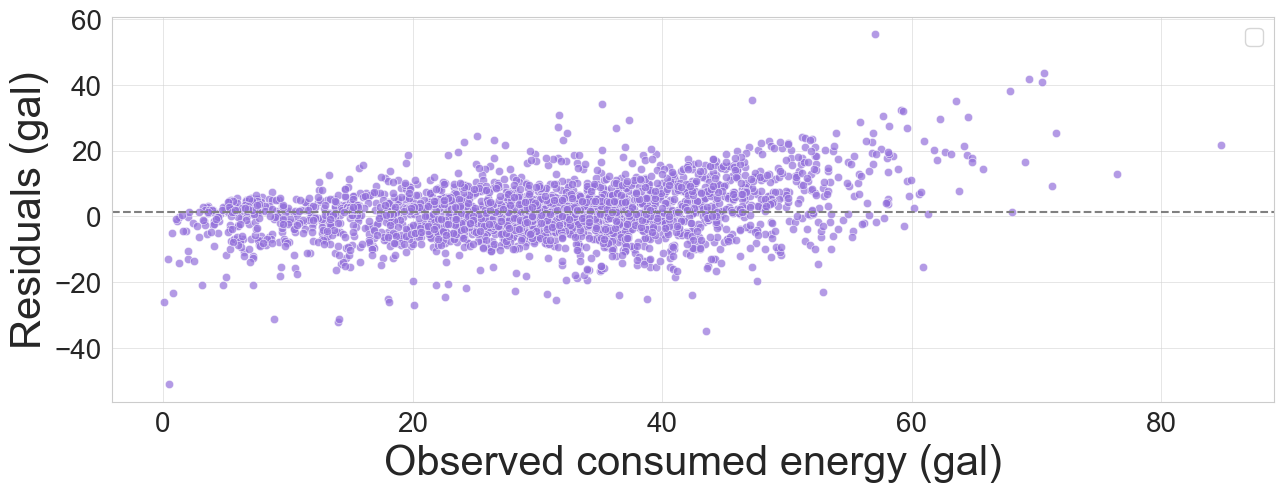

In [147]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='gallons', y='residual', data=df_conventional, color='mediumpurple', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Observed consumed energy (gal)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
# Set plot area color
ax.set_facecolor('white')
ax.grid(color='lightgrey', linewidth=0.4)
fig.savefig(r'../../figures/residuals-vs-consumed-energy-conventional.png', dpi=400, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


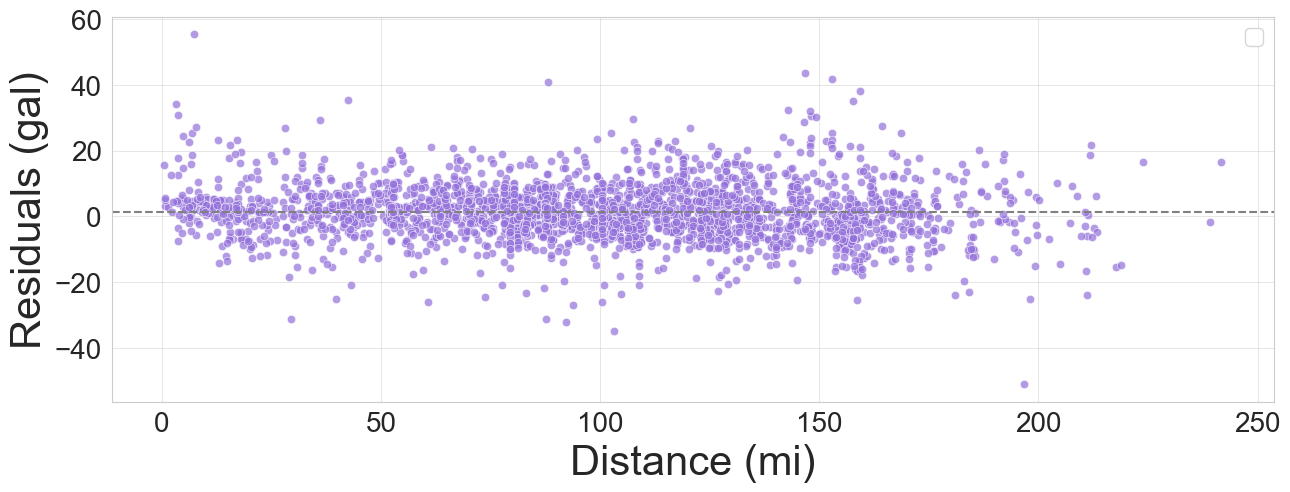

In [148]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set_style("whitegrid")

#sns.scatterplot(x='dist', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='dist', y='residual', data=df_conventional, color='mediumpurple', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Distance (mi)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
ax.grid(color='lightgrey', linewidth=0.4)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/residuals-vs-dist-conventional.png', dpi=400, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


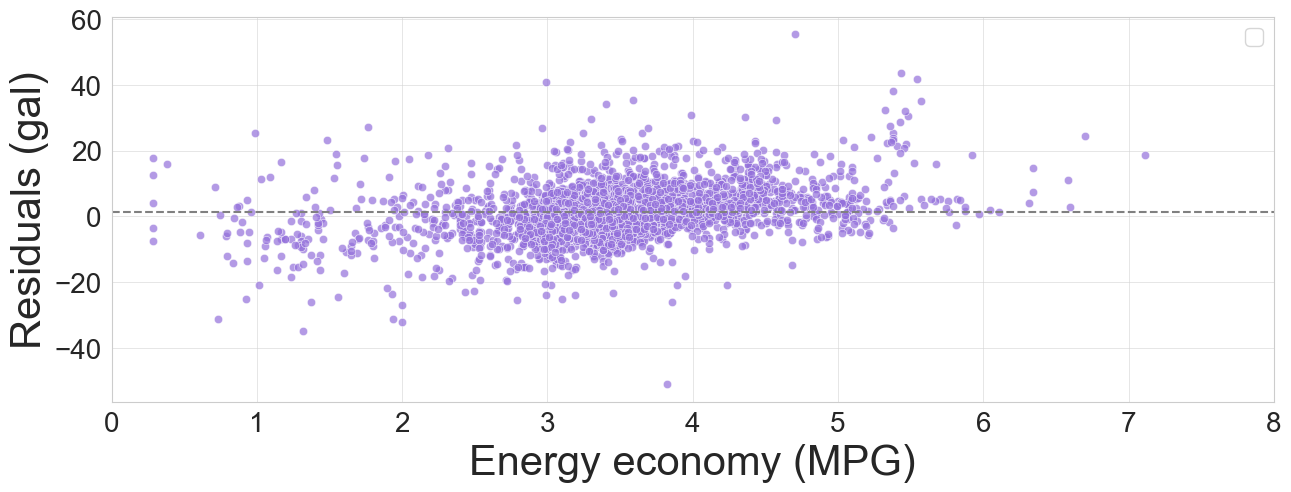

In [149]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set_style("whitegrid")

#sns.scatterplot(x='economy', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='economy', y='residual', data=df_conventional, color='mediumpurple', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Energy economy (MPG)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
ax.grid(color='lightgrey', linewidth=0.4)
plt.xlim(0,8)

fig.savefig(r'../../figures/residuals-vs-economy-conventional.png', dpi=400, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


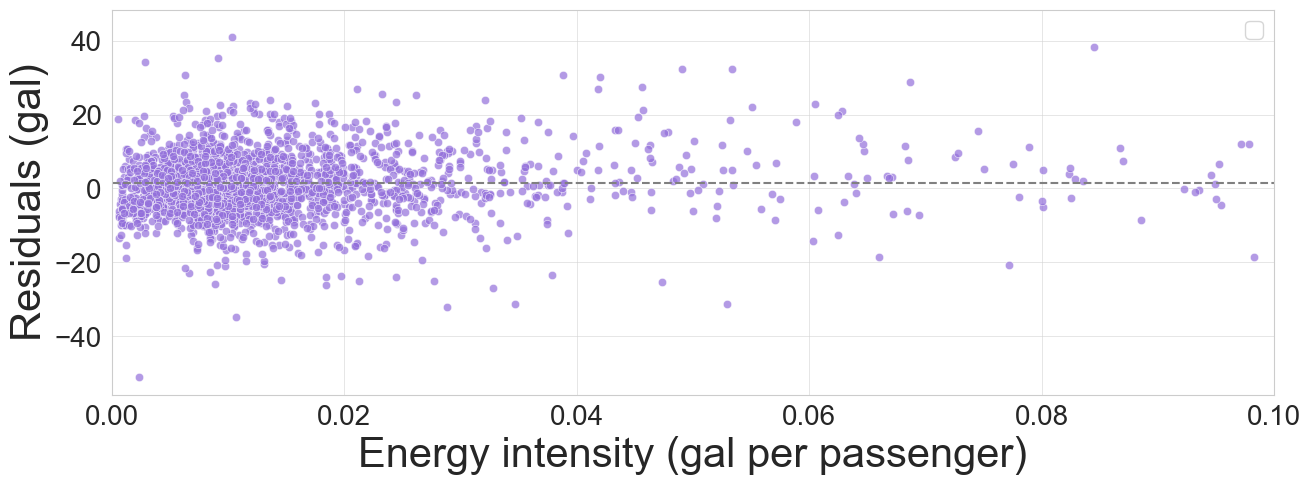

In [150]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set_style("whitegrid")

#sns.scatterplot(x='intensity', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='intensity', y='residual', data=df_conventional, color='mediumpurple', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Energy intensity (gal per passenger)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.xlim(0,0.1)
ax.grid(color='lightgrey', linewidth=0.4)
fig.savefig(r'../../figures/residuals-vs-energy-intensity-conventional.png', dpi=400, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


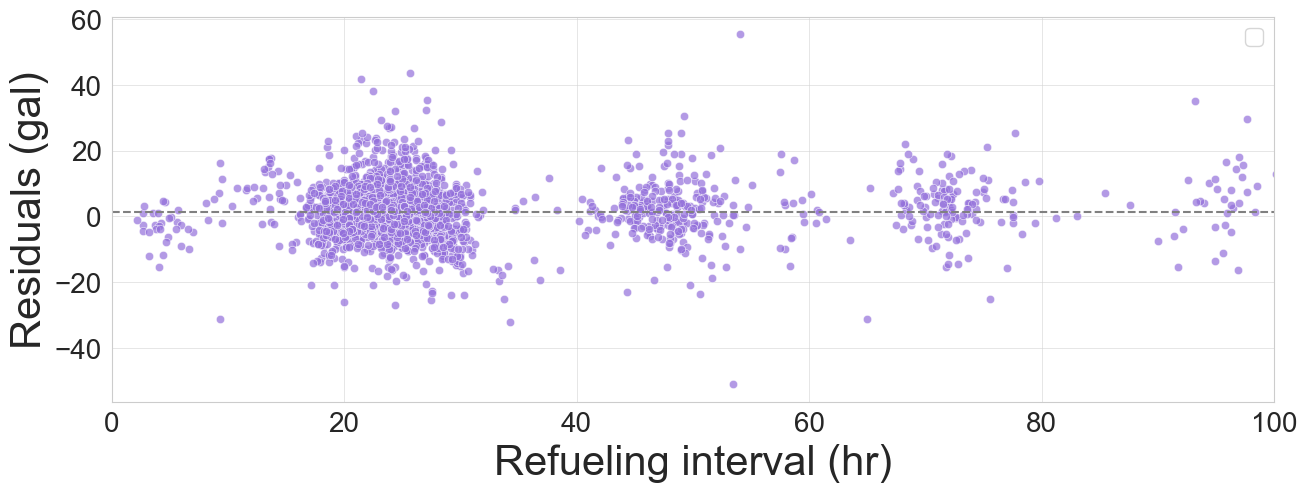

In [151]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set_style("whitegrid")

#sns.scatterplot(x='time_delta_in_hours', y='residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='time_delta_in_hours', y='residual', data=df_conventional, color='mediumpurple', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Refueling interval (hr)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.xlim(0,100)
ax.grid(color='lightgrey', linewidth=0.4)
fig.savefig(r'../../figures/residuals-vs-interval-conventional.png', dpi=400, bbox_inches='tight')

In [98]:
df_conventional['residual'].mean()

1.5092083909809213

<AxesSubplot: >

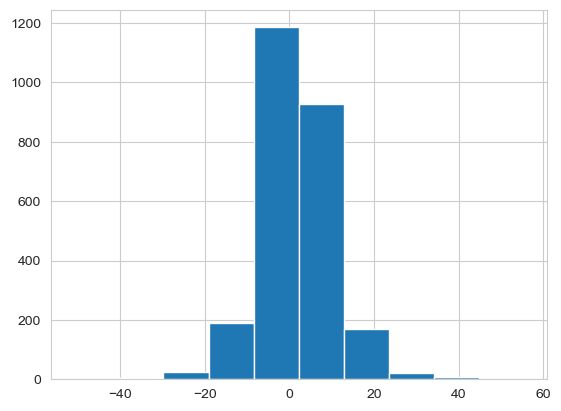

In [99]:
df_conventional['residual'].hist()

In [100]:
df_hybrid['residual']=df_hybrid['gallons']-df_hybrid['Energy']

In [101]:
df_hybrid['economy']=df_hybrid['dist']/df_hybrid['Energy']

In [102]:
df_hybrid['intensity']=df_hybrid['Energy']/df_hybrid['Onboard']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


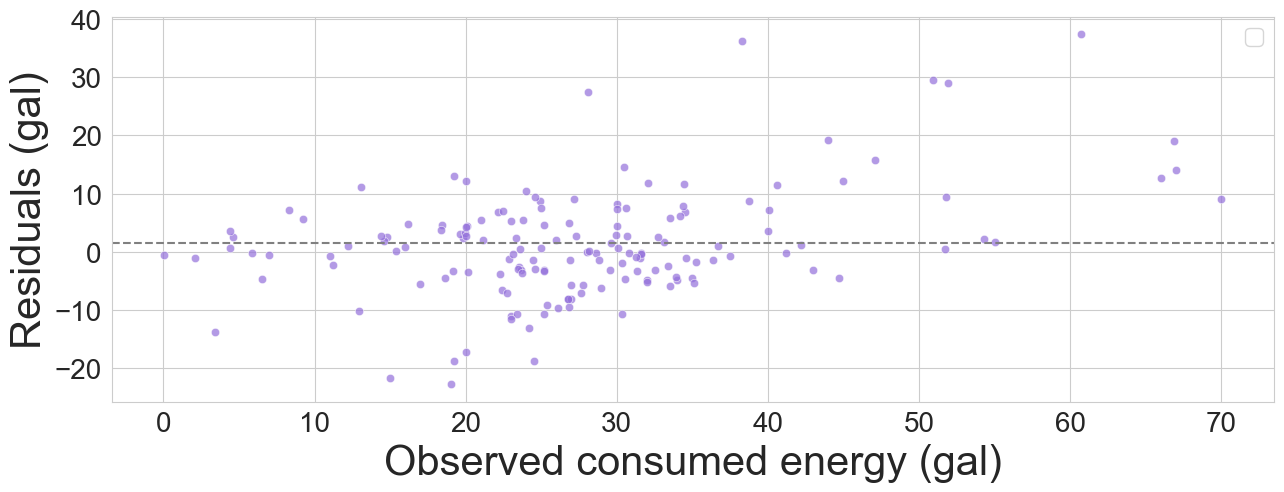

In [152]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set_style("whitegrid")

#sns.scatterplot(x='gallons', y='residual', data=df_hybrid, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='gallons', y='residual', data=df_hybrid, color='mediumpurple', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Observed consumed energy (gal)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
fig.savefig(r'../../figures/residuals-vs-consumed-energy-hybrid.png', dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


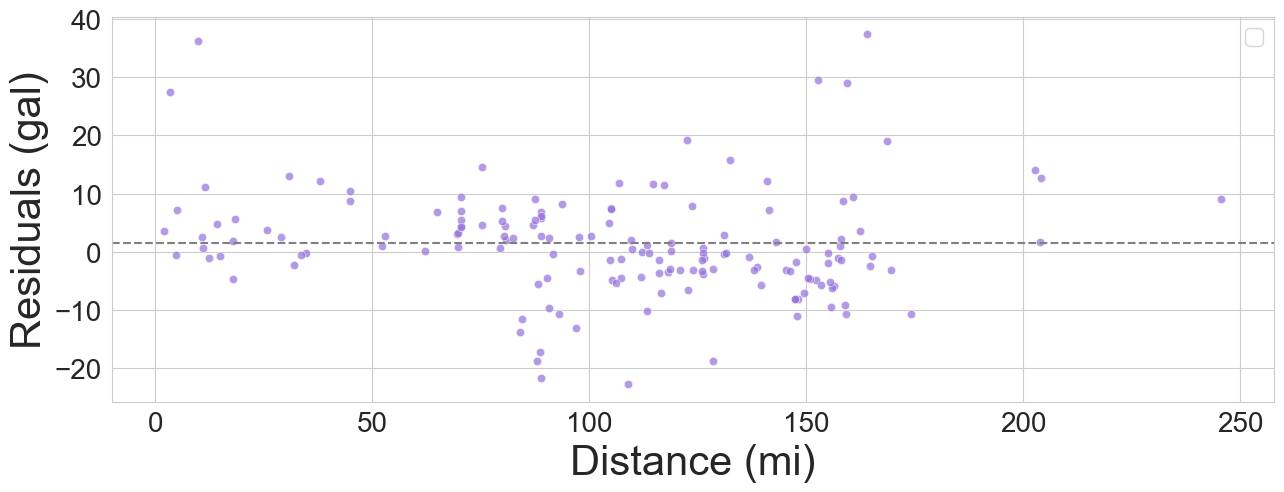

In [153]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set_style("whitegrid")

#sns.scatterplot(x='dist', y='residual', data=df_hybrid, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='dist', y='residual', data=df_hybrid, color='mediumpurple', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Distance (mi)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/residuals-vs-dist-hybrid.png', dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


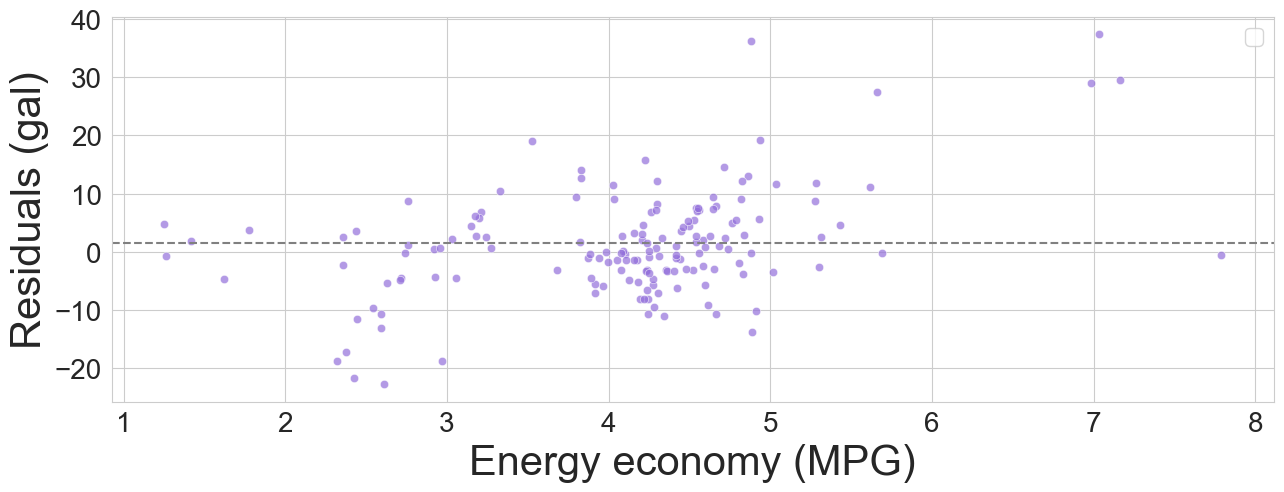

In [154]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set_style("whitegrid")

#sns.scatterplot(x='economy', y='residual', data=df_hybrid, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='economy', y='residual', data=df_hybrid, color='mediumpurple', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Energy economy (MPG)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/residuals-vs-economy-hybrid.png', dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


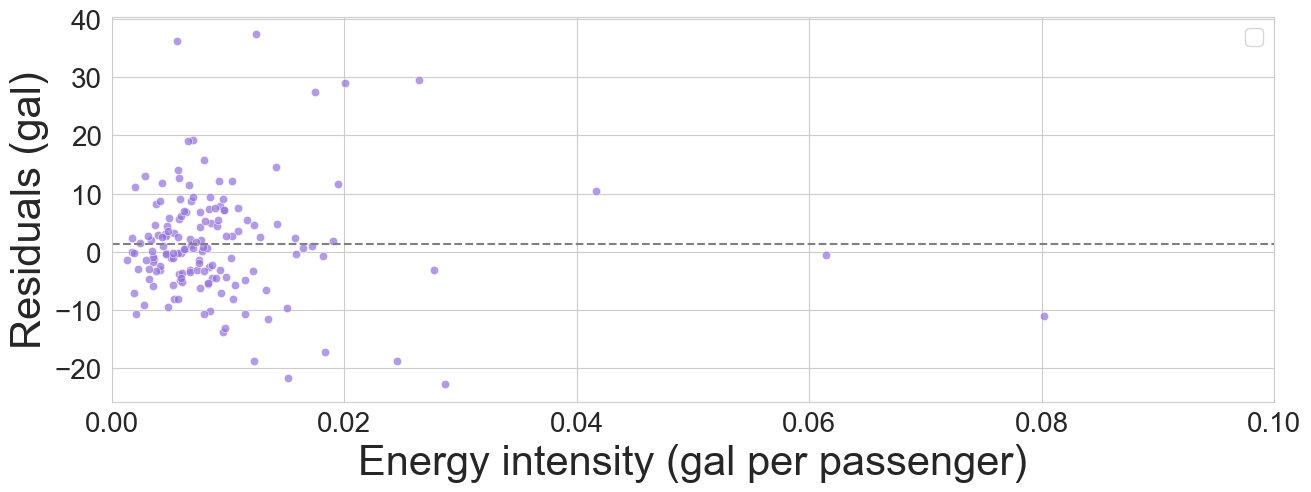

In [155]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set_style("whitegrid")

#sns.scatterplot(x='intensity', y='residual', data=df_hybrid, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='intensity', y='residual', data=df_hybrid, color='mediumpurple', alpha=0.7)
plt.axhline(df_hybrid['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Energy intensity (gal per passenger)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.xlim(0,0.1)
fig.savefig(r'../../figures/residuals-vs-energy-intensity-hybrid.png', dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


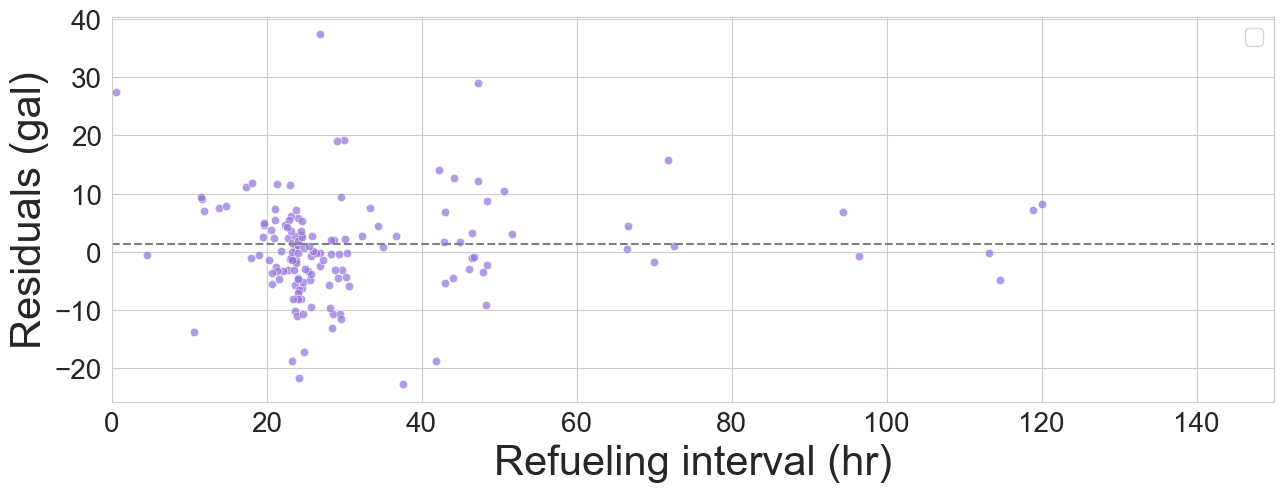

In [156]:
fig, ax = plt.subplots(figsize=(15,5))

sns.set_style("whitegrid")

#sns.scatterplot(x='time_delta_in_hours', y='residual', data=df_hybrid, hue='VehicleModel', alpha=0.7)
sns.scatterplot(x='time_delta_in_hours', y='residual', data=df_hybrid, color='mediumpurple', alpha=0.7)
plt.axhline(df_hybrid['residual'].mean(),color='gray', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=30)
plt.xlabel('Refueling interval (hr)', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.xlim(0,150)
fig.savefig(r'../../figures/residuals-vs-interval-hybrid.png', dpi=300, bbox_inches='tight')

In [108]:
df_hybrid['residual'].mean()

1.2391451085674388

<AxesSubplot: >

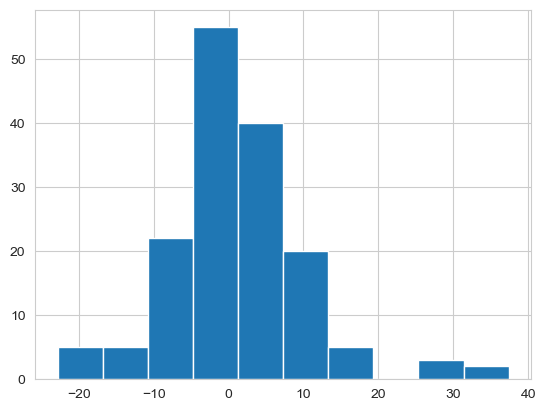

In [109]:
df_hybrid['residual'].hist()

In [110]:
df_model.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Lat', 'Lon', 'Vehicle', 'VehicleType',
       'SeatedCap', 'TotalCap', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second', 'Date', 'Daytype',
       'time', 'time_delta', 'time_delta_in_seconds', 'dist', 'Speed',
       'Acceleration', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'elevation', 'grade', 'Energy'],
      dtype='object')

In [111]:
df_conventional.nlargest(20,['residual'])

ServiceDateTime Vehicle  gallons        date    Powertrain  \
302  2022-04-06 21:51:00    1619    57.05  2022-04-06  conventional   
585  2022-04-14 19:29:00    1661    70.63  2022-04-14  conventional   
593  2022-04-27 19:31:00    1661    69.42  2022-04-27  conventional   
2237 2022-04-02 00:29:00    3310    70.40  2022-04-02  conventional   
546  2022-04-16 21:59:00    1657    67.85  2022-04-16  conventional   
1612 2022-04-13 23:42:00    1841    47.18  2022-04-13  conventional   
436  2022-04-19 19:32:00    1652    63.51  2022-04-19  conventional   
2280 2022-04-01 00:28:00    3312    35.20  2022-04-01  conventional   
343  2022-04-12 19:35:00    1643    59.15  2022-04-12  conventional   
472  2022-04-05 19:33:00    1654    59.30  2022-04-05  conventional   
2480 2022-04-01 00:19:00    3322    31.70  2022-04-01  conventional   
282  2022-04-25 19:32:00    1577    57.72  2022-04-25  conventional   
493  2022-04-04 19:23:00    1655    64.51  2022-04-04  conventional   
293  2022-04-26 20:31:00    1578    62.28  2022-04-26  conventional   
185  2022-04-21 17:52:00    1571    37.35  2022-04-21  conventional   
1375 2022-04-28 19:31:00    1821    55.86  2022-04-28  conventional   
1508 2022-04-30 21:57:00    1833    58.13  2022-04-30  conventional   
771  2022-04-08 19:50:00    1714    31.67  2022-04-08  conventional   
200  2022-04-13 20:51:00    1572    59.65  2022-04-13  conventional   
197  2022-04-09 18:59:00    1572    36.26  2022-04-09  conventional   

            dist     Energy    VehicleModel  Onboard      time  level_0  \
302     7.451466   1.584312       Gillig 40      0.0  21:51:00    302.0   
585   146.833040  27.018619       Gillig 40     24.0  19:29:00    585.0   
593   152.845814  27.589053       Gillig 40     87.0  19:31:00    593.0   
2237   88.179157  29.493814       Gillig 35   2835.0  00:29:00   2237.0   
546   159.392757  29.657343       Gillig 40    351.0  21:59:00    546.0   
1612   42.533680  11.844106  NEW FLYER XD40   1295.0  23:42:00   1612.0   
436   157.669557  28.308670       Gillig 40      3.0  19:32:00    436.0   
2280    3.311691   0.972426       Gillig 35    335.0  00:28:00   2280.0   
343   142.827627  26.846619       Gillig 40    503.0  19:35:00    343.0   
472   147.949615  27.095518       Gillig 40    552.0  19:33:00    472.0   
2480    3.808398   0.955257  NEW FLYER XD40    151.0  00:19:00   2480.0   
282   148.039305  27.005981       Gillig 35    696.0  19:32:00    282.0   
493   149.312925  34.227630       Gillig 40    815.0  19:23:00    493.0   
293   107.605872  32.583778       Gillig 35      0.0  20:31:00    293.0   
185    36.192138   7.920267       Gillig 35      0.0  17:52:00    185.0   
1375  146.484424  26.989487  NEW FLYER XD40    393.0  19:31:00   1375.0   
1508  164.221994  30.650440  NEW FLYER XD40    672.0  21:57:00   1508.0   
771     7.746373   4.385985  NEW FLYER XD35      0.0  19:50:00    771.0   
200   120.575184  32.666728       Gillig 35   1546.0  20:51:00    200.0   
197    28.063149   9.464973       Gillig 35    226.0  18:59:00    197.0   

       index      time_delta  time_delta_in_hours   residual   economy  \
302    302.0 2 days 06:06:00            54.100000  55.465688  4.703283   
585    585.0 1 days 01:39:00            25.650000  43.611381  5.434513   
593    593.0 0 days 21:27:00            21.450000  41.830947  5.540089   
2237  2237.0             NaT                  NaN  40.906186  2.989751   
546    546.0 0 days 22:27:00            22.450000  38.192657  5.374479   
1612  1612.0 1 days 03:10:00            27.166667  35.335894  3.591126   
436    436.0 3 days 21:14:00            93.233333  35.201330  5.569656   
2280  2280.0             NaT                  NaN  34.227574  3.405596   
343    343.0 1 days 03:01:00            27.016667  32.303381  5.320135   
472    472.0 1 days 00:24:00            24.400000  32.204482  5.460298   
2480  2480.0             NaT                  NaN  30.744743  3.986777   
282    282.0 2 days 01:15:00            49.250000  30

In [112]:
df_conventional.nsmallest(20,['residual'])

ServiceDateTime Vehicle  gallons        date    Powertrain  \
915  2022-04-07 23:15:00    1722     0.45  2022-04-07  conventional   
598  2022-04-07 16:04:00    1662    43.48  2022-04-07  conventional   
2814 2022-04-06 05:30:00    7802    14.00  2022-04-06  conventional   
2550 2022-04-17 05:57:00    3325     8.90  2022-04-17  conventional   
2922 2022-04-26 05:52:00    7814    14.10  2022-04-26  conventional   
2815 2022-04-07 05:55:00    7802    20.10  2022-04-07  conventional   
2349 2022-04-21 04:41:00    3316    18.10  2022-04-21  conventional   
2190 2022-04-06 22:54:00    3305     0.10  2022-04-06  conventional   
2206 2022-04-20 05:10:00    3305    31.50  2022-04-20  conventional   
2136 2022-04-06 10:46:00    3302    38.80  2022-04-06  conventional   
2293 2022-04-19 04:40:00    3312    18.00  2022-04-19  conventional   
1811 2022-04-25 17:32:00    1854    22.59  2022-04-25  conventional   
2186 2022-04-03 05:45:00    3305    36.50  2022-04-03  conventional   
2131 2022-04-30 06:17:00    3301    42.40  2022-04-30  conventional   
2370 2022-04-16 05:31:00    3317    30.80  2022-04-16  conventional   
2693 2022-04-28 18:50:00    7554     0.80  2022-04-28  conventional   
2322 2022-04-27 01:00:00    3313    52.90  2022-04-27  conventional   
2160 2022-04-14 04:28:00    3303    28.20  2022-04-14  conventional   
2929 2022-04-02 12:00:00    7815    24.30  2022-04-02  conventional   
1401 2022-04-08 17:47:00    1823     4.78  2022-04-08  conventional   

            dist     Energy    VehicleModel  Onboard      time  level_0  \
915   196.805230  51.495030  NEW FLYER XD35  21572.0  23:15:00    915.0   
598   103.110207  78.313725       Gillig 40   7322.0  16:04:00    598.0   
2814   92.111201  46.077839  NEW FLYER XD40   1597.0  05:30:00   2814.0   
2550   29.433979  40.123587  NEW FLYER XD40   1157.0  05:57:00   2550.0   
2922   87.635194  45.254011  NEW FLYER XD40    855.0  05:52:00   2922.0   
2815   93.830969  46.954736  NEW FLYER XD40   1430.0  05:55:00   2815.0   
2349   60.664383  44.204790       Gillig 40   2393.0  04:41:00   2349.0   
2190  100.477234  26.065182       Gillig 40   2935.0  22:54:00   2190.0   
2206  158.644087  56.870791       Gillig 40   1202.0  05:10:00   2206.0   
2136  198.074560  63.898653       Gillig 40   2300.0  10:46:00   2136.0   
2293   39.689874  42.964679       Gillig 35   2022.0  04:40:00   2293.0   
1811   73.639680  47.242343  NEW FLYER XD40   3244.0  17:32:00   1811.0   
2186  181.047841  60.512991       Gillig 40   2477.0  05:45:00   2186.0   
2131  211.147668  66.264559       Gillig 40   3597.0  06:17:00   2131.0   
2370  104.846467  54.371912       Gillig 40   2756.0  05:31:00   2370.0   
2693   83.143954  24.115026  NEW FLYER XD35    637.0  18:50:00   2693.0   
2322  184.260931  75.729050       Gillig 35  11321.0  01:00:00   2322.0   
2160  126.889882  50.899320       Gillig 40   6003.0  04:28:00   2160.0   
2929   87.129252  45.912777  NEW FLYER XD40   7266.0  12:00:00   2929.0   
1401   77.536336  25.627499  NEW FLYER XD40   2631.0  17:47:00   1401.0   

       index       time_delta  time_delta_in_hours   residual   economy  \
915    915.0  2 days 05:28:00            53.466667 -51.045030  3.821830   
598    598.0              NaT                  NaN -34.833725  1.316630   
2814  2816.0  1 days 10:16:00            34.266667 -32.077839  1.999035   
2550  2550.0  0 days 09:20:00             9.333333 -31.223587  0.733583   
2922  2924.0  2 days 17:00:00            65.000000 -31.154011  1.936518   
2815  2817.0  1 days 00:25:00            24.416667 -26.854736  1.998328   
2349  2349.0  5 days 05:16:00           125.266667 -26.104790  1.372349   
2190  2190.0  0 days 19:58:00            19.966667 -25.965182  3.854845   
2206  2206.0  1 days 03:27:00            27.450000 -25.370791  2.789553   
2136  2136.0  1 days 09:46:00            33.766667 -25.098653  3.099824   
2293  2293.0  3 days 03:32:00            75.533333 -24.964679  0.923779   
1811  1811.0 13 days 01:18:00           3

In [113]:
df_validation.loc[(df_validation['Vehicle']==7661)&(df_validation['date']=='2022-04-20')]

index     ServiceDateTime  Vehicle  gallons        date    Powertrain  \
2759   2761 2022-04-20 20:59:00     7661     49.4  2022-04-20  conventional   

          time       time_delta  time_delta_in_hours  dist  Energy  \
2759  20:59:00  0 days 23:58:00            23.966667   NaN     NaN   

      VehicleModel  Onboard  
2759           NaN      NaN

In [114]:
df_conventional

ServiceDateTime Vehicle  gallons        date    Powertrain  \
1    2022-04-01 15:34:00    1552    27.43  2022-04-01  conventional   
2    2022-04-02 18:30:00    1552    33.15  2022-04-02  conventional   
3    2022-04-05 17:57:00    1552    52.29  2022-04-05  conventional   
4    2022-04-06 19:49:00    1552    36.69  2022-04-06  conventional   
5    2022-04-07 18:41:00    1552    45.61  2022-04-07  conventional   
...                  ...     ...      ...         ...           ...   
2971 2022-04-26 19:12:00    7816    51.60  2022-04-26  conventional   
2972 2022-04-27 20:39:00    7816    19.30  2022-04-27  conventional   
2973 2022-04-28 14:02:00    7816    14.00  2022-04-28  conventional   
2974 2022-04-29 19:10:00    7816    18.40  2022-04-29  conventional   
2975 2022-04-30 13:02:00    7816    19.90  2022-04-30  conventional   

            dist     Energy    VehicleModel  Onboard      time  level_0  \
1      53.128981  18.313656       Gillig 35   1403.0  15:34:00      1.0   
2      52.538729  16.892641       Gillig 35    523.0  18:30:00      2.0   
3     182.556936  36.358456       Gillig 35   3192.0  17:57:00      3.0   
4      38.274092  25.044263       Gillig 35    541.0  19:49:00      4.0   
5     166.541198  33.202731       Gillig 35   1060.0  18:41:00      5.0   
...          ...        ...             ...      ...       ...      ...   
2971  171.774123  39.738906  NEW FLYER XD40   3834.0  19:12:00   2971.0   
2972   69.502327  17.669826  NEW FLYER XD40   3158.0  20:39:00   2972.0   
2973   70.334943  16.008079  NEW FLYER XD40   2233.0  14:02:00   2973.0   
2974   49.260305  11.235610  NEW FLYER XD40   1217.0  19:10:00   2974.0   
2975   87.910924  17.246208  NEW FLYER XD40   1371.0  13:02:00   2975.0   

       index      time_delta  time_delta_in_hours   residual   economy  \
1        1.0             NaT                  NaN   9.116344  2.901058   
2        2.0 1 days 02:56:00            26.933333  16.257359  3.110155   
3        3.0 2 days 23:27:00            71.450000  15.931544  5.021031   
4        4.0 1 days 01:52:00            25.866667  11.645737  1.528258   
5        5.0 0 days 22:52:00            22.866667  12.407269  5.015889   
...      ...             ...                  ...        ...       ...   
2971  2973.0 1 days 13:36:00            37.600000  11.861094  4.322568   
2972  2974.0 1 days 01:27:00            25.450000   1.630174  3.933390   
2973  2975.0 0 days 17:23:00            17.383333  -2.008079  4.393715   
2974  2976.0 1 days 05:08:00            29.133333   7.164390  4.384302   
2975  2977.0 0 days 17:52:00            17.866667   2.653792  5.097406   

      intensity  
1      0.013053  
2      0.032300  
3      0.011390  
4      0.046293  
5      0.031323  
...         ...  
2971   0.010365  
2972   0.005595  
2973   0.007169  
2974   0.009232  
2975   0.012579  

[2532 rows x 17 columns]

In [115]:
df_conventional_plot = df_conventional.groupby('date').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

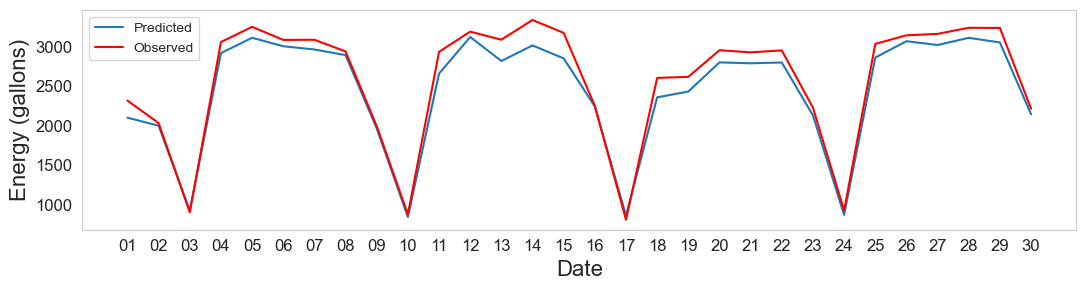

In [116]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_conventional_plot.date, df_conventional_plot.Energy, label='Predicted')
fig=plt.plot(df_conventional_plot.gallons, label='Observed', color='red')
#fig=plt.plot(df_daily_energy_validation_CDB.date, df_daily_energy_validation_CDB.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.grid()

plt.savefig(r'../../figures/timeseries-energy-CDB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [117]:
df_conventional.columns

Index(['ServiceDateTime', 'Vehicle', 'gallons', 'date', 'Powertrain', 'dist',
       'Energy', 'VehicleModel', 'Onboard', 'time', 'level_0', 'index',
       'time_delta', 'time_delta_in_hours', 'residual', 'economy',
       'intensity'],
      dtype='object')

In [118]:
df_conventional['week'] = pd.to_datetime(df_conventional['ServiceDateTime']).dt.isocalendar().week

In [119]:
df_conventional['week'].unique()

<IntegerArray>
[13, 14, 15, 16, 17]
Length: 5, dtype: UInt32

In [120]:
df_conventional_plot_weekly = df_conventional.groupby('week').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

In [121]:
df_conventional_plot_weekly.week.dtype

UInt32Dtype()

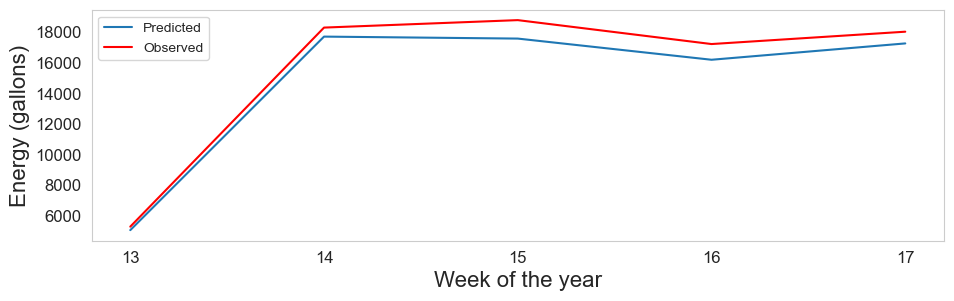

In [122]:
# Plot time series
fig, ax = plt.subplots(figsize=(11, 3))

# Plot predicted values in blue
plt.plot(df_conventional_plot_weekly.week, df_conventional_plot_weekly.Energy, label='Predicted')

# Plot observed values in red
plt.plot(df_conventional_plot_weekly.week, df_conventional_plot_weekly.gallons, label='Observed', color='red')

# Add title and labels
plt.xlabel('Week of the year', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

# Set font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend()

# Set ticks of x-axis
plt.xticks([13, 14, 15, 16, 17])

# Add grid
plt.grid()

plt.savefig(r'../../figures/timeseries-energy-CDB.png', dpi=400, bbox_inches='tight')


# Display plot
plt.show()


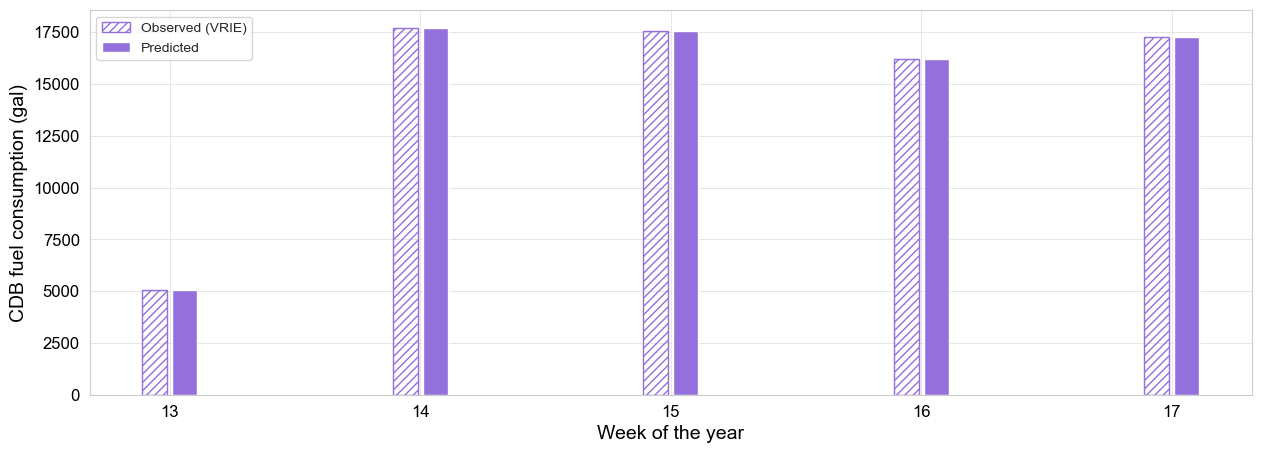

In [123]:
# Choose a style for the plot
#plt.style.use('ggplot')

# Plot time series
fig, ax = plt.subplots(figsize=(15, 5))


# Plot observed values in white with dashed lines
plt.bar(df_conventional_plot_weekly.week - 0.06, df_conventional_plot_weekly.Energy, label='Observed (VRIE)', width=0.1, edgecolor='mediumpurple', hatch='////', fill=False)


# Plot predicted values in light brown
plt.bar(df_conventional_plot_weekly.week + 0.06, df_conventional_plot_weekly.Energy, label='Predicted', width=0.1, color='mediumpurple', edgecolor='white')


# Add title and labels
plt.xlabel('Week of the year', fontsize=14, color='black')
plt.ylabel('CDB fuel consumption (gal)', fontsize=14, color='black')

# Set font sizes
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add legend
plt.legend()

# Set ticks of x-axis
plt.xticks([13, 14, 15, 16, 17])

# Set plot area color
ax.set_facecolor('white')

# Add grid
plt.grid(color='lightgrey', linewidth=0.4)

plt.savefig(r'../../figures/timeseries-energy-CDB.png', dpi=400, bbox_inches='tight')

# Display plot
plt.show()


In [124]:
df_hybrid_plot = df_hybrid.groupby('date').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

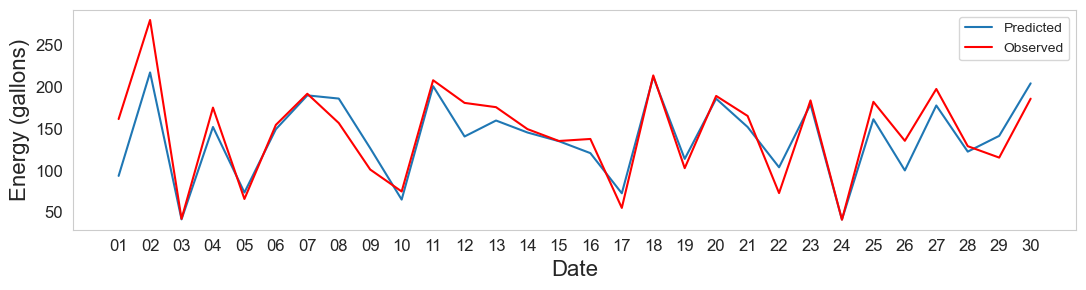

In [125]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_hybrid_plot.date, df_hybrid_plot.Energy, label='Predicted')
fig=plt.plot(df_hybrid_plot.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


plt.grid()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/timeseries-energy-HEB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [126]:
df_hybrid['week'] = pd.to_datetime(df_hybrid['ServiceDateTime']).dt.isocalendar().week

In [127]:
df_hybrid['week'].unique()

<IntegerArray>
[13, 14, 15, 16, 17]
Length: 5, dtype: UInt32

In [128]:
df_hybrid_plot_weekly = df_hybrid.groupby('week').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

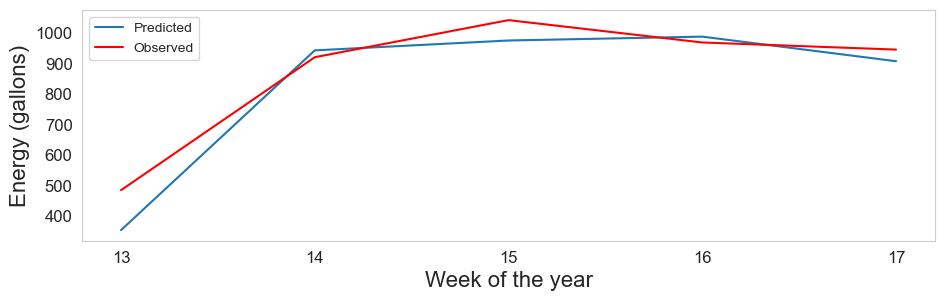

In [129]:
# Plot time series
fig, ax = plt.subplots(figsize=(11, 3))

# Plot predicted values in blue
plt.plot(df_hybrid_plot_weekly.week, df_hybrid_plot_weekly.Energy, label='Predicted')

# Plot observed values in red
plt.plot(df_hybrid_plot_weekly.week, df_hybrid_plot_weekly.gallons, label='Observed', color='red')

# Add title and labels
plt.xlabel('Week of the year', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

# Set font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend()

# Set ticks of x-axis
plt.xticks([13, 14, 15, 16, 17])

# Add grid
plt.grid()

plt.savefig(r'../../figures/timeseries-energy-HEB.png', dpi=400, bbox_inches='tight')


# Display plot
plt.show()


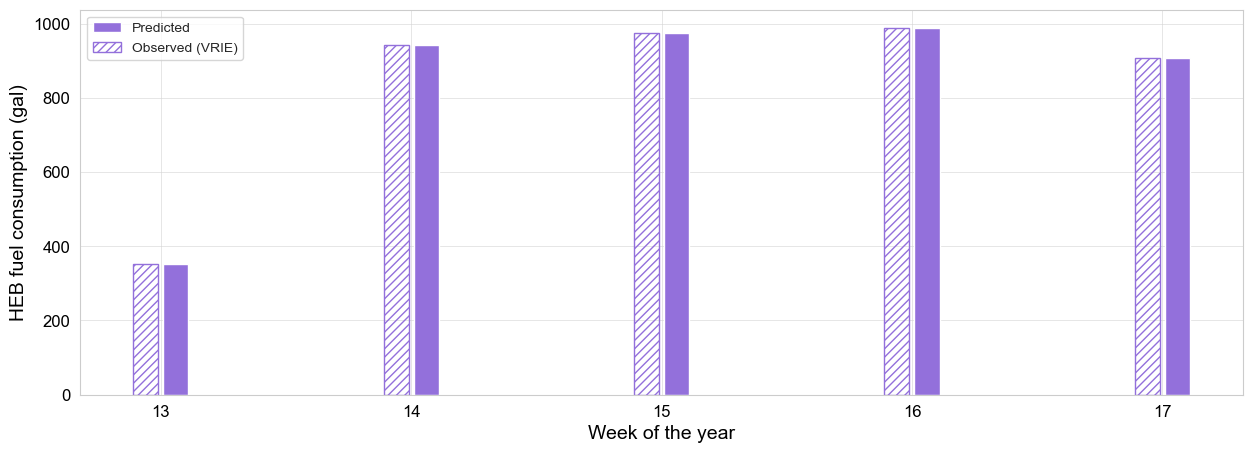

In [130]:
# Choose a style for the plot
#plt.style.use('ggplot')

# Plot time series
fig, ax = plt.subplots(figsize=(15, 5))

# Plot predicted values in light brown
plt.bar(df_hybrid_plot_weekly.week + 0.06, df_hybrid_plot_weekly.Energy, label='Predicted', width=0.1, color='mediumpurple', edgecolor='white')

# Plot observed values in white with dashed lines
plt.bar(df_hybrid_plot_weekly.week - 0.06, df_hybrid_plot_weekly.Energy, label='Observed (VRIE)', width=0.1, edgecolor='mediumpurple', hatch='////', fill=False)

# Add title and labels
plt.xlabel('Week of the year', fontsize=14, color='black')
plt.ylabel('HEB fuel consumption (gal)', fontsize=14, color='black')

# Set font sizes
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add legend
plt.legend()

# Set ticks of x-axis
plt.xticks([13,14,15,16,17])

# Set plot area color
ax.set_facecolor('white')

# Add grid
plt.grid(color='lightgrey', linewidth=0.4)

plt.savefig(r'../../figures/timeseries-energy-HEB.png', dpi=400, bbox_inches='tight')

# Display plot
plt.show()


In [131]:
df_conventional_plot_weekly.loc[df_conventional_plot_weekly['week'] == 13, 'date_range'] = '04/01-04/02'
df_conventional_plot_weekly.loc[df_conventional_plot_weekly['week'] == 14, 'date_range'] = '04/03-04/09'
df_conventional_plot_weekly.loc[df_conventional_plot_weekly['week'] == 15, 'date_range'] = '04/10-04/16'
df_conventional_plot_weekly.loc[df_conventional_plot_weekly['week'] == 16, 'date_range'] = '04/17-04/23'
df_conventional_plot_weekly.loc[df_conventional_plot_weekly['week'] == 17, 'date_range'] = '04/24-04/30'

In [132]:
# Facet plot

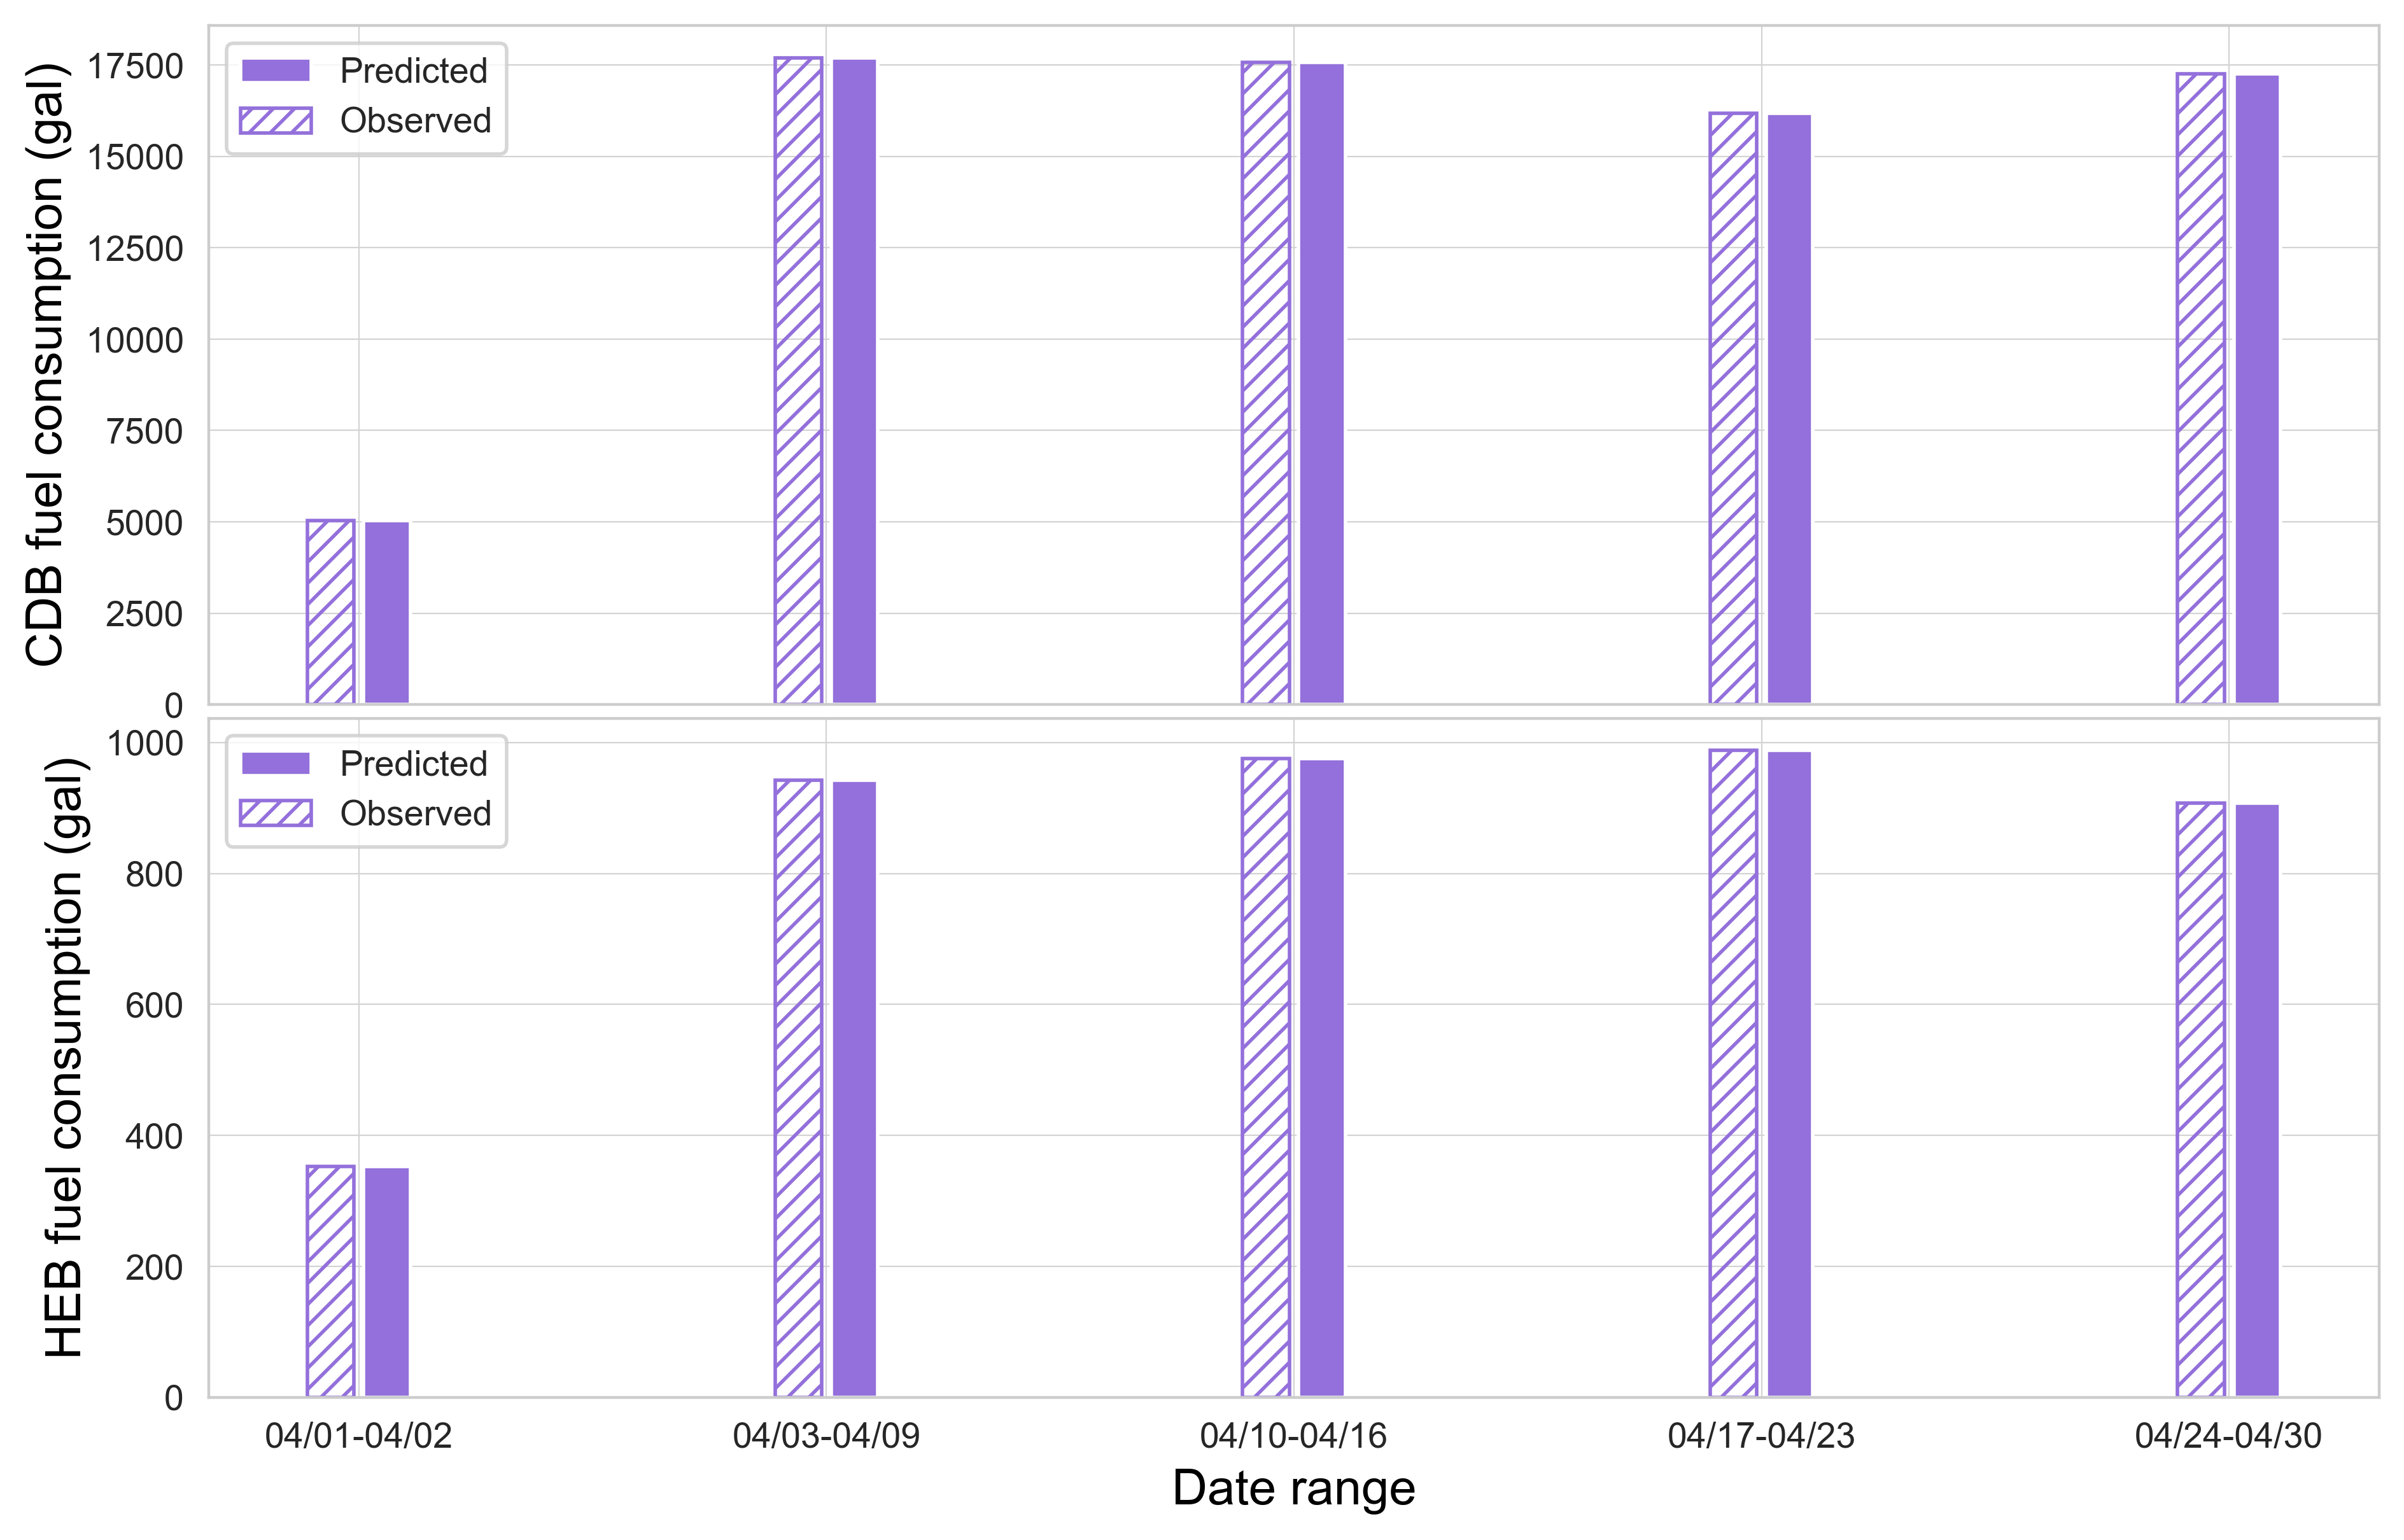

In [133]:
# Create a facet plot with three rows and one column
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(11, 7), dpi=400)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.02)

# Plot 1: CDB
axs[0].bar(df_conventional_plot_weekly.week + 0.06, df_conventional_plot_weekly.Energy, label='Predicted', width=0.1, color='mediumpurple', edgecolor='white')
axs[0].bar(df_conventional_plot_weekly.week - 0.06, df_conventional_plot_weekly.Energy, label='Observed', width=0.1, edgecolor='mediumpurple', hatch='////', fill=False)
  
# Add title and labels
#axs[0].set_xlabel('Week of the year', fontsize=14, color='black')
axs[0].set_ylabel('CDB fuel consumption (gal)', fontsize=14, color='black')

# Set font sizes
#axs[0].set_xticks(fontsize=12, color='black')
#axs[0].set_yticks(fontsize=12, color='black')

axs[0].grid()
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add legend
axs[0].legend()


# Set plot area color
axs[0].set_facecolor('white')

# Add grid
axs[0].grid(color='lightgrey', linewidth=0.4)


# Plot 2: HEB
axs[1].bar(df_hybrid_plot_weekly.week + 0.06, df_hybrid_plot_weekly.Energy, label='Predicted', width=0.1, color='mediumpurple', edgecolor='white')
axs[1].bar(df_hybrid_plot_weekly.week - 0.06, df_hybrid_plot_weekly.Energy, label='Observed', width=0.1, edgecolor='mediumpurple', hatch='////', fill=False)
  
# Add title and labels
axs[1].set_xlabel('Date range', fontsize=14, color='black')
axs[1].set_ylabel('HEB fuel consumption (gal)', fontsize=14, color='black')

# Set font sizes
#axs[1].set_xticks(fontsize=12, color='black')
#axs[1].set_yticks(fontsize=12, color='black')
# Set x-tick labels to date ranges


axs[1].grid()
#axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add legend
axs[1].legend()

# Set ticks of x-axis
axs[1].set_xticks([13, 14, 15, 16, 17])
axs[1].set_xticklabels(df_conventional_plot_weekly.date_range)

# Set plot area color
axs[1].set_facecolor('white')

# Add grid
axs[1].grid(color='lightgrey', linewidth=0.4)

# Show the combined plot
plt.show()

# Saving
fig.savefig(r'../../figures/timeseries-energy-facetplot.png', dpi=300, bbox_inches='tight')


In [134]:
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('Gillig 30 ', 'C1')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XE35', 'E1')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('PROTERRA CATALYST BE-40', 'E3')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XE40', 'E2')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('Gillig 35', 'C2')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('Gillig 40', 'C3')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XD35', 'C4')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XDE40', 'H1')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XD40', 'C5')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('NEW FLYER XDE60', 'H2')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('ARTIC', '')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('(', '')
df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace(')', '')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_17132\2745397764.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace('(', '')
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_17132\2745397764.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_conventional.VehicleModel=df_conventional.VehicleModel.astype(str).str.replace(')', '')


In [135]:
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('Gillig 30 ', 'C1')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XE35', 'E1')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('PROTERRA CATALYST BE-40', 'E3')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XE40', 'E2')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('Gillig 35', 'C2')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('Gillig 40', 'C3')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XD35', 'C4')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XDE40', 'H1')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XD40', 'C5')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('NEW FLYER XDE60', 'H2')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('ARTIC', '')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('(', '')
df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace(')', '')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_17132\1132139608.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace('(', '')
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_17132\1132139608.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_hybrid.VehicleModel=df_hybrid.VehicleModel.astype(str).str.replace(')', '')


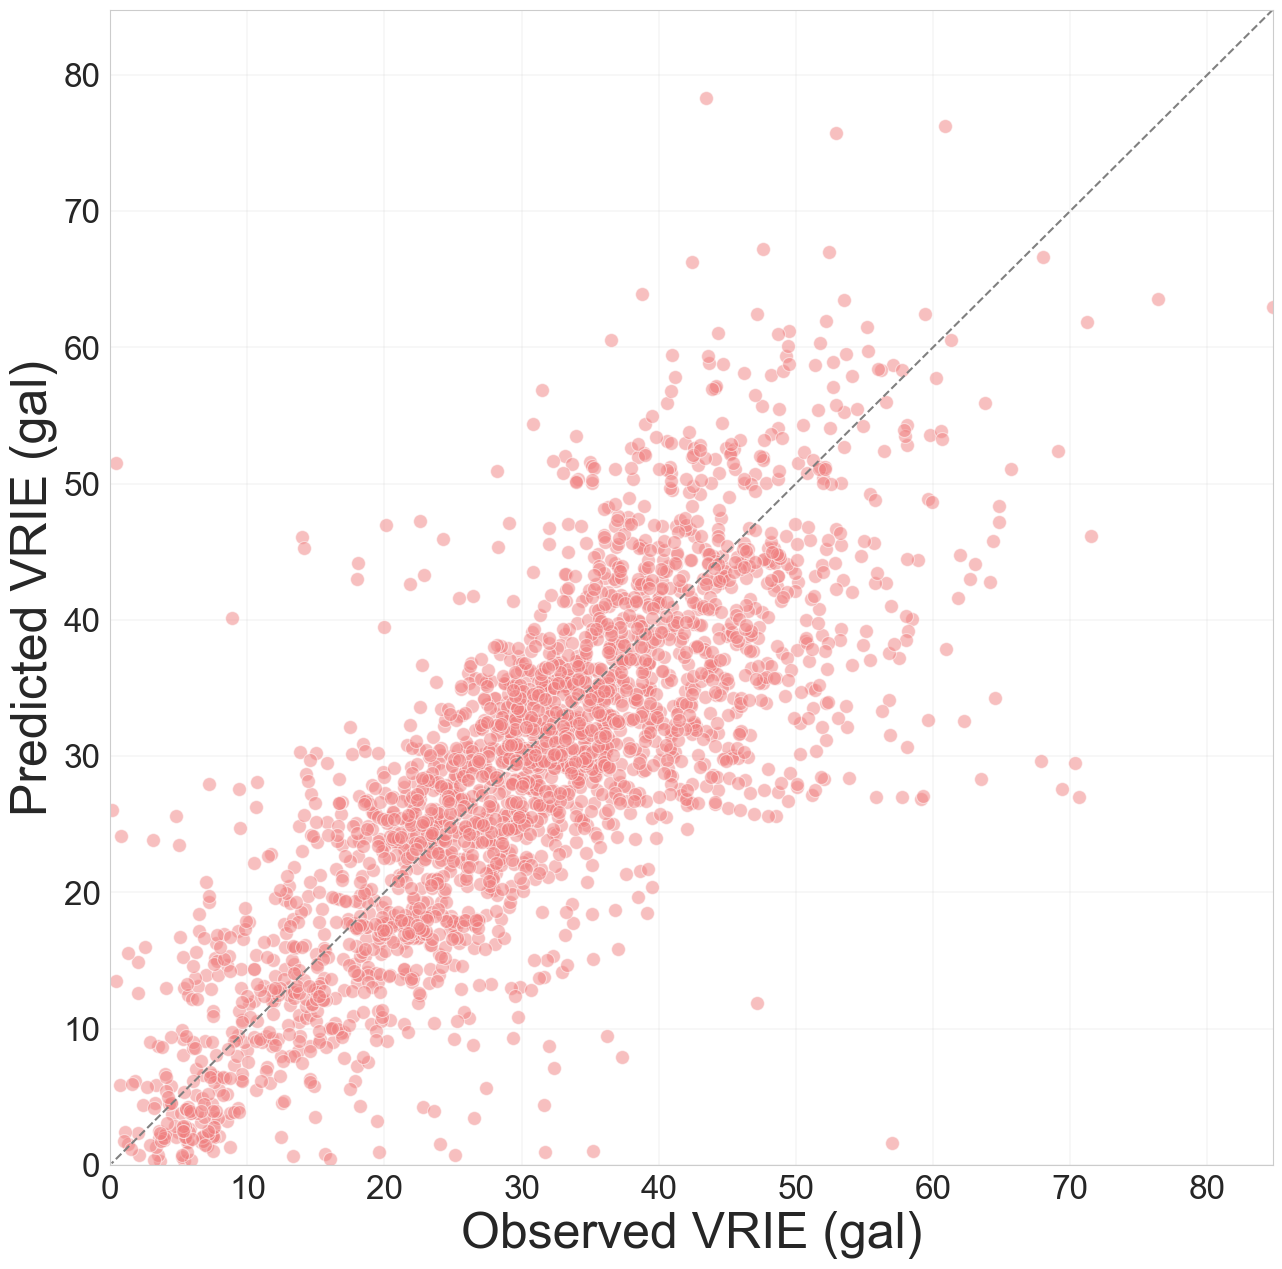

In [136]:
fig, ax = plt.subplots(figsize=(15,15))
#plt.scatter(df_conventional['Real_Energy'], df_conventional['Energy'], c='crimson')
sns.scatterplot(x='gallons', y='Energy', data=df_conventional, alpha=0.5, color='lightcoral', s=100)

p1 = max(max(df_conventional['gallons']), max(df_conventional['Energy']))
p2 = min(min(df_conventional['gallons']), min(df_conventional['Energy']))
plt.plot([p1, p2], [p1, p2], linestyle="dashed", color='gray')
plt.xlabel('Observed VRIE (gal)', fontsize=36)
plt.ylabel('Predicted VRIE (gal)', fontsize=36)
plt.xlim([0, max(max(df_conventional['gallons']), max(df_conventional['Energy']))])
plt.ylim([0, max(max(df_conventional['gallons']), max(df_conventional['Energy']))])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid(linewidth=0.2)
fig.savefig(r'../../figures/actual-predicted-CDB-energy.png', dpi=300, bbox_inches='tight')
plt.show()

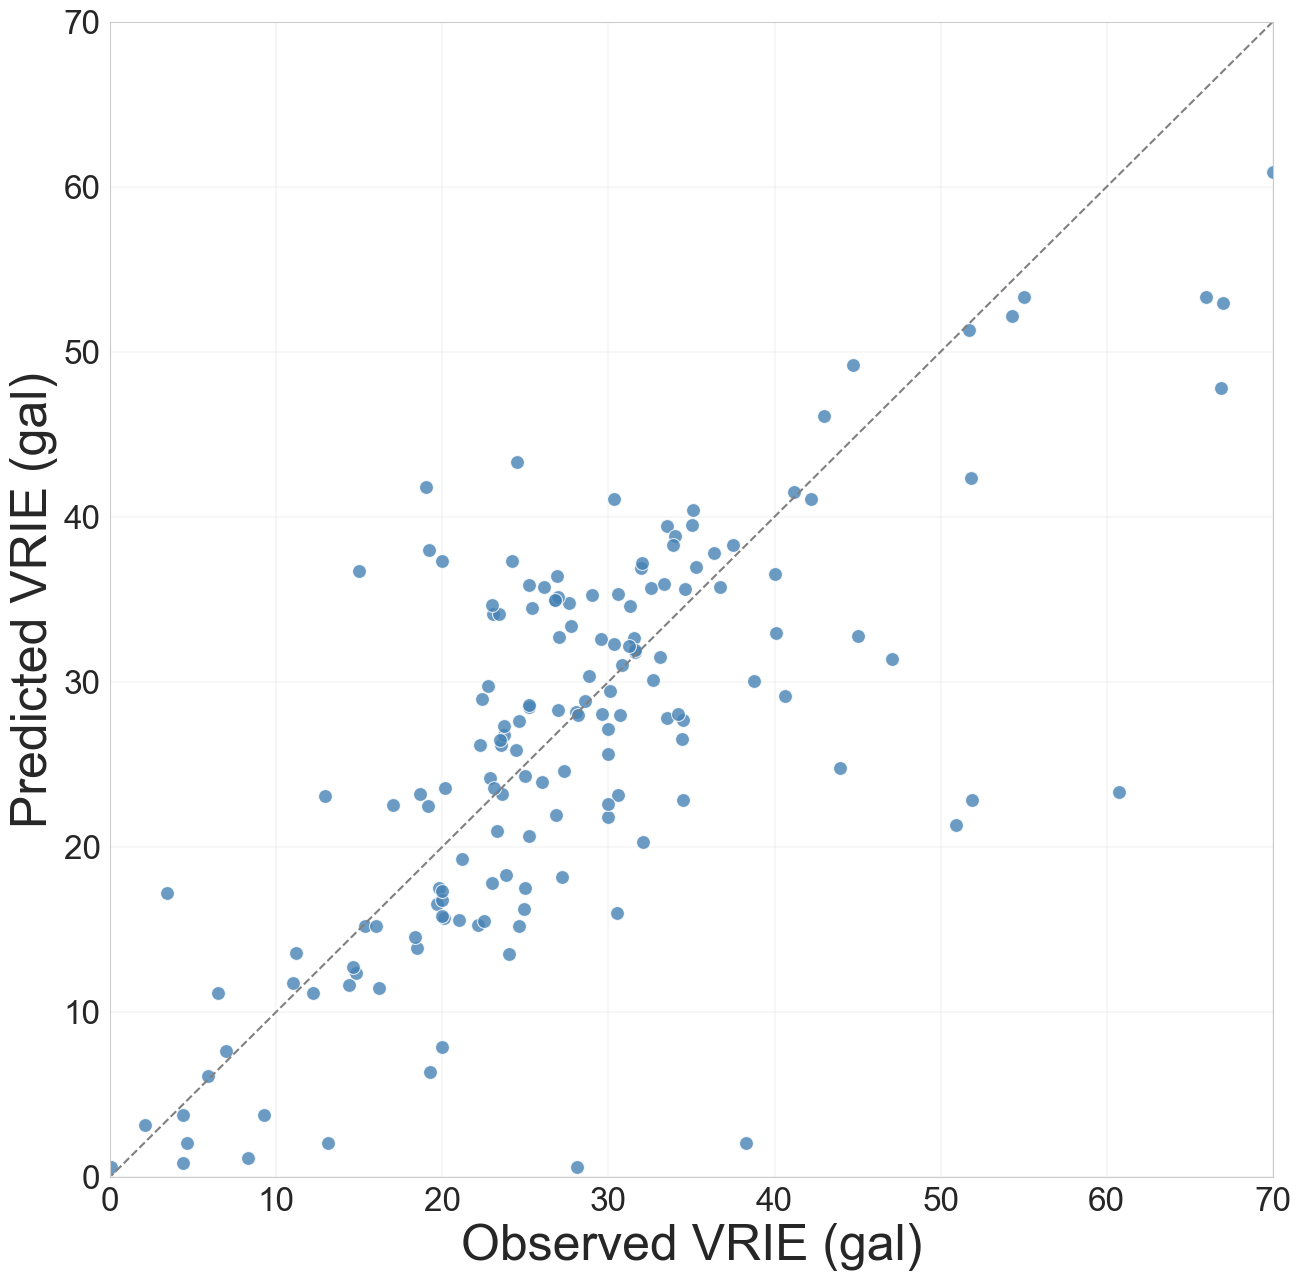

In [137]:
fig, ax = plt.subplots(figsize=(15,15))
#plt.scatter(df_hybrid['Real_Energy'], df_hybrid['Energy'], c='crimson')
sns.scatterplot(x='gallons', y='Energy', data=df_hybrid, alpha=0.8, color='steelblue', s=100)


p1 = max(max(df_hybrid['gallons']), max(df_hybrid['Energy']))
p2 = min(min(df_hybrid['gallons']), min(df_hybrid['Energy']))
plt.plot([p1, p2], [p1, p2], linestyle="dashed", color='gray')
plt.xlabel('Observed VRIE (gal)', fontsize=36)
plt.ylabel('Predicted VRIE (gal)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.legend(fontsize=20)
plt.grid(linewidth=0.2)
plt.xlim([0, max(max(df_hybrid['gallons']), max(df_hybrid['Energy']))])
plt.ylim([0, max(max(df_hybrid['gallons']), max(df_hybrid['Energy']))])
fig.savefig(r'../../figures/actual-predicted-HEB-energy.png', dpi=300, bbox_inches='tight')
plt.show()

In [138]:
train_dates=['2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13', '2022-04-14','2022-04-15','2022-04-16','2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23']
train_df_conventional_plot = df_conventional_plot[df_conventional_plot.date.isin(train_dates)]
test_dates=['2022-04-24','2022-04-25','2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
test_df_conventional_plot = df_conventional_plot[df_conventional_plot.date.isin(test_dates)]

In [139]:
train_dates=['2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13', '2022-04-14','2022-04-15','2022-04-16','2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23']
train_df_hybrid_plot = df_hybrid_plot[df_hybrid_plot.date.isin(train_dates)]
test_dates=['2022-04-24','2022-04-25','2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
test_df_hybrid_plot = df_hybrid_plot[df_hybrid_plot.date.isin(test_dates)]

In [140]:
### Compute system level errors
rmse_conventional_train_system= mean_squared_error(train_df_conventional_plot['gallons'], train_df_conventional_plot['Energy'], squared=False)
rmse_conventional_test_system= mean_squared_error(test_df_conventional_plot['gallons'], test_df_conventional_plot['Energy'], squared=False)
rmse_hybrid_train_system = mean_squared_error(train_df_hybrid_plot['gallons'], train_df_hybrid_plot['Energy'], squared=False)
rmse_hybrid_test_system = mean_squared_error(test_df_hybrid_plot['gallons'], test_df_hybrid_plot['Energy'], squared=False)
MAPE_conventional_train_system = np.mean(np.abs((df_conventional_train['gallons'] - df_conventional_train['Energy']) / df_conventional_train['gallons'])) * 100
MAPE_conventional_test_system = np.mean(np.abs((df_conventional_test['gallons'] - df_conventional_test['Energy']) / df_conventional_test['gallons'])) * 100
MAPE_hybrid_train_system = np.mean(np.abs((df_hybrid_train['gallons'] - df_hybrid_train['Energy']) / df_hybrid_train['gallons'])) * 100
MAPE_hybrid_test_system = np.mean(np.abs((df_hybrid_test['gallons'] - df_hybrid_test['Energy']) / df_hybrid_test['gallons'])) * 100

In [141]:
print('rmse_conventional_train_system:',rmse_conventional_train_system)
print('rmse_conventional_test_system:',rmse_conventional_test_system)
print('rmse_hybrid_train_system:',rmse_hybrid_train_system)
print('rmse_hybrid_test_system:',rmse_hybrid_test_system)
print('MAPE_conventional_train_system:',rmse_hybrid_test_system)
print('MAPE_conventional_test_system:',rmse_hybrid_test_system)
print('MAPE_hybrid_train_system:',rmse_hybrid_test_system)
print('MAPE_hybrid_test_system:',rmse_hybrid_test_system)

rmse_conventional_train_system: 167.30124847698815
rmse_conventional_test_system: 126.81493625714744
rmse_hybrid_train_system: 25.162193155174382
rmse_hybrid_test_system: 21.141640988430566
MAPE_conventional_train_system: 21.141640988430566
MAPE_conventional_test_system: 21.141640988430566
MAPE_hybrid_train_system: 21.141640988430566
MAPE_hybrid_test_system: 21.141640988430566


In [142]:
# Hourly energy consumption box plot
df_integrated_diesel['Hour']=df_integrated_diesel.ServiceDateTime.dt.hour
df_integrated_diesel['fuel_economy']=df_integrated_diesel['dist']/df_integrated_diesel['Energy']

In [143]:
df_integrated_diesel.columns

Index(['ServiceDateTime', 'Vehicle', 'gallons', 'date', 'Powertrain', 'dist',
       'Energy', 'VehicleModel', 'Onboard', 'time', 'level_0', 'index',
       'time_delta', 'time_delta_in_hours', 'Hour', 'fuel_economy'],
      dtype='object')

In [144]:
df_integrated_diesel_hourly_plot = df_integrated_diesel.groupby(['Vehicle','date','Hour']).agg({'Energy': ['sum'],'fuel_economy': ['mean'],'Onboard':['mean'], 'VehicleModel':['max']}).reset_index()

In [145]:
df_integrated_diesel_hourly_plot.columns = df_integrated_diesel_hourly_plot.columns.droplevel(1)
df_integrated_diesel_hourly_plot

Vehicle        date  Hour     Energy  fuel_economy  Onboard  \
0        1552  2022-04-01    15  18.313656      2.901058   1403.0   
1        1552  2022-04-02    18  16.892641      3.110155    523.0   
2        1552  2022-04-05    17  36.358456      5.021031   3192.0   
3        1552  2022-04-06    19  25.044263      1.528258    541.0   
4        1552  2022-04-07    18  33.202731      5.015889   1060.0   
...       ...         ...   ...        ...           ...      ...   
2684     7902  2022-04-25    18  15.174465      4.644595   1798.0   
2685     7902  2022-04-26    20  11.146228      4.684229    647.0   
2686     7902  2022-04-27    17  18.273909      4.786416   2001.0   
2687     7902  2022-04-29     6  41.783403      2.608745   1456.0   
2688     7902  2022-04-30    11  35.720041      2.540886   2363.0   

                 VehicleModel  
0                   Gillig 35  
1                   Gillig 35  
2                   Gillig 35  
3                   Gillig 35  
4                   Gillig 35  
...                       ...  
2684  NEW FLYER XDE60 (ARTIC)  
2685  NEW FLYER XDE60 (ARTIC)  
2686  NEW FLYER XDE60 (ARTIC)  
2687  NEW FLYER XDE60 (ARTIC)  
2688  NEW FLYER XDE60 (ARTIC)  

[2689 rows x 7 columns]

In [146]:
df_integrated_diesel_hourly_plot['energy_intensity']=df_integrated_diesel_hourly_plot['Energy']/df_integrated_diesel_hourly_plot['Onboard']

In [120]:
df_model_diesel = df_model[(df_model.Powertrain != 'electric')].copy()

In [121]:
df_model_diesel['Hour']=df_model_diesel.ServiceDateTime.dt.hour
df_model_diesel['fuel_economy']=df_model_diesel['dist']/df_model_diesel['Energy']

In [122]:
df_model_diesel['Energy'].max()

33.31256923239025

In [123]:
df_model_diesel['Energy'].mean()

0.06141669195984609

In [124]:
df_model_diesel

ServiceDateTime  DateKey             CalendarDate  Year  Month  \
0       2022-04-04 06:43:24     8763  2022-04-04 00:00:00.000  2022      4   
1       2022-04-04 06:51:27     8763  2022-04-04 00:00:00.000  2022      4   
2       2022-04-04 06:51:27     8763  2022-04-04 00:00:00.000  2022      4   
3       2022-04-04 06:52:52     8763  2022-04-04 00:00:00.000  2022      4   
4       2022-04-04 06:54:33     8763  2022-04-04 00:00:00.000  2022      4   
...                     ...      ...                      ...   ...    ...   
1360782 2022-04-30 23:54:20     8789  2022-04-30 00:00:00.000  2022      4   
1360783 2022-04-30 23:55:24     8789  2022-04-30 00:00:00.000  2022      4   
1360784 2022-04-30 23:56:47     8789  2022-04-30 00:00:00.000  2022      4   
1360785 2022-04-30 23:57:32     8789  2022-04-30 00:00:00.000  2022      4   
1360786 2022-04-30 23:59:29     8789  2022-04-30 00:00:00.000  2022      4   

         OpKey Operator  RtKey  RtKey2    Route  ...      dist      Speed  \
0            1    VATCo   3519    1006      R44  ...  0.000000   0.000000   
1            1    VATCo   3513    3380  (X) 39E  ...  0.627342   0.000000   
2            1    VATCo   3519    1006      R44  ...  0.000000   0.000000   
3            1    VATCo   3513    3380  (X) 39E  ...  0.313431  21.363553   
4            1    VATCo   3513    3380  (X) 39E  ...  0.421734  24.191762   
...        ...      ...    ...     ...      ...  ...       ...        ...   
1360782      1    VATCo   3515    1001      B43  ...  0.254140  10.517075   
1360783      1    VATCo   3515    1001      B43  ...  0.156799  14.194300   
1360784      1    VATCo   3515    1001      B43  ...  0.144950  10.117888   
1360785      1    VATCo   3515    1001      B43  ...  0.151259  19.474153   
1360786      1    VATCo   3515    1001      B43  ...  0.780486  38.648220   

        Acceleration    Powertrain             VehicleModel Vehicle_mass  \
0           0.000000  conventional               Gillig 30         25700   
1           0.000000  conventional               Gillig 30         25700   
2           0.000000  conventional               Gillig 30         25700   
3           0.069816  conventional               Gillig 30         25700   
4           0.007778  conventional               Gillig 30         25700   
...              ...           ...                      ...          ...   
1360782     0.003673        hybrid  NEW FLYER XDE60 (ARTIC)        42250   
1360783     0.015960        hybrid  NEW FLYER XDE60 (ARTIC)        42250   
1360784    -0.013643        hybrid  NEW FLYER XDE60 (ARTIC)        42250   
1360785     0.057755        hybrid  NEW FLYER XDE60 (ARTIC)        42250   
1360786     0.045523        hybrid  NEW FLYER XDE60 (ARTIC)        42250   

         elevation     grade    Energy fuel_economy  
0             45.0  0.000000  0.000000          NaN  
1             66.0  0.020796  0.217791     2.880479  
2             66.0  0.000000  0.000000          NaN  
3             51.0 -0.029738  0.038328     8.177688  
4             51.0  0.000000  0.059390     7.101104  
...            ...       ...       ...          ...  
1360782       53.0 -0.051392  0.042021     6.047875  
1360783       54.0  0.003961  0.032862     4.771417  
1360784       54.0  0.000000  0.029503     4.912995  
1360785       53.0 -0.004106  0.023685     6.386140  
1360786       52.0 -0.000796  0.101972     7.653960  

[1326209 rows x 46 columns]

In [125]:
df_model_diesel.loc[df_model_diesel['Energy']>2]

ServiceDateTime  DateKey             CalendarDate  Year  Month  \
560     2022-04-05 20:12:00     8764  2022-04-05 00:00:00.000  2022      4   
561     2022-04-05 23:00:00     8764  2022-04-05 00:00:00.000  2022      4   
33628   2022-04-02 14:14:36     8761  2022-04-02 00:00:00.000  2022      4   
34193   2022-04-06 12:25:15     8765  2022-04-06 00:00:00.000  2022      4   
35545   2022-04-12 14:28:40     8771  2022-04-12 00:00:00.000  2022      4   
...                     ...      ...                      ...   ...    ...   
1358395 2022-04-22 16:20:48     8781  2022-04-22 00:00:00.000  2022      4   
1358750 2022-04-23 18:40:39     8782  2022-04-23 00:00:00.000  2022      4   
1359794 2022-04-28 19:23:58     8787  2022-04-28 00:00:00.000  2022      4   
1360091 2022-04-29 19:24:38     8788  2022-04-29 00:00:00.000  2022      4   
1360391 2022-04-30 12:19:45     8789  2022-04-30 00:00:00.000  2022      4   

         OpKey Operator  RtKey  RtKey2 Route  ...      dist     Speed  \
560          1    VATCo   3515    1001   B43  ...  0.000000  0.000000   
561          1    VATCo   3515    1001   B43  ...  0.000000  0.000000   
33628        2    SATCo   3612    1100   R14  ...  4.815536  2.016144   
34193        2    SATCo   3607    1093    G3  ...  4.666717  1.171659   
35545        2    SATCo   3631    1104  9999  ...  1.638041  0.388322   
...        ...      ...    ...     ...   ...  ...       ...       ...   
1358395      1    VATCo   3515    1001   B43  ...  0.000000  0.000000   
1358750      1    VATCo   3519    1006   R44  ...  0.627342  0.063268   
1359794      1    VATCo   3410    1007  9999  ...  0.625590  0.056392   
1360091      1    VATCo   3410    1007  9999  ...  0.631544  0.061506   
1360391      1    VATCo   3515    1001   B43  ...  0.000000  0.000000   

         Acceleration    Powertrain             VehicleModel Vehicle_mass  \
560     -1.912853e-05  conventional               Gillig 30         25700   
561      0.000000e+00  conventional               Gillig 30         25700   
33628   -8.063649e-04  conventional                Gillig 35        26440   
34193    1.410390e-05  conventional                Gillig 35        26440   
35545   -4.479745e-04  conventional                Gillig 35        26440   
...               ...           ...                      ...          ...   
1358395 -1.571689e-05        hybrid  NEW FLYER XDE60 (ARTIC)        42250   
1358750 -2.437967e-06        hybrid  NEW FLYER XDE60 (ARTIC)        42250   
1359794 -1.011186e-04        hybrid  NEW FLYER XDE60 (ARTIC)        42250   
1360091  2.871964e-07        hybrid  NEW FLYER XDE60 (ARTIC)        42250   
1360391 -1.782361e-06        hybrid  NEW FLYER XDE60 (ARTIC)        42250   

         elevation     grade     Energy fuel_economy  
560            0.0  0.000000   5.271171     0.000000  
561            0.0  0.000000   4.545201     0.000000  
33628         22.0 -0.005417   6.245818     0.771002  
34193         35.0 -0.003860  10.444165     0.446825  
35545         60.0 -0.001517  11.055083     0.148171  
...            ...       ...        ...          ...  
1358395       66.0  0.000000  15.302371     0.000000  
1358750       45.0 -0.020796  17.242856     0.036383  
1359794       45.0 -0.020854  19.291397     0.032428  
1360091       45.0 -0.020658  17.855768     0.035369  
1360391       66.0  0.000000  10.120239     0.000000  

[875 rows x 46 columns]

In [126]:
df_model_diesel.loc[df_model_diesel['Energy']<0]

Empty DataFrame
Columns: [ServiceDateTime, DateKey, CalendarDate, Year, Month, OpKey, Operator, RtKey, RtKey2, Route, RouteName, TripKey, Trip, StopKey, Stop, StopName, Lat, Lon, Vehicle, VehicleType, SeatedCap, TotalCap, Boards, Alights, Onboard, Bike, Wheelchair, Weekday, Hour, Minute, Second, Date, Daytype, time, time_delta, time_delta_in_seconds, dist, Speed, Acceleration, Powertrain, VehicleModel, Vehicle_mass, elevation, grade, Energy, fuel_economy]
Index: []

[0 rows x 46 columns]

In [127]:
#df_model_without_outliers=df_model.loc[df_model['Energy']<1]

In [128]:
df_model_diesel_hourly_plot = df_model_diesel.groupby(['Vehicle','Date','Hour']).agg({'Energy': ['sum'],'fuel_economy': ['mean'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()

In [129]:
df_model_diesel_hourly_plot['energy_intensity']=df_model_diesel_hourly_plot['Energy']/df_model_diesel_hourly_plot['Onboard']

In [130]:
df_model_diesel_hourly_plot.columns = df_model_diesel_hourly_plot.columns.droplevel(1)

In [131]:
df_model_diesel_hourly_plot

Vehicle        Date  Hour    Energy  fuel_economy  Onboard  \
0         1205  2022-04-04     6  0.665932      7.027863        8   
1         1205  2022-04-04     7  2.524058      7.175451       34   
2         1205  2022-04-04     8  2.791407      6.815245      220   
3         1205  2022-04-04     9  2.713272      7.104918       45   
4         1205  2022-04-04    10  2.775181      7.012884       39   
...        ...         ...   ...       ...           ...      ...   
33687     7902  2022-04-30    19  1.518707      7.515776      299   
33688     7902  2022-04-30    20  2.467036      5.280046      527   
33689     7902  2022-04-30    21  2.545543      8.170452      620   
33690     7902  2022-04-30    22  1.949353      7.354981      225   
33691     7902  2022-04-30    23  2.278466      5.533262      131   

                  VehicleModel  energy_intensity  
0                   Gillig 30           0.083242  
1                   Gillig 30           0.074237  
2                   Gillig 30           0.012688  
3                   Gillig 30           0.060295  
4                   Gillig 30           0.071158  
...                        ...               ...  
33687  NEW FLYER XDE60 (ARTIC)          0.005079  
33688  NEW FLYER XDE60 (ARTIC)          0.004681  
33689  NEW FLYER XDE60 (ARTIC)          0.004106  
33690  NEW FLYER XDE60 (ARTIC)          0.008664  
33691  NEW FLYER XDE60 (ARTIC)          0.017393  

[33692 rows x 8 columns]

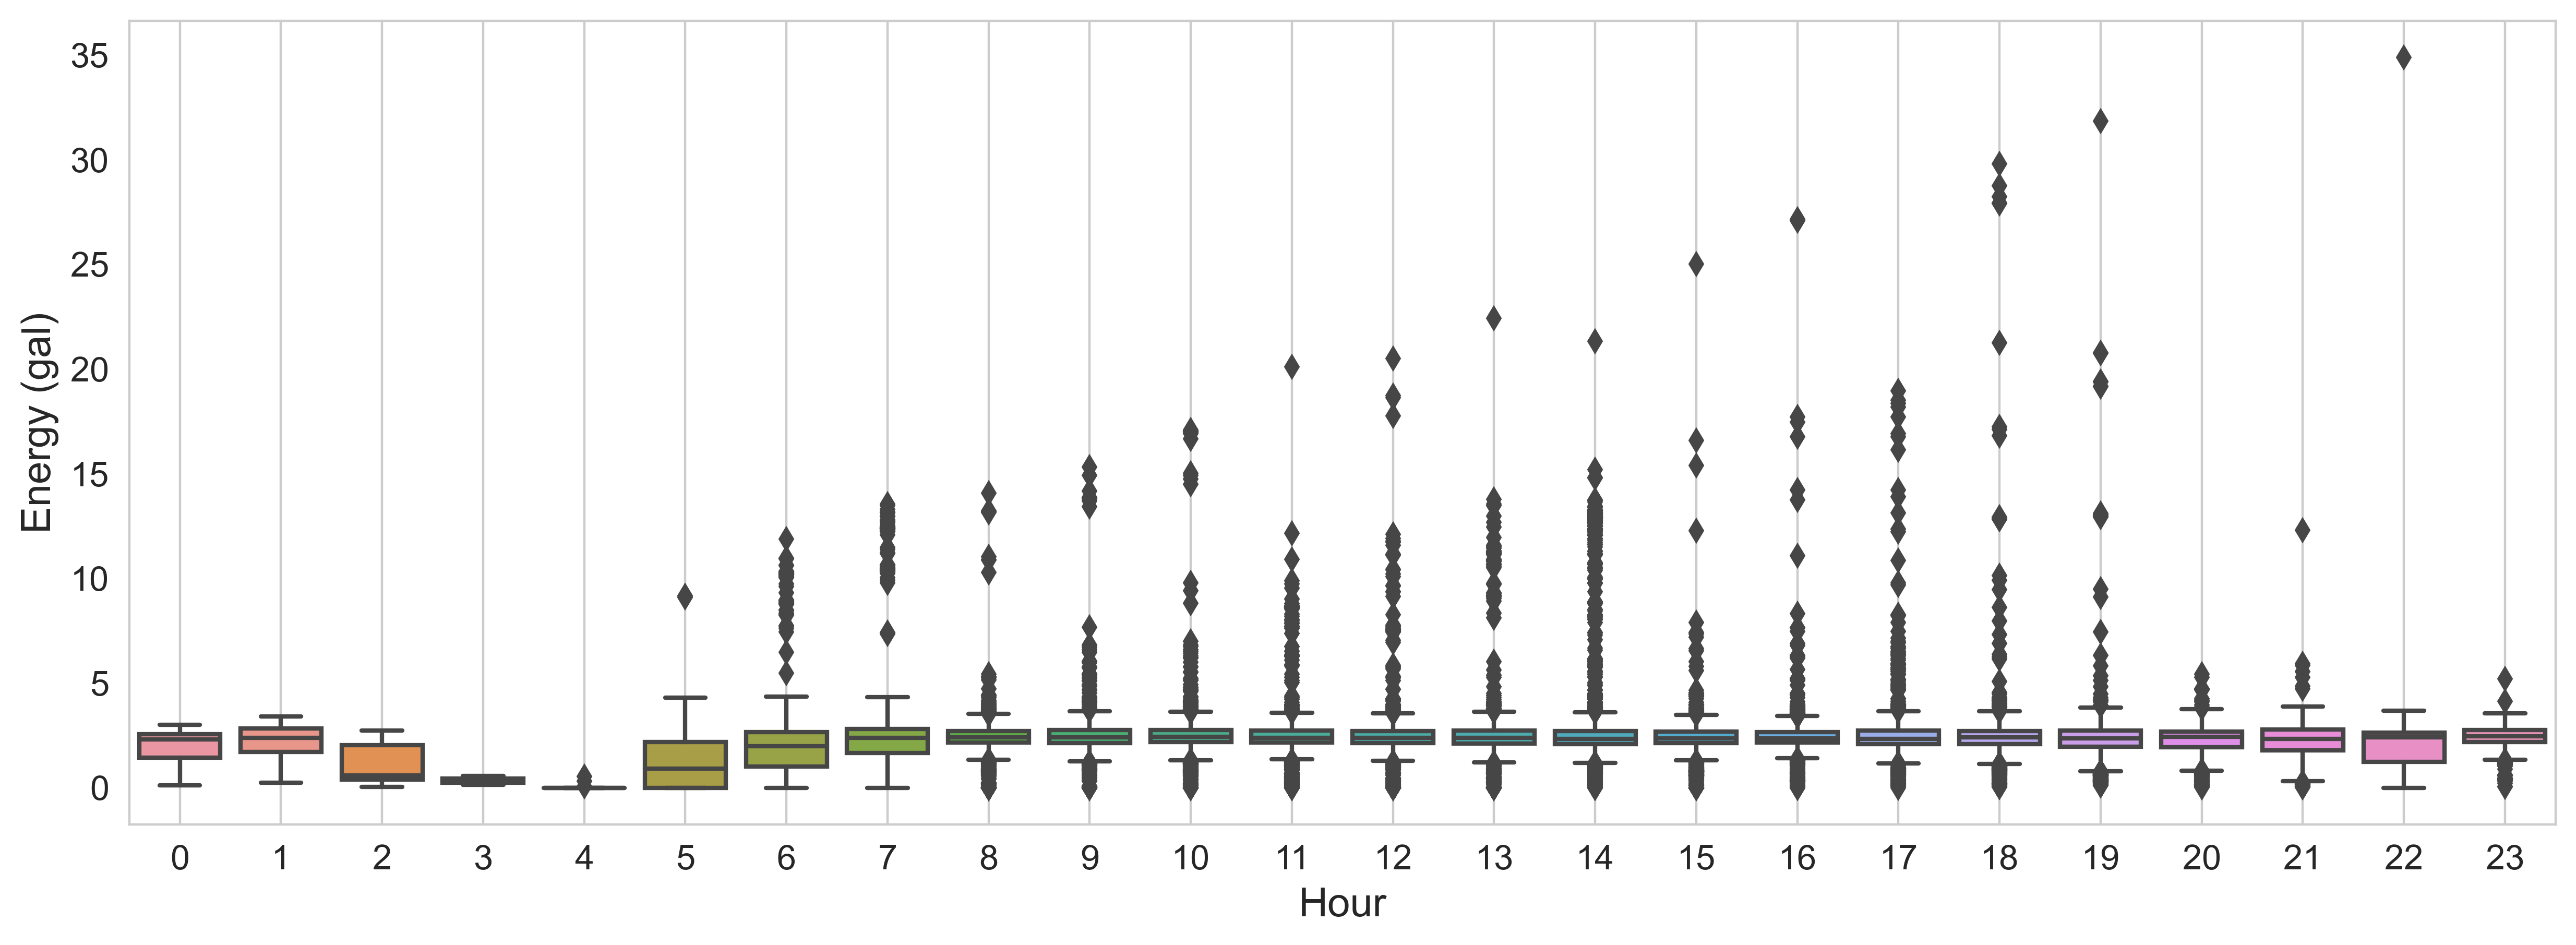

In [132]:
# Plot hourly energy consumption
fig, ax = plt.subplots(figsize=(15,5), dpi=400)
sns.boxplot(x='Hour', y='Energy', data=df_model_diesel_hourly_plot)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Energy (gal)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
fig.savefig(r'../../figures/energy-hour.png', dpi=400, bbox_inches='tight')

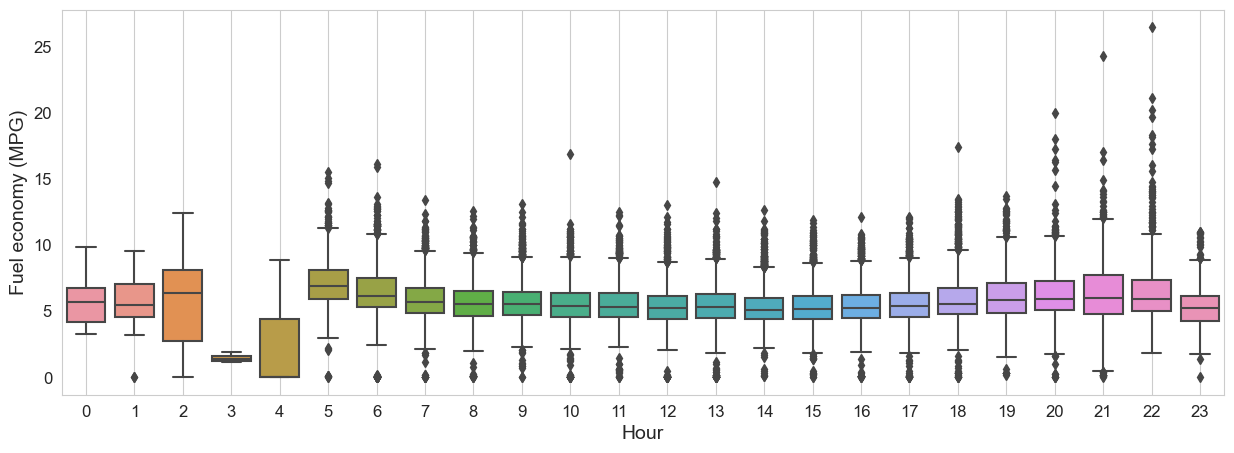

In [133]:
# Plot hourly fuel economy
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x='Hour', y='fuel_economy', data=df_model_diesel_hourly_plot)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Fuel economy (MPG)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
fig.savefig(r'../../figures/economy-hour.png', dpi=400, bbox_inches='tight')

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\numpy\lib\function_base.py:4529: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\numpy\lib\function_base.py:4530: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\numpy\lib\function_base.py:4530: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


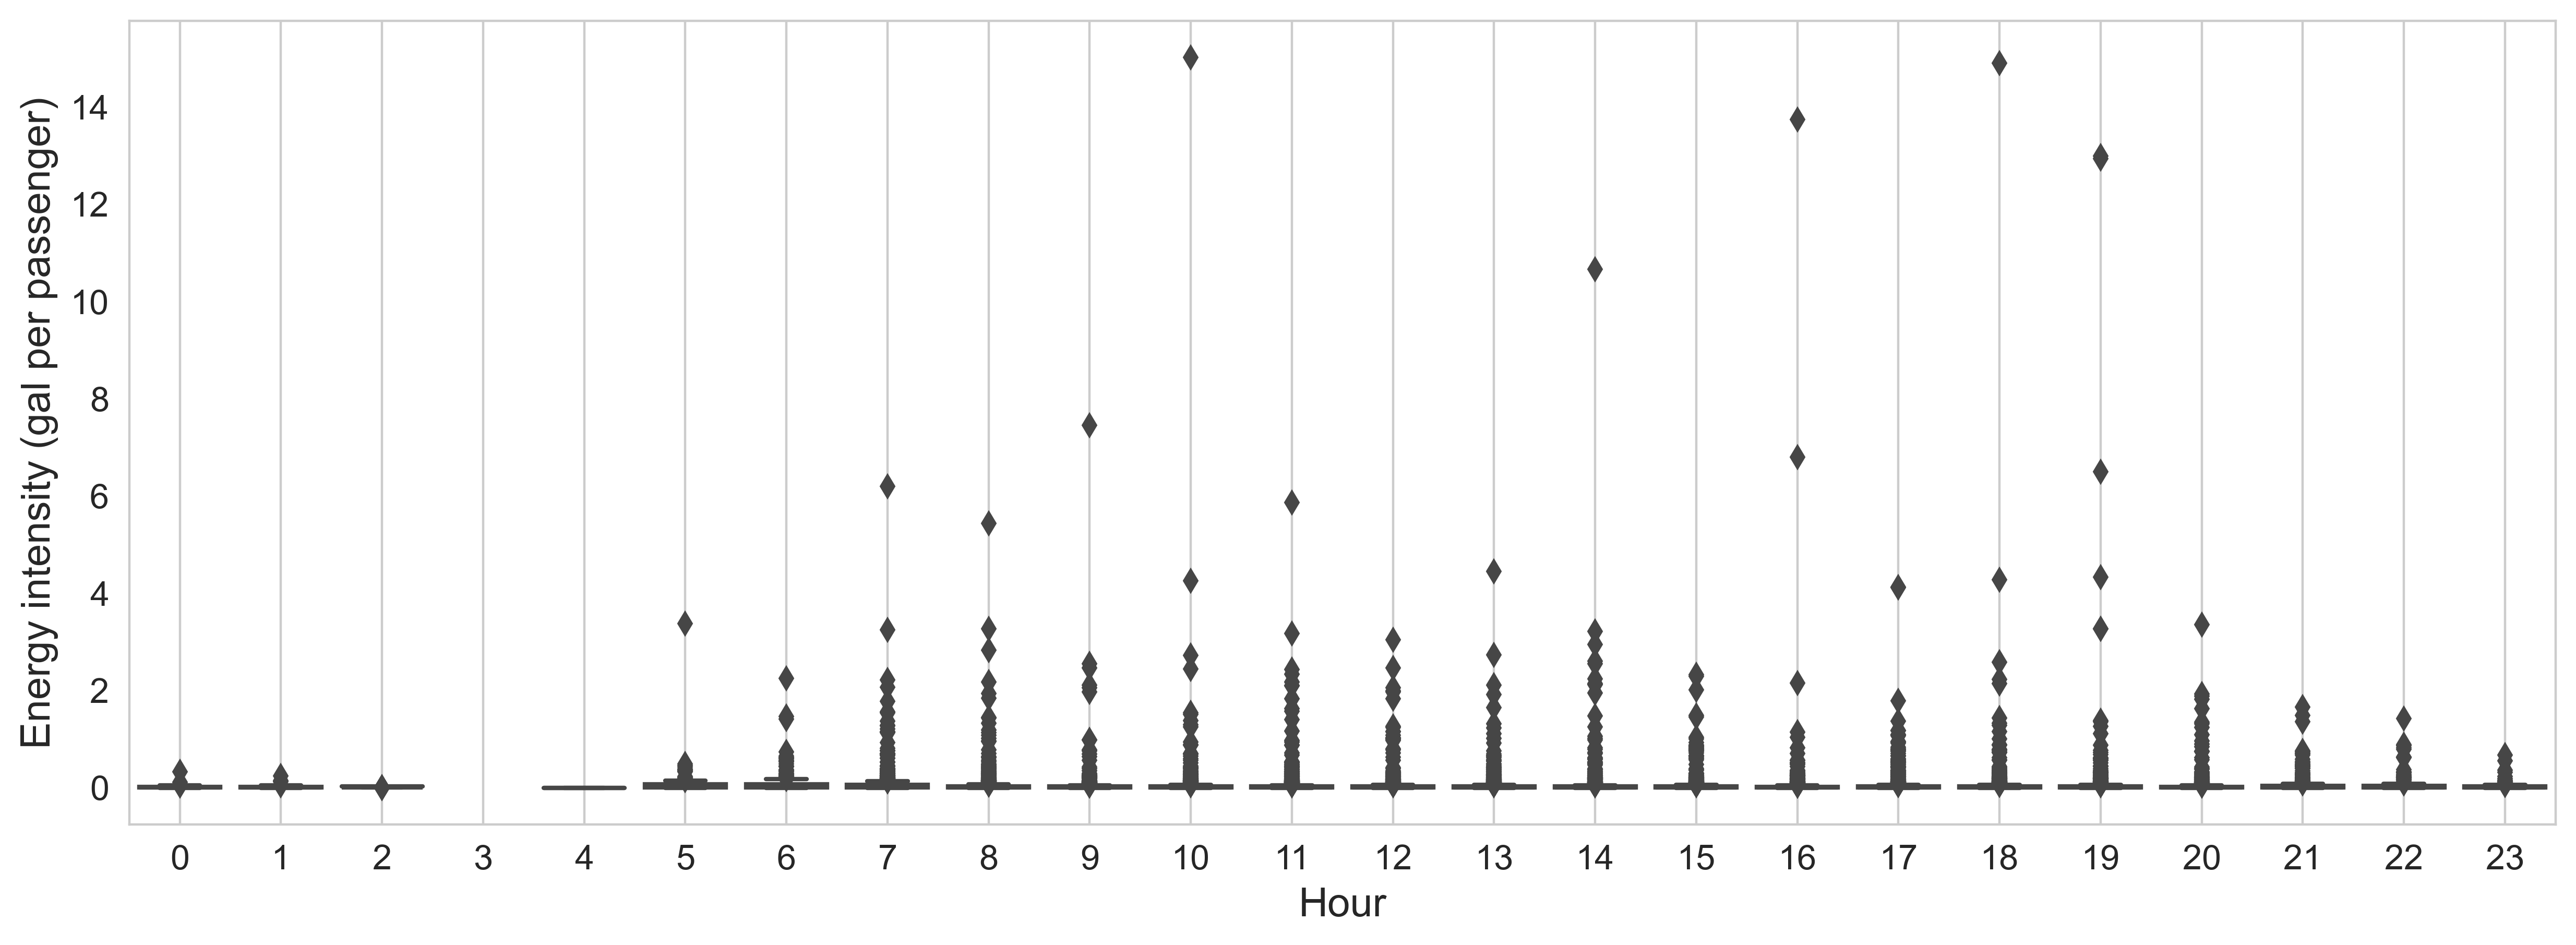

In [134]:
# Plot hourly energy intensity
fig, ax = plt.subplots(figsize=(15,5), dpi=400)
sns.boxplot(x='Hour', y='energy_intensity', data=df_model_diesel_hourly_plot)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Energy intensity (gal per passenger)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
fig.savefig(r'../../figures/intensity-hour.png', dpi=400, bbox_inches='tight')

In [135]:
# Make a facet plot from above plots

In [136]:
df_model_diesel_hourly_plot.columns

Index(['Vehicle', 'Date', 'Hour', 'Energy', 'fuel_economy', 'Onboard',
       'VehicleModel', 'energy_intensity'],
      dtype='object')

C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\numpy\lib\function_base.py:4529: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\numpy\lib\function_base.py:4530: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)
C:\Users\Mahsa\anaconda3\envs\ox\Lib\site-packages\numpy\lib\function_base.py:4530: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


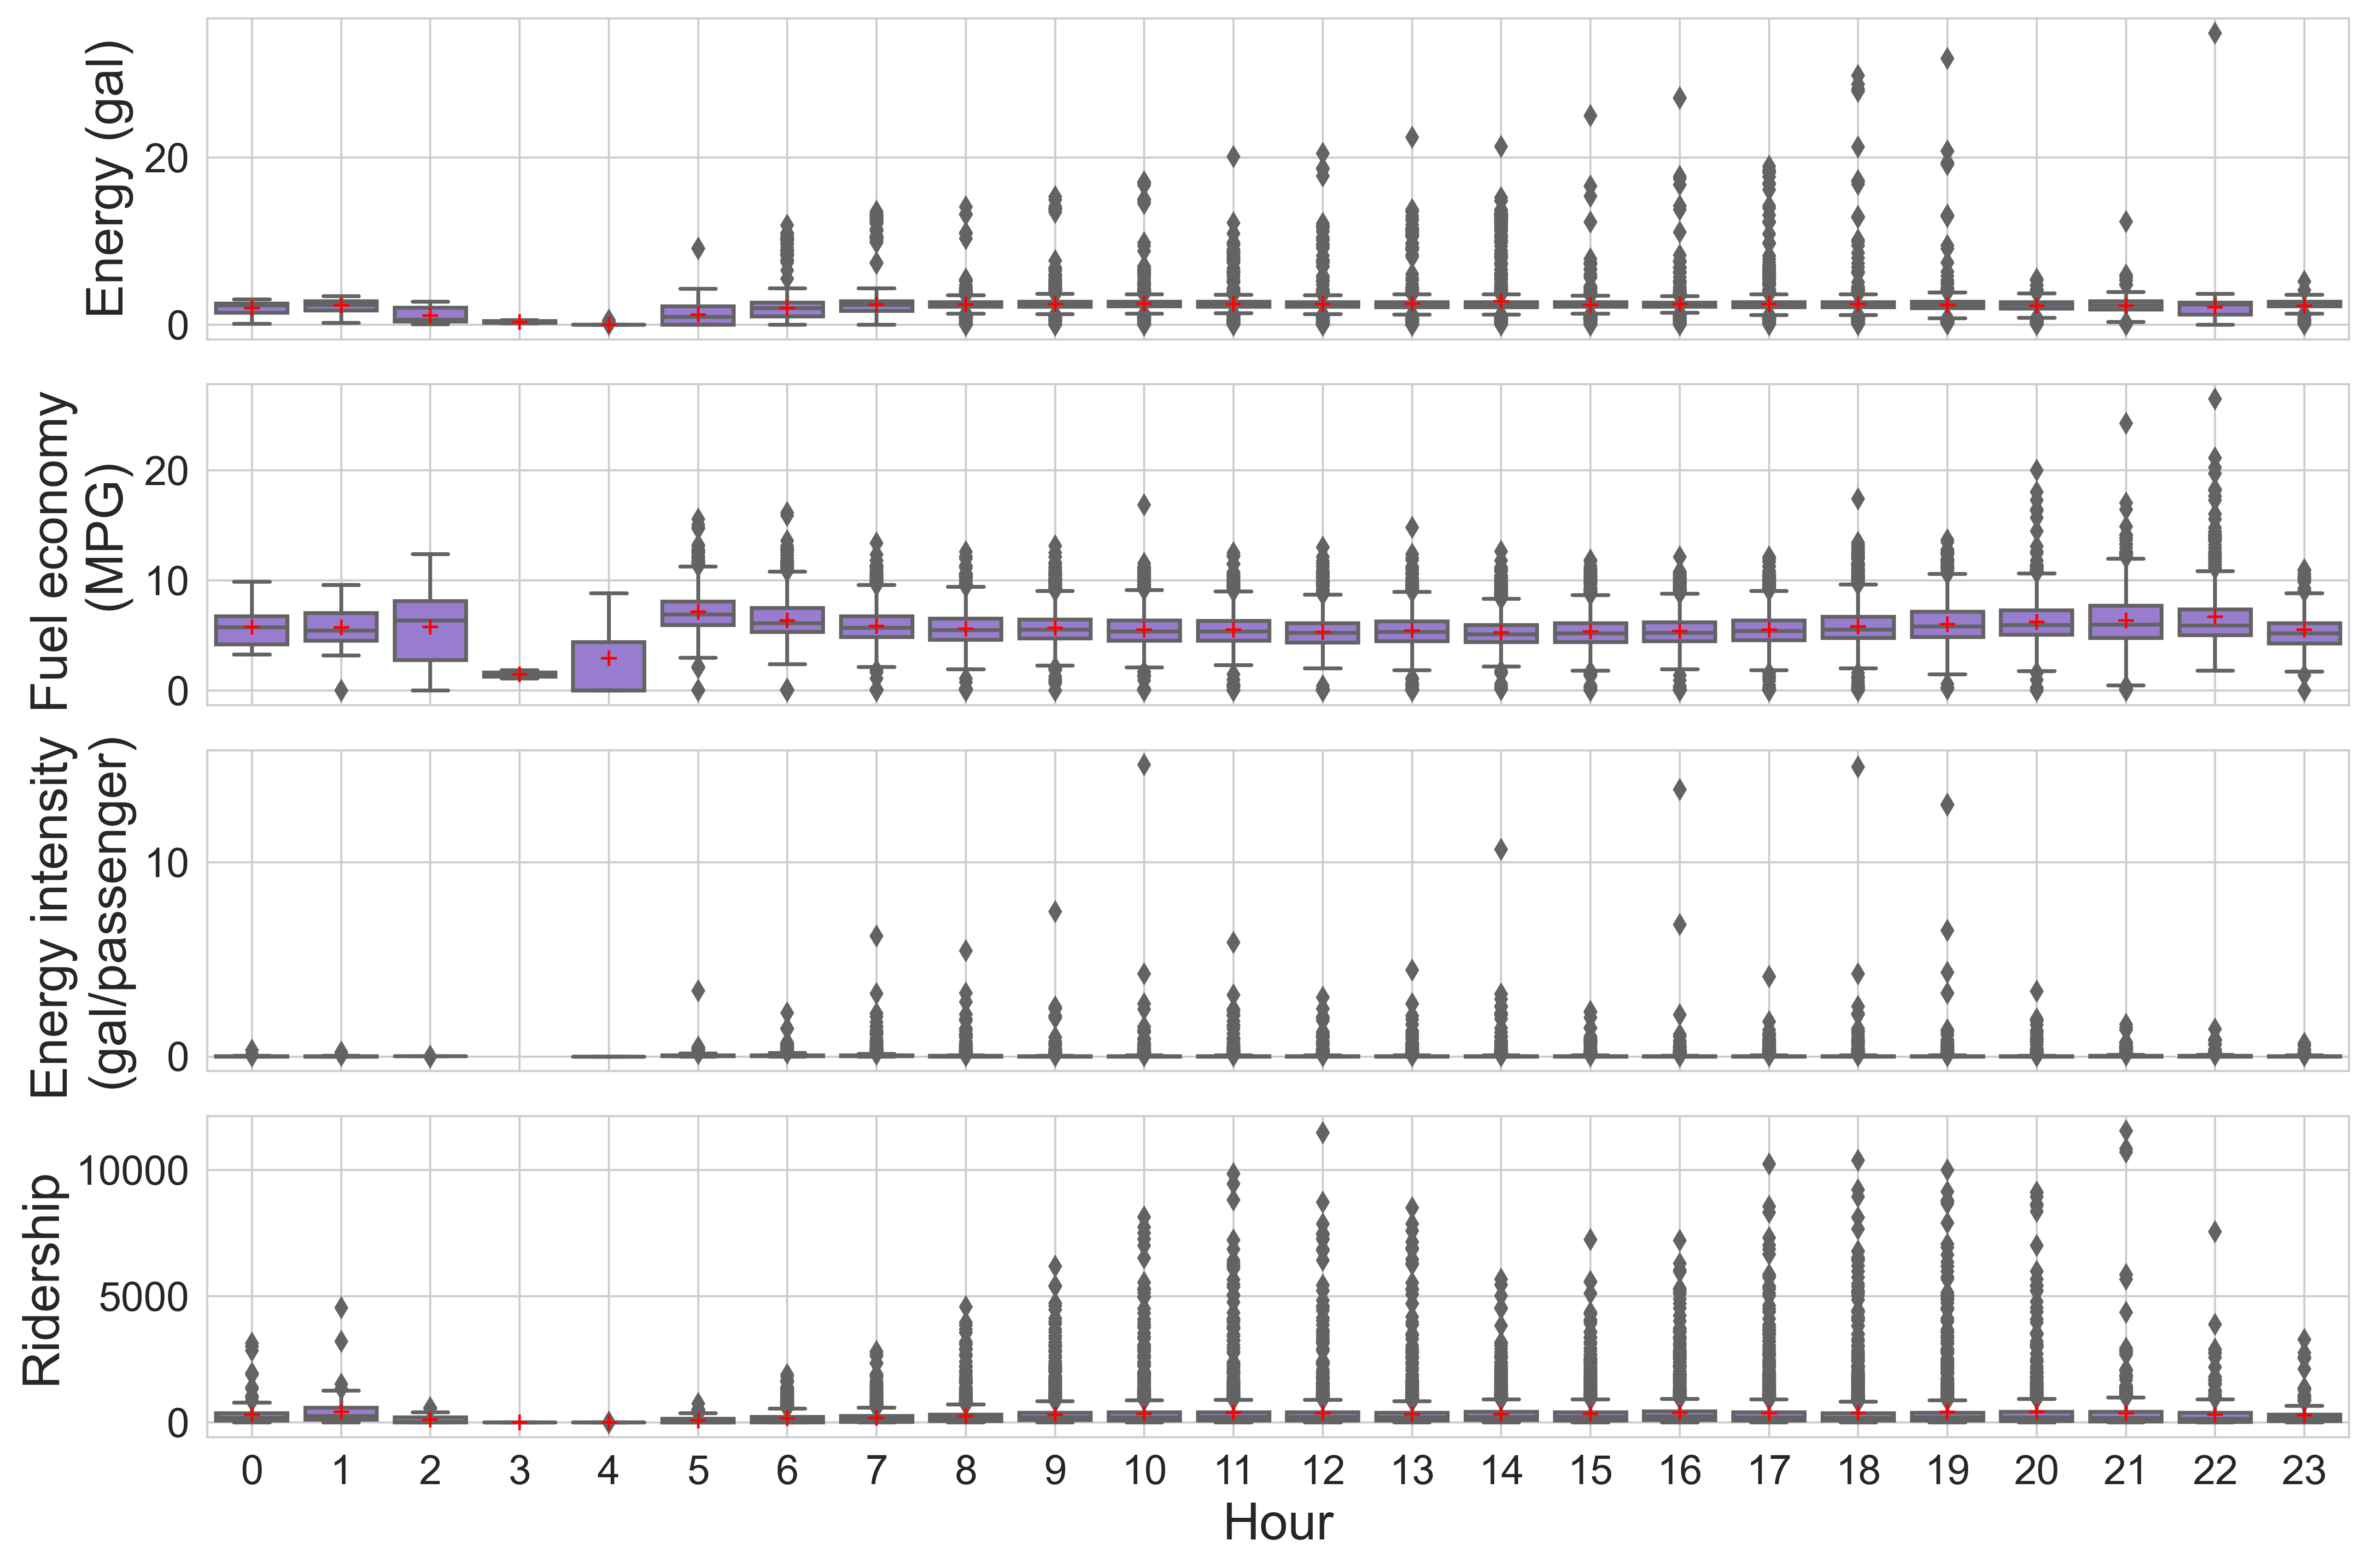

In [137]:
# Drop rows with missing or infinite values
#df_model_diesel_hourly_plot['energy_intensity'] = df_model_diesel_hourly_plot['energy_intensity'].replace([np.inf, -np.inf], np.nan).dropna()

fig, axs = plt.subplots(nrows=4, figsize=(15, 10), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.14)

sns.boxplot(x='Hour', y='Energy', data=df_model_diesel_hourly_plot, ax=axs[0],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
axs[0].set_ylabel('Energy (gal)', fontsize=20)
axs[0].tick_params(labelsize=16)
axs[0].grid(True)
#axs[0].set_ylim(0, 5)
# Add a horizontal line for the mean value


sns.boxplot(x='Hour', y='fuel_economy', data=df_model_diesel_hourly_plot, ax=axs[1], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1].set_xlabel('')
axs[1].set_ylabel('Fuel economy \n (MPG)', fontsize=20)
axs[1].tick_params(labelsize=16)
axs[1].grid(True)
#axs[1].set_ylim(0, 15)


sns.boxplot(x='Hour', y='energy_intensity', data=df_model_diesel_hourly_plot, ax=axs[2], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"}, color="mediumpurple")
axs[2].set_xlabel('')
axs[2].set_ylabel('Energy intensity \n(gal/passenger)', fontsize=20)
axs[2].tick_params(labelsize=16)
axs[2].grid(True)
#axs[2].set_ylim(0, 0.1)


sns.boxplot(x='Hour', y='Onboard', data=df_model_diesel_hourly_plot, ax=axs[3],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[3].set_xlabel('Hour', fontsize=20)
axs[3].set_ylabel('Ridership', fontsize=20)
axs[3].tick_params(labelsize=16)
axs[3].grid(True)
#axs[3].set_ylim(0, 15)

fig.savefig(r'../../figures/hourly-results-facet-plot-diesel-vehicle-level.png', dpi=400, bbox_inches='tight')
plt.show()


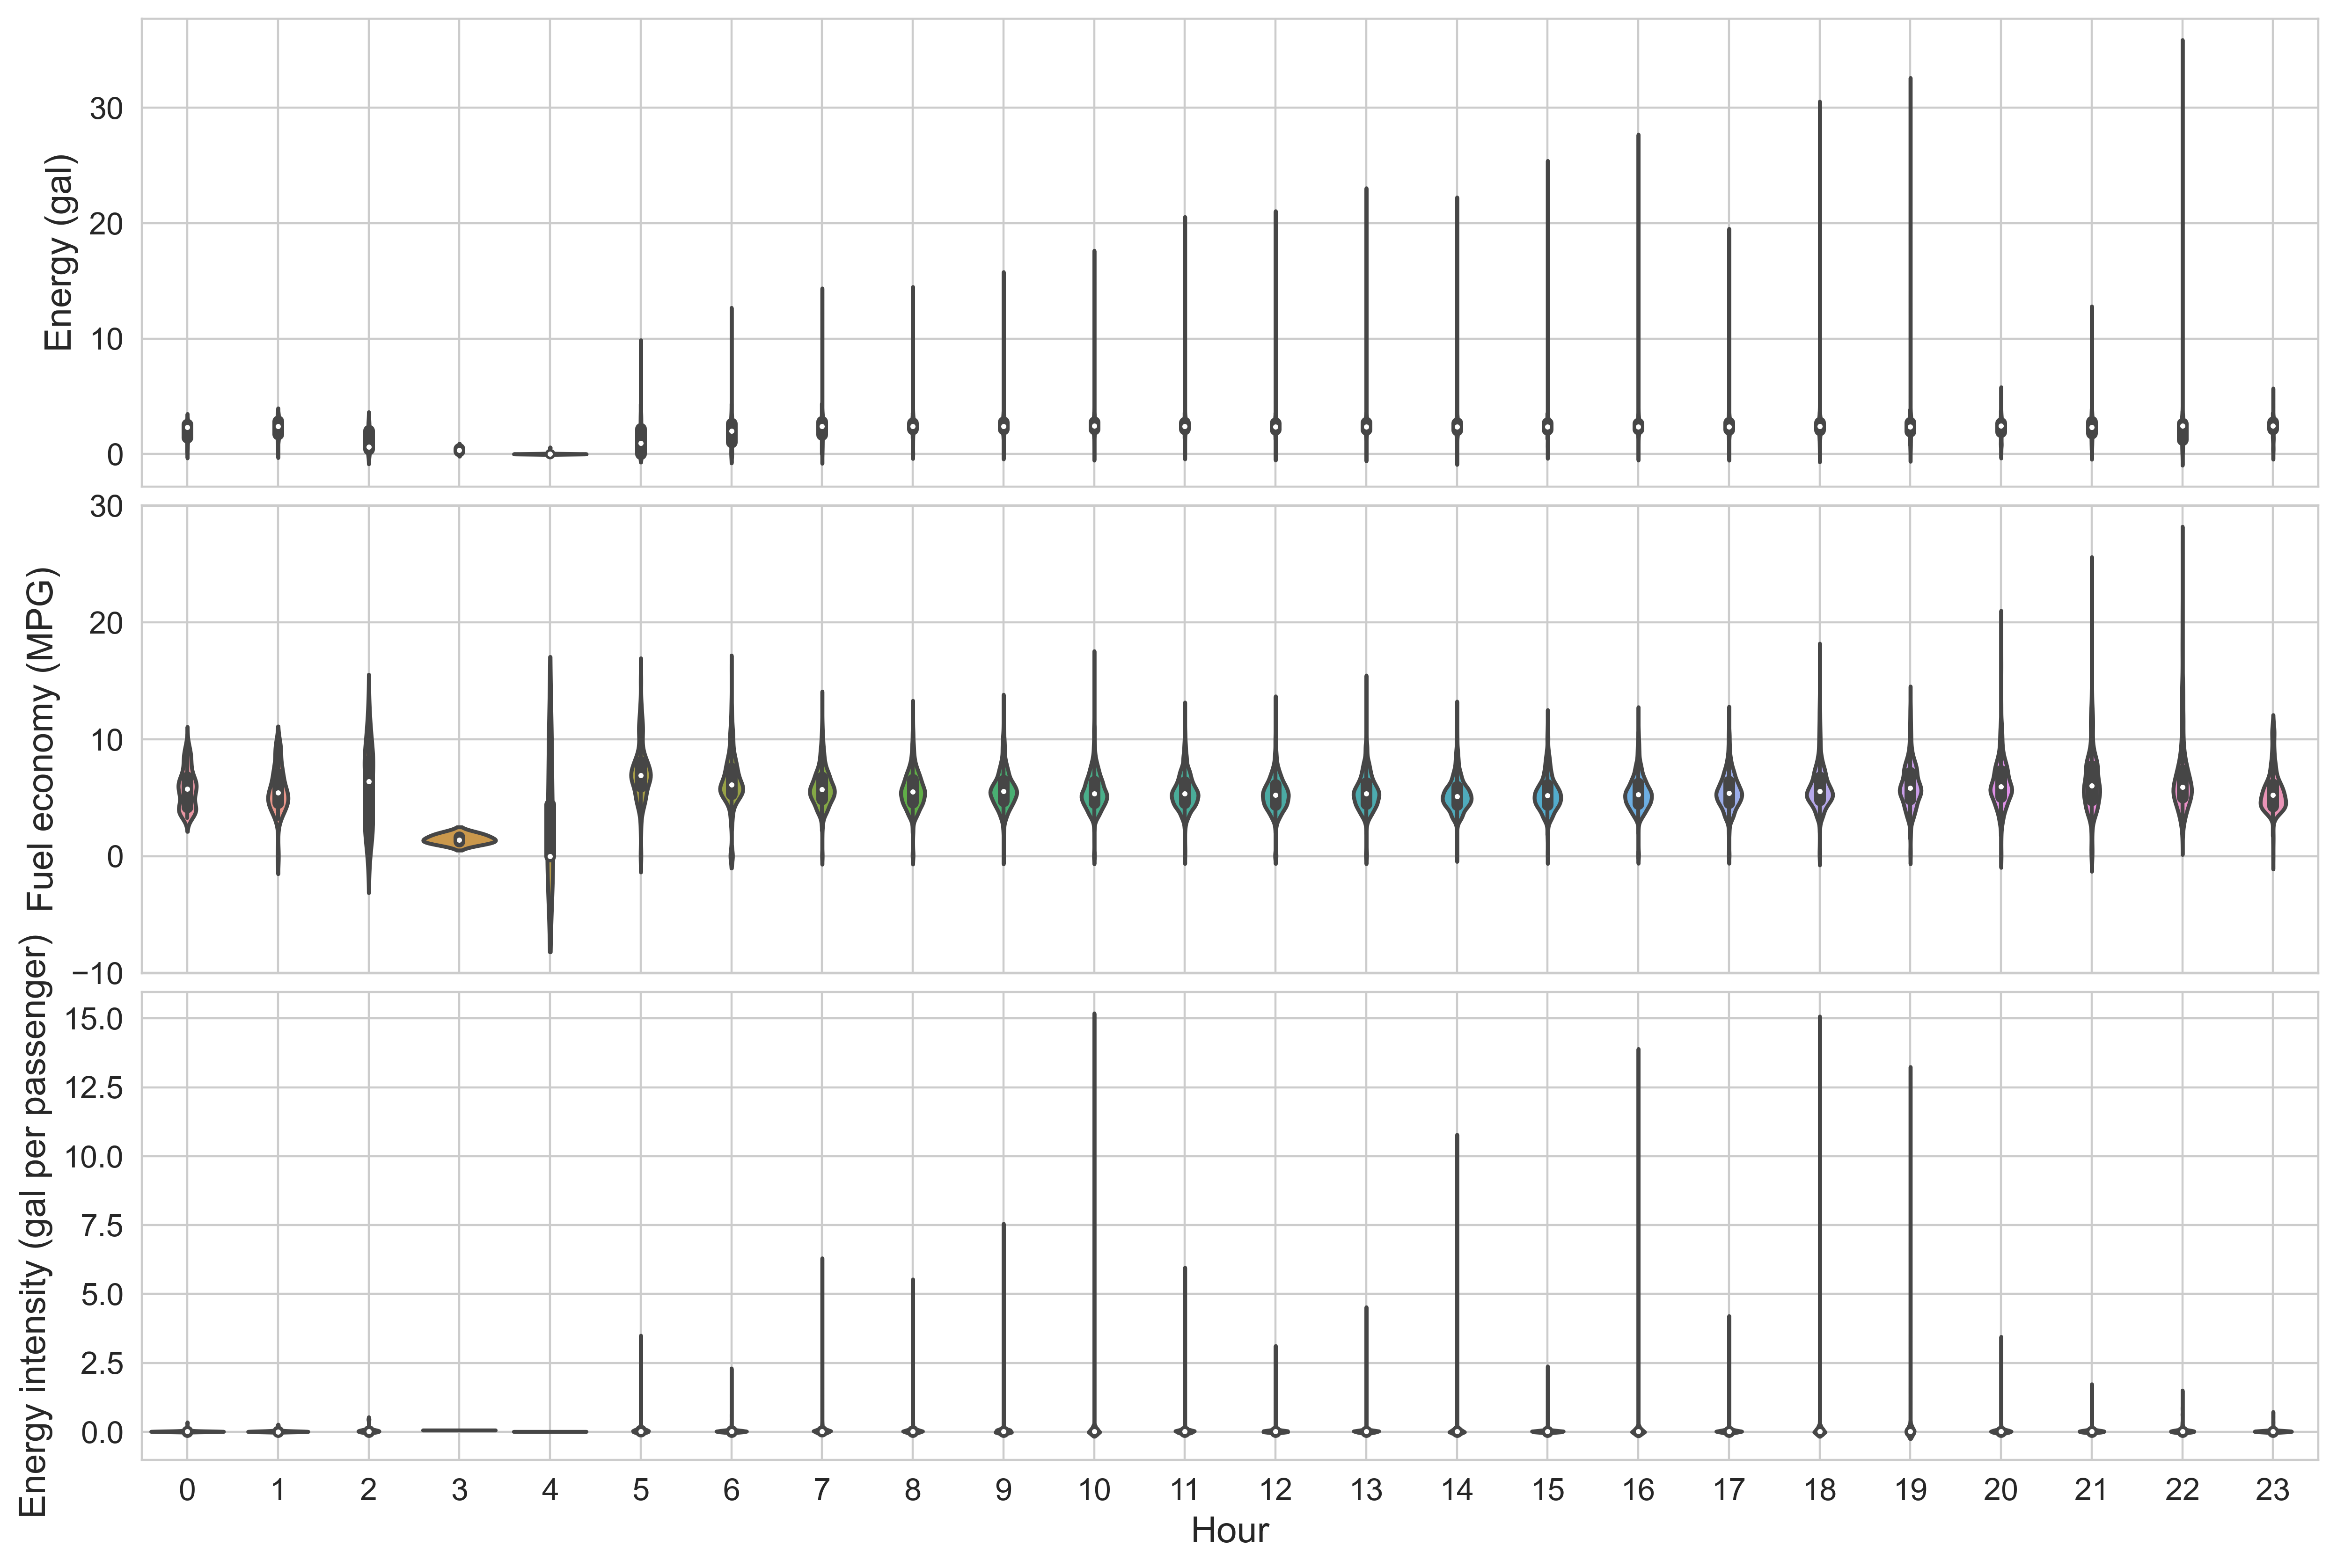

In [138]:
# Drop rows with missing or infinite values
#df_model_diesel_hourly_plot['energy_intensity'] = df_model_diesel_hourly_plot['energy_intensity'].replace([np.inf, -np.inf], np.nan).dropna()

fig, axs = plt.subplots(nrows=3, figsize=(15, 10), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.04)

sns.violinplot(x='Hour', y='Energy', data=df_model_diesel_hourly_plot, ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_ylabel('Energy (gal)', fontsize=14)
axs[0].tick_params(labelsize=12)
axs[0].grid(True)
#axs[0].set_ylim(0, 5)

sns.violinplot(x='Hour', y='fuel_economy', data=df_model_diesel_hourly_plot, ax=axs[1])
axs[1].set_xlabel('')
axs[1].set_ylabel('Fuel economy (MPG)', fontsize=14)
axs[1].tick_params(labelsize=12)
axs[1].grid(True)
#axs[1].set_ylim(0, 15)

df_model_diesel_hourly_plot['energy_intensity'] = df_model_diesel_hourly_plot['energy_intensity'].replace([np.inf, -np.inf], np.nan).dropna()
sns.violinplot(x='Hour', y='energy_intensity', data=df_model_diesel_hourly_plot, ax=axs[2])
axs[2].set_xlabel('Hour', fontsize=14)
axs[2].set_ylabel('Energy intensity (gal per passenger)', fontsize=14)
axs[2].tick_params(labelsize=12)
axs[2].grid(True)
#axs[2].set_ylim(0, 0.1)


#fig.savefig(r'../../figures/hourly-results-facet-plot-diesel-vehicle-level.png', dpi=400, bbox_inches='tight')
plt.show()


In [139]:
df_model_electric = df_model[(df_model.Powertrain == 'electric')].copy()

In [140]:
df_model_electric['dist'].max()

8.829564847256826

In [141]:
df_model_electric['dist'].min()

0.0

In [142]:
df_model_electric['Energy'].max()

16.073717504221854

In [143]:
df_model_electric['Energy'].min()

-5.82188847951157

In [144]:
df_model_electric['fuel_economy']=df_model_electric['dist'].round(2)/df_model_electric['Energy'].round(2)
df_model_electric['fuel_economy'] = df_model_electric['fuel_economy'].replace([np.inf, -np.inf, np.nan]).dropna()

In [145]:
df_model_electric['fuel_economy'].min()

-220.0

In [146]:
df_model_electric['fuel_economy'].max()

478.0

In [147]:
df_model_electric['fuel_economy'].unique()

array([         nan,   0.64499635,   0.69736842, ..., -21.5       ,
         0.14922049,   1.16393443])

In [185]:
df_model_electric_hourly_plot = df_model_electric.groupby(['Vehicle','Date','Hour']).agg({'Energy': ['sum'],'fuel_economy': ['mean'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()

In [186]:
df_model_electric_hourly_plot['energy_intensity']=df_model_electric_hourly_plot['Energy']/df_model_electric_hourly_plot['Onboard']

In [187]:
df_model_electric_hourly_plot.columns = df_model_electric_hourly_plot.columns.droplevel(1)

In [151]:
df_model_electric_hourly_plot['fuel_economy'] = df_model_electric_hourly_plot['fuel_economy'].replace([np.inf, -np.inf, np.nan]).dropna()
df_model_electric_hourly_plot['energy_intensity'] = df_model_electric_hourly_plot['energy_intensity'].replace([np.inf, -np.inf, np.nan]).dropna()

In [152]:
df_model_electric_hourly_plot['fuel_economy'].mean()

0.747573940702047

In [153]:
df_model_electric
maximum=df_model_electric['fuel_economy'].max()
df_model_electric.loc[df_model_electric['fuel_economy']==maximum]

ServiceDateTime  DateKey             CalendarDate  Year  Month  \
27447 2022-04-26 15:16:29     8785  2022-04-26 00:00:00.000  2022      4   
27448 2022-04-27 07:26:40     8786  2022-04-27 00:00:00.000  2022      4   

       OpKey Operator  RtKey  RtKey2 Route  ...      dist      Speed  \
27447      2    SATCo   3631    1104  9999  ...  4.784116  21.773267   
27448      2    SATCo   3649    1090    G1  ...  0.000000   0.000000   

      Acceleration  Powertrain    VehicleModel Vehicle_mass  elevation  \
27447    -0.006857    electric  NEW FLYER XE40        32770       64.0   
27448     0.000000    electric  NEW FLYER XE40        32770       70.0   

          grade    Energy fuel_economy  
27447  0.002337  0.014643        478.0  
27448  0.000000  0.000000        478.0  

[2 rows x 46 columns]

In [154]:
maximum=df_model_electric_hourly_plot['fuel_economy'].min()
df_model_electric_hourly_plot.loc[df_model_electric_hourly_plot['fuel_economy']==maximum]

Vehicle        Date  Hour    Energy  fuel_economy  Onboard  \
334     1411  2022-04-07    20  8.567379    -34.478802        6   

                VehicleModel  energy_intensity  
334  PROTERRA CATALYST BE-40          1.427897

In [155]:
df_model_electric_hourly_plot['fuel_economy'].describe()

count    985.000000
mean       0.747574
std       15.374649
min      -34.478802
25%       -0.239611
50%        0.238409
75%        0.752270
max      478.000000
Name: fuel_economy, dtype: float64

In [156]:
df_model_electric_hourly_plot['Hour'].unique()

array([14, 15, 16, 17, 18,  6,  7, 13,  8,  9, 10, 11, 12,  5, 19, 20, 21,
       22, 23,  4], dtype=int64)

In [157]:
# Drop rows with missing or infinite values
fig, axs = plt.subplots(nrows=4, figsize=(15, 45), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.14)

sns.boxplot(x='Hour', y='Energy', data=df_model_electric_hourly_plot, ax=axs[0],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
axs[0].set_ylabel('Energy (kWh)', fontsize=40)
axs[0].tick_params(labelsize=25)
axs[0].grid(True)
#axs[0].set_ylim(0, 5)

df_model_electric_hourly_plot = df_model_electric_hourly_plot[~np.isnan(df_model_electric_hourly_plot['fuel_economy'])]

sns.boxplot(x='Hour', y='fuel_economy', data=df_model_electric_hourly_plot, ax=axs[1],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1].set_xlabel('')
axs[1].set_ylabel('Fuel economy \n (MPkWh)', fontsize=40)
axs[1].tick_params(labelsize=25)
axs[1].grid(True)
#axs[1].set_ylim(5e-5, 5e+5)

sns.boxplot(x='Hour', y='energy_intensity', data=df_model_electric_hourly_plot, ax=axs[2],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[2].set_xlabel('Hour', fontsize=40)
axs[2].set_ylabel('Energy intensity \n (kWh/passenger)', fontsize=20)
axs[2].tick_params(labelsize=25)
axs[2].grid(True)
#axs[2].set_ylim(, 0.2)

sns.boxplot(x='Hour', y='Onboard', data=df_model_electric_hourly_plot, ax=axs[3],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[3].set_xlabel('Hour', fontsize=40)
axs[3].set_ylabel('Ridership', fontsize=25)
axs[3].tick_params(labelsize=16)
axs[3].grid(True)
#axs[3].set_ylim(0, 15)

fig.savefig(r'../../figures/hourly-results-facet-plot-electric-vehicle-level.png', dpi=400, bbox_inches='tight')
plt.show()

In [158]:
### System level

In [159]:
df_model_diesel_hourly_plot = df_model_diesel.groupby(['Date','Hour']).agg({'Energy': ['sum'],'fuel_economy': ['mean'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()

In [160]:
df_model_diesel_hourly_plot['energy_intensity']=df_model_diesel_hourly_plot['Energy']/df_model_diesel_hourly_plot['Onboard']

In [161]:
df_model_diesel_hourly_plot.columns = df_model_diesel_hourly_plot.columns.droplevel(1)

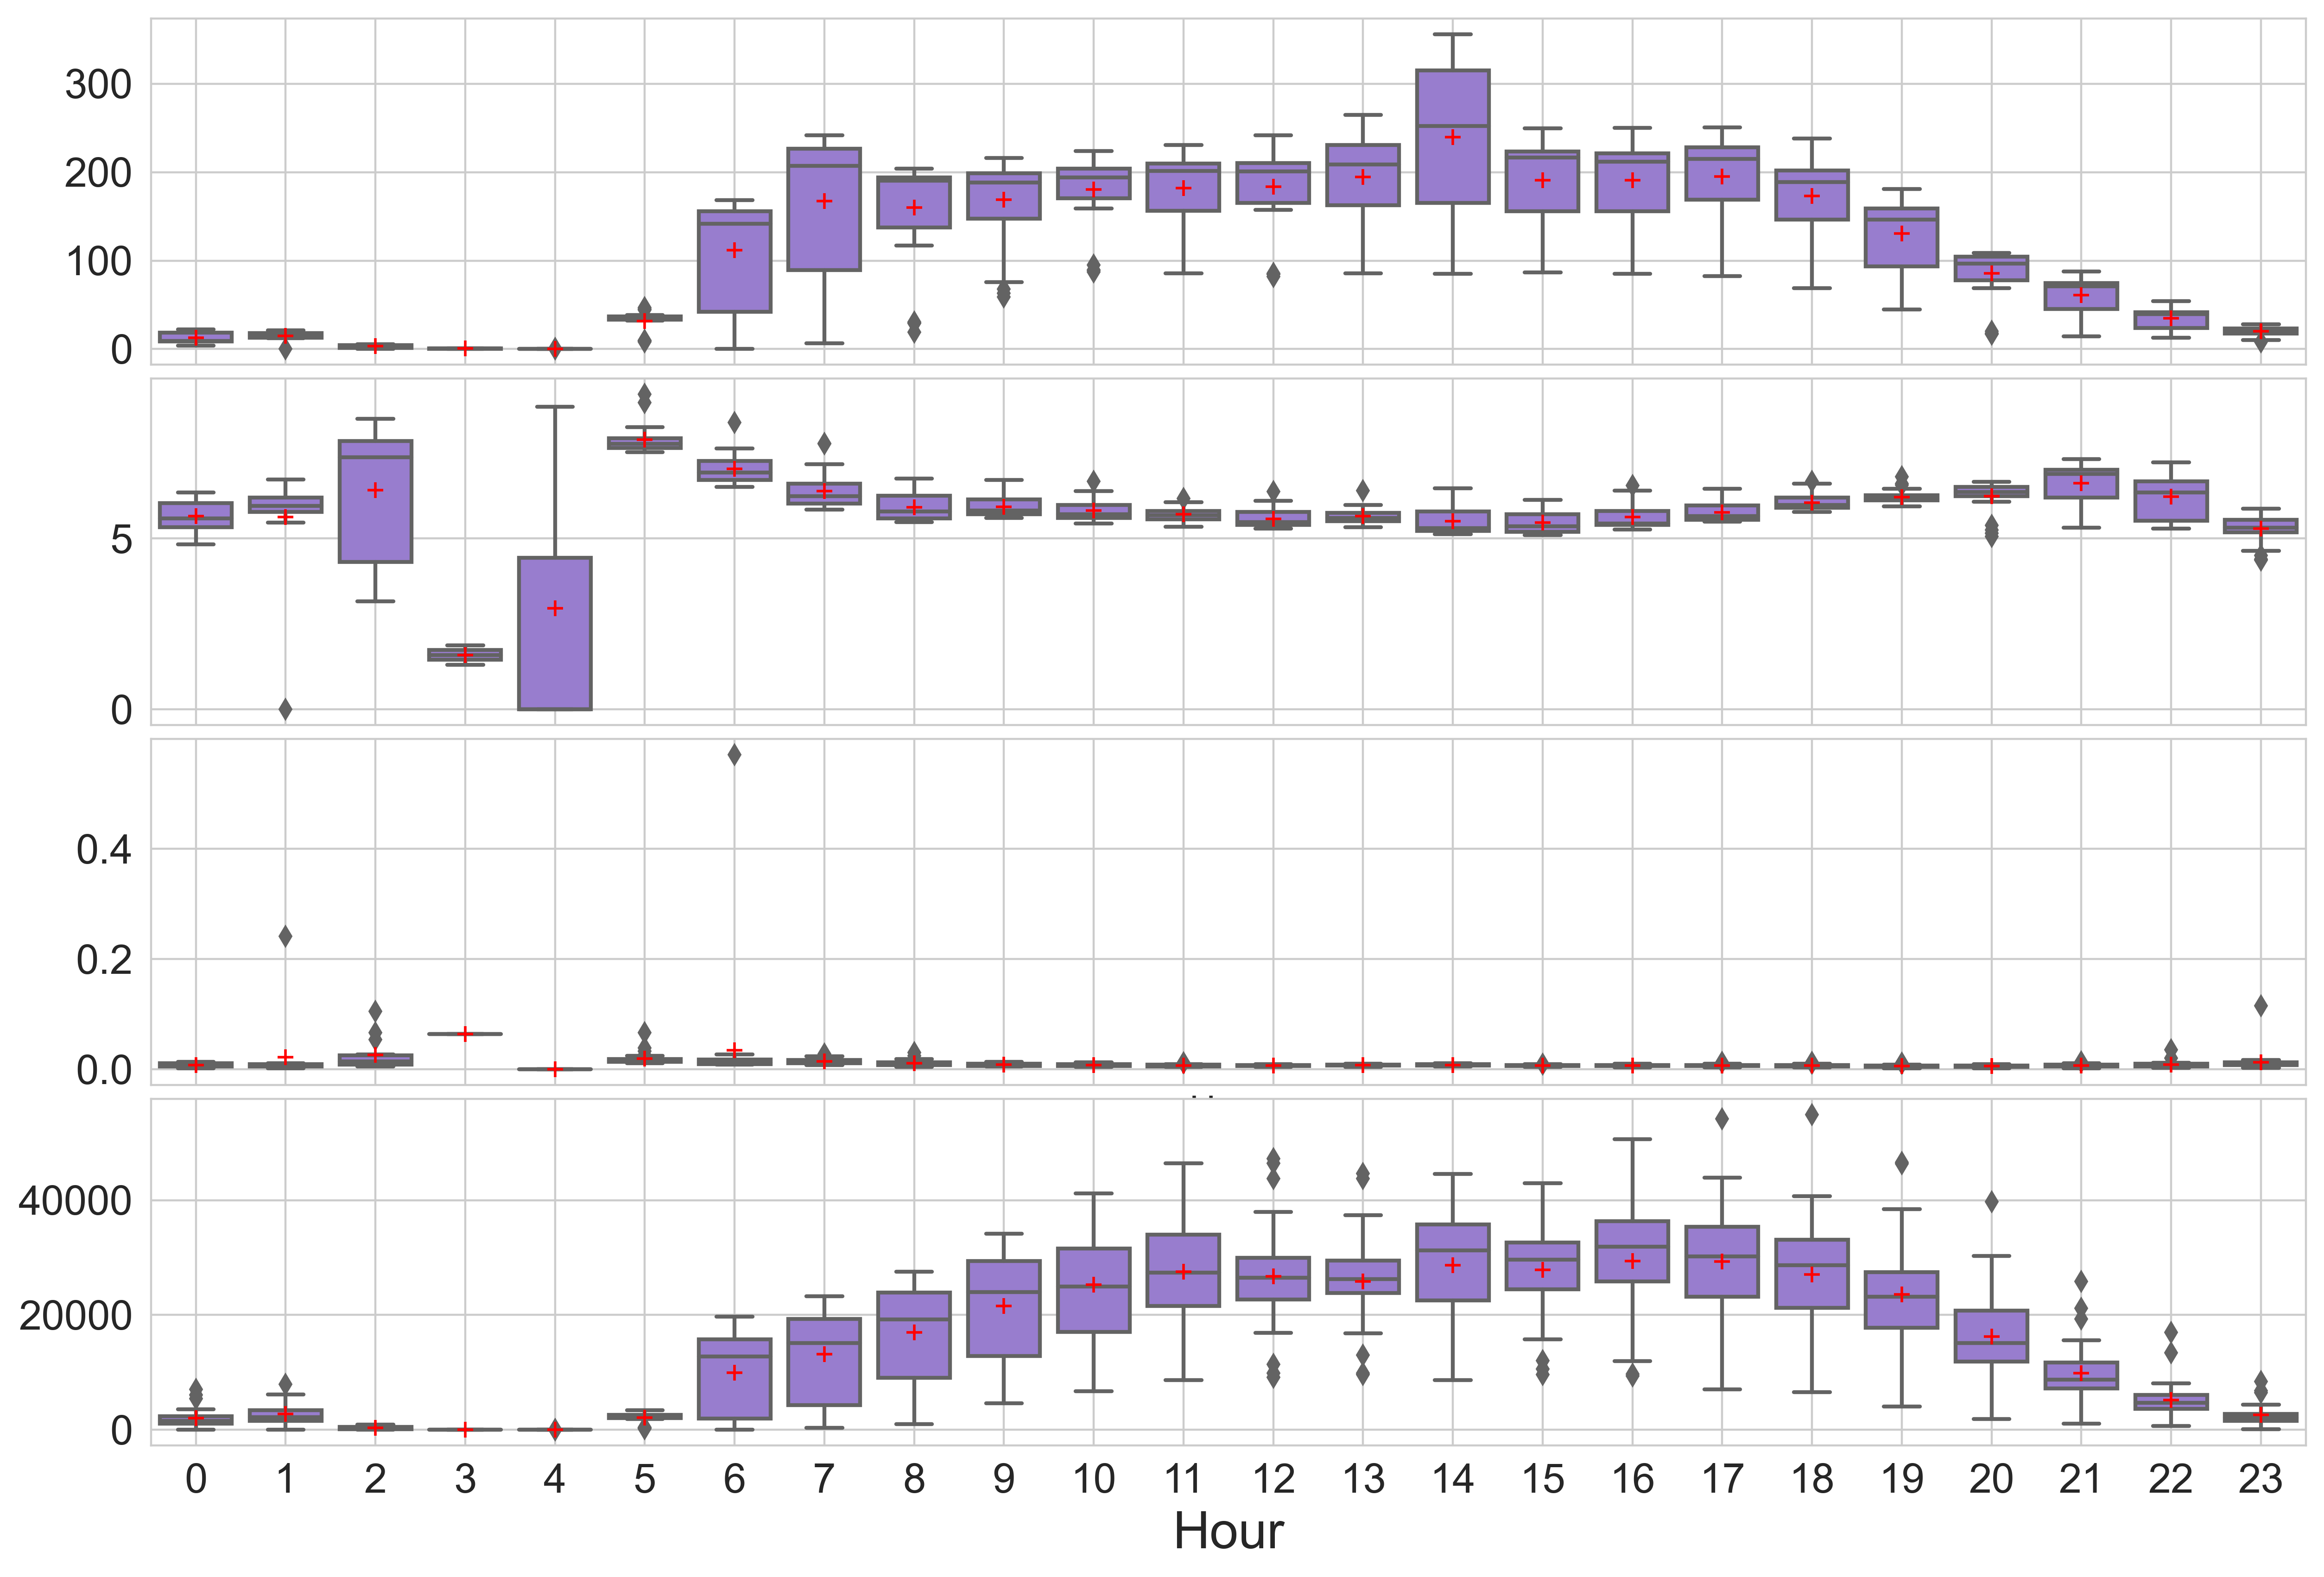

In [162]:
# Drop rows with missing or infinite values
#df_model_diesel_hourly_plot['energy_intensity'] = df_model_diesel_hourly_plot['energy_intensity'].replace([np.inf, -np.inf], np.nan).dropna()

fig, axs = plt.subplots(nrows=4, figsize=(15, 10), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.04)

sns.boxplot(x='Hour', y='Energy', data=df_model_diesel_hourly_plot, ax=axs[0], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
#axs[0].set_ylabel('Energy (gal)', fontsize=20)
axs[0].set_ylabel('')
axs[0].tick_params(labelsize=16)
axs[0].grid(True)
#axs[0].set_ylim(0, 5)

sns.boxplot(x='Hour', y='fuel_economy', data=df_model_diesel_hourly_plot, ax=axs[1], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1].set_xlabel('')
#axs[1].set_ylabel('Fuel economy \n (MPG)', fontsize=20)
axs[1].set_ylabel('')
axs[1].tick_params(labelsize=16)
axs[1].grid(True)
#axs[1].set_ylim(0, 15)

df_model_diesel_hourly_plot['energy_intensity'] = df_model_diesel_hourly_plot['energy_intensity'].replace([np.inf, -np.inf], np.nan).dropna()
sns.boxplot(x='Hour', y='energy_intensity', data=df_model_diesel_hourly_plot, ax=axs[2], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[2].set_xlabel('Hour', fontsize=14)
#axs[2].set_ylabel('Energy intensity \n (gal/passenger)', fontsize=20)
axs[2].set_ylabel('')
axs[2].tick_params(labelsize=16)
axs[2].grid(True)
#axs[2].set_ylim(0, 0.1)

sns.boxplot(x='Hour', y='Onboard', data=df_model_diesel_hourly_plot, ax=axs[3],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[3].set_xlabel('Hour', fontsize=20)
#axs[3].set_ylabel('Ridership', fontsize=20)
axs[3].set_ylabel('')
axs[3].tick_params(labelsize=16)
axs[3].grid(True)
#axs[3].set_ylim(0, 15)

fig.savefig(r'../../figures/hourly-results-facet-plot-diesel-system-level.png', dpi=300, bbox_inches='tight')
plt.show()


In [163]:
df_model_electric_hourly_plot = df_model_electric.groupby(['Date','Hour']).agg({'Energy': ['sum'],'fuel_economy': ['mean'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()

In [164]:
df_model_electric_hourly_plot['energy_intensity']=df_model_electric_hourly_plot['Energy']/df_model_electric_hourly_plot['Onboard']

In [165]:
df_model_electric_hourly_plot.columns = df_model_electric_hourly_plot.columns.droplevel(1)

In [166]:
df_model_electric_hourly_plot['fuel_economy'] = df_model_electric_hourly_plot['fuel_economy'].replace([np.inf, -np.inf, np.nan]).dropna()
df_model_electric_hourly_plot['energy_intensity'] = df_model_electric_hourly_plot['energy_intensity'].replace([np.inf, -np.inf, np.nan]).dropna()

In [167]:
df_model_electric_hourly_plot.columns

Index(['Date', 'Hour', 'Energy', 'fuel_economy', 'Onboard', 'VehicleModel',
       'energy_intensity'],
      dtype='object')

In [168]:
df_model_electric_hourly_plot['Hour'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23,  4], dtype=int64)

In [169]:
hours = list(range(24))
hour_datetimes = [datetime.datetime(2022, 4, 4, hour=h) for h in hours]

In [170]:
hour_datetimes

[datetime.datetime(2022, 4, 4, 0, 0),
 datetime.datetime(2022, 4, 4, 1, 0),
 datetime.datetime(2022, 4, 4, 2, 0),
 datetime.datetime(2022, 4, 4, 3, 0),
 datetime.datetime(2022, 4, 4, 4, 0),
 datetime.datetime(2022, 4, 4, 5, 0),
 datetime.datetime(2022, 4, 4, 6, 0),
 datetime.datetime(2022, 4, 4, 7, 0),
 datetime.datetime(2022, 4, 4, 8, 0),
 datetime.datetime(2022, 4, 4, 9, 0),
 datetime.datetime(2022, 4, 4, 10, 0),
 datetime.datetime(2022, 4, 4, 11, 0),
 datetime.datetime(2022, 4, 4, 12, 0),
 datetime.datetime(2022, 4, 4, 13, 0),
 datetime.datetime(2022, 4, 4, 14, 0),
 datetime.datetime(2022, 4, 4, 15, 0),
 datetime.datetime(2022, 4, 4, 16, 0),
 datetime.datetime(2022, 4, 4, 17, 0),
 datetime.datetime(2022, 4, 4, 18, 0),
 datetime.datetime(2022, 4, 4, 19, 0),
 datetime.datetime(2022, 4, 4, 20, 0),
 datetime.datetime(2022, 4, 4, 21, 0),
 datetime.datetime(2022, 4, 4, 22, 0),
 datetime.datetime(2022, 4, 4, 23, 0)]

In [171]:
print(df_model_electric_hourly_plot['Hour'].dtype)

int64


In [172]:
# Create a new row with Hour=0 and empty values for all other columns
new_row = pd.DataFrame({'Date': pd.NaT, 'Hour': 0, 'Energy': 0, 'fuel_economy': 0, 'Onboard': 0, 'VehicleModel': 0, 'energy_intensity': 0}, index=[0])

# Concatenate the new row with the original DataFrame
df_model_electric_hourly_plot = pd.concat([new_row, df_model_electric_hourly_plot]).reset_index(drop=True)

In [173]:
# Create a new row with Hour=0 and empty values for all other columns
new_row = pd.DataFrame({'Date': pd.NaT, 'Hour': 1, 'Energy': 0, 'fuel_economy': 0, 'Onboard': 0, 'VehicleModel': 0, 'energy_intensity': 0}, index=[0])

# Concatenate the new row with the original DataFrame
df_model_electric_hourly_plot = pd.concat([new_row, df_model_electric_hourly_plot]).reset_index(drop=True)

In [174]:
# Create a new row with Hour=0 and empty values for all other columns
new_row = pd.DataFrame({'Date': pd.NaT, 'Hour': 2, 'Energy': 0, 'fuel_economy': 0, 'Onboard': 0, 'VehicleModel': 0, 'energy_intensity': 0}, index=[0])

# Concatenate the new row with the original DataFrame
df_model_electric_hourly_plot = pd.concat([new_row, df_model_electric_hourly_plot]).reset_index(drop=True)

In [175]:
# Create a new row with Hour=0 and empty values for all other columns
new_row = pd.DataFrame({'Date': pd.NaT, 'Hour': 3, 'Energy': 0, 'fuel_economy': 0, 'Onboard': 0, 'VehicleModel': 0, 'energy_intensity': 0}, index=[0])

# Concatenate the new row with the original DataFrame
df_model_electric_hourly_plot = pd.concat([new_row, df_model_electric_hourly_plot]).reset_index(drop=True)

In [176]:
# Drop rows with missing or infinite values
fig, axs = plt.subplots(nrows=4, figsize=(15, 45), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.04)

sns.boxplot(x='Hour', y='Energy', data=df_model_electric_hourly_plot, ax=axs[0],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
axs[0].set_ylabel('Energy (kWh)', fontsize=40)
#axs[0].set_ylabel('')
axs[0].tick_params(labelsize=28)
axs[0].grid(color='lightgrey', linewidth=0.4)
#axs[0].set_ylim(0, 5)
#axs[0].set_xlim(hour_datetimes[0], hour_datetimes[-1])
#axs[0].set_xlim(-4, 20)

df_model_electric_hourly_plot = df_model_electric_hourly_plot[~np.isnan(df_model_electric_hourly_plot['fuel_economy'])]
df_model_electric_hourly_plot = df_model_electric_hourly_plot[~np.isnan(df_model_electric_hourly_plot['fuel_economy'])]


sns.boxplot(x='Hour', y='fuel_economy', data=df_model_electric_hourly_plot, ax=axs[1],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1].set_xlabel('')
axs[1].set_ylabel('Fuel economy \n (MPkWh)', fontsize=40)
#axs[1].set_ylabel('')
axs[1].tick_params(labelsize=28)
axs[1].grid(color='lightgrey', linewidth=0.4)
#axs[1].set_ylim(5e-5, 5e+20)
#axs[1].set_xlim(-4, 20)

sns.boxplot(x='Hour', y='energy_intensity', data=df_model_electric_hourly_plot, ax=axs[2],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[2].set_xlabel('')
#axs[2].set_ylabel('')
axs[2].set_ylabel('Energy intensity \n (kWh per passenger)', fontsize=38)
axs[2].tick_params(labelsize=28)
axs[2].grid(color='lightgrey', linewidth=0.4)
#axs[2].set_ylim(0, 0.1)
#axs[2].set_xlim(-4, 20)

sns.boxplot(x='Hour', y='Onboard', data=df_model_electric_hourly_plot, ax=axs[3],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[3].set_xlabel('Hour', fontsize=40)
axs[3].set_ylabel('Ridership', fontsize=40)
#axs[3].set_ylabel('')
axs[3].tick_params(labelsize=28)
axs[3].grid(color='lightgrey', linewidth=0.4)
#axs[1].set_ylim(0, 15)
#axs[3].set_xlim(-4, 20)
#axs[3].set_xticks(range(24))

fig.savefig(r'../../figures/hourly-results-facet-plot-electric-system-level.png', dpi=400, bbox_inches='tight')
plt.show()

In [177]:
### Merge all vehicles in one plot

In [178]:
# step1: change kwh to gallons
df_model_electric = df_model[(df_model.Powertrain == 'electric')].copy()
df_model_electric['Energy']=df_model_electric['Energy']/33.7
df_model_electric['fuel_economy']=df_model_electric['dist'].round(2)/df_model_electric['Energy'].round(2)
#df_model_electric['fuel_economy'] = df_model_electric['fuel_economy'].replace([np.inf, -np.inf, np.nan]).dropna()
df_model_electric_hourly_plot = df_model_electric.groupby(['Date','Hour']).agg({'Energy': ['sum'],'fuel_economy': ['mean'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()
df_model_electric_hourly_plot['energy_intensity']=df_model_electric_hourly_plot['Energy']/df_model_electric_hourly_plot['Onboard']
#df_model_electric_hourly_plot['energy_intensity'] = df_model_electric_hourly_plot['energy_intensity'].replace([np.inf, -np.inf, np.nan]).dropna()
df_model_electric_hourly_plot.columns = df_model_electric_hourly_plot.columns.droplevel(1)

NameError: name 'df_model_all_hourly_plot' is not defined

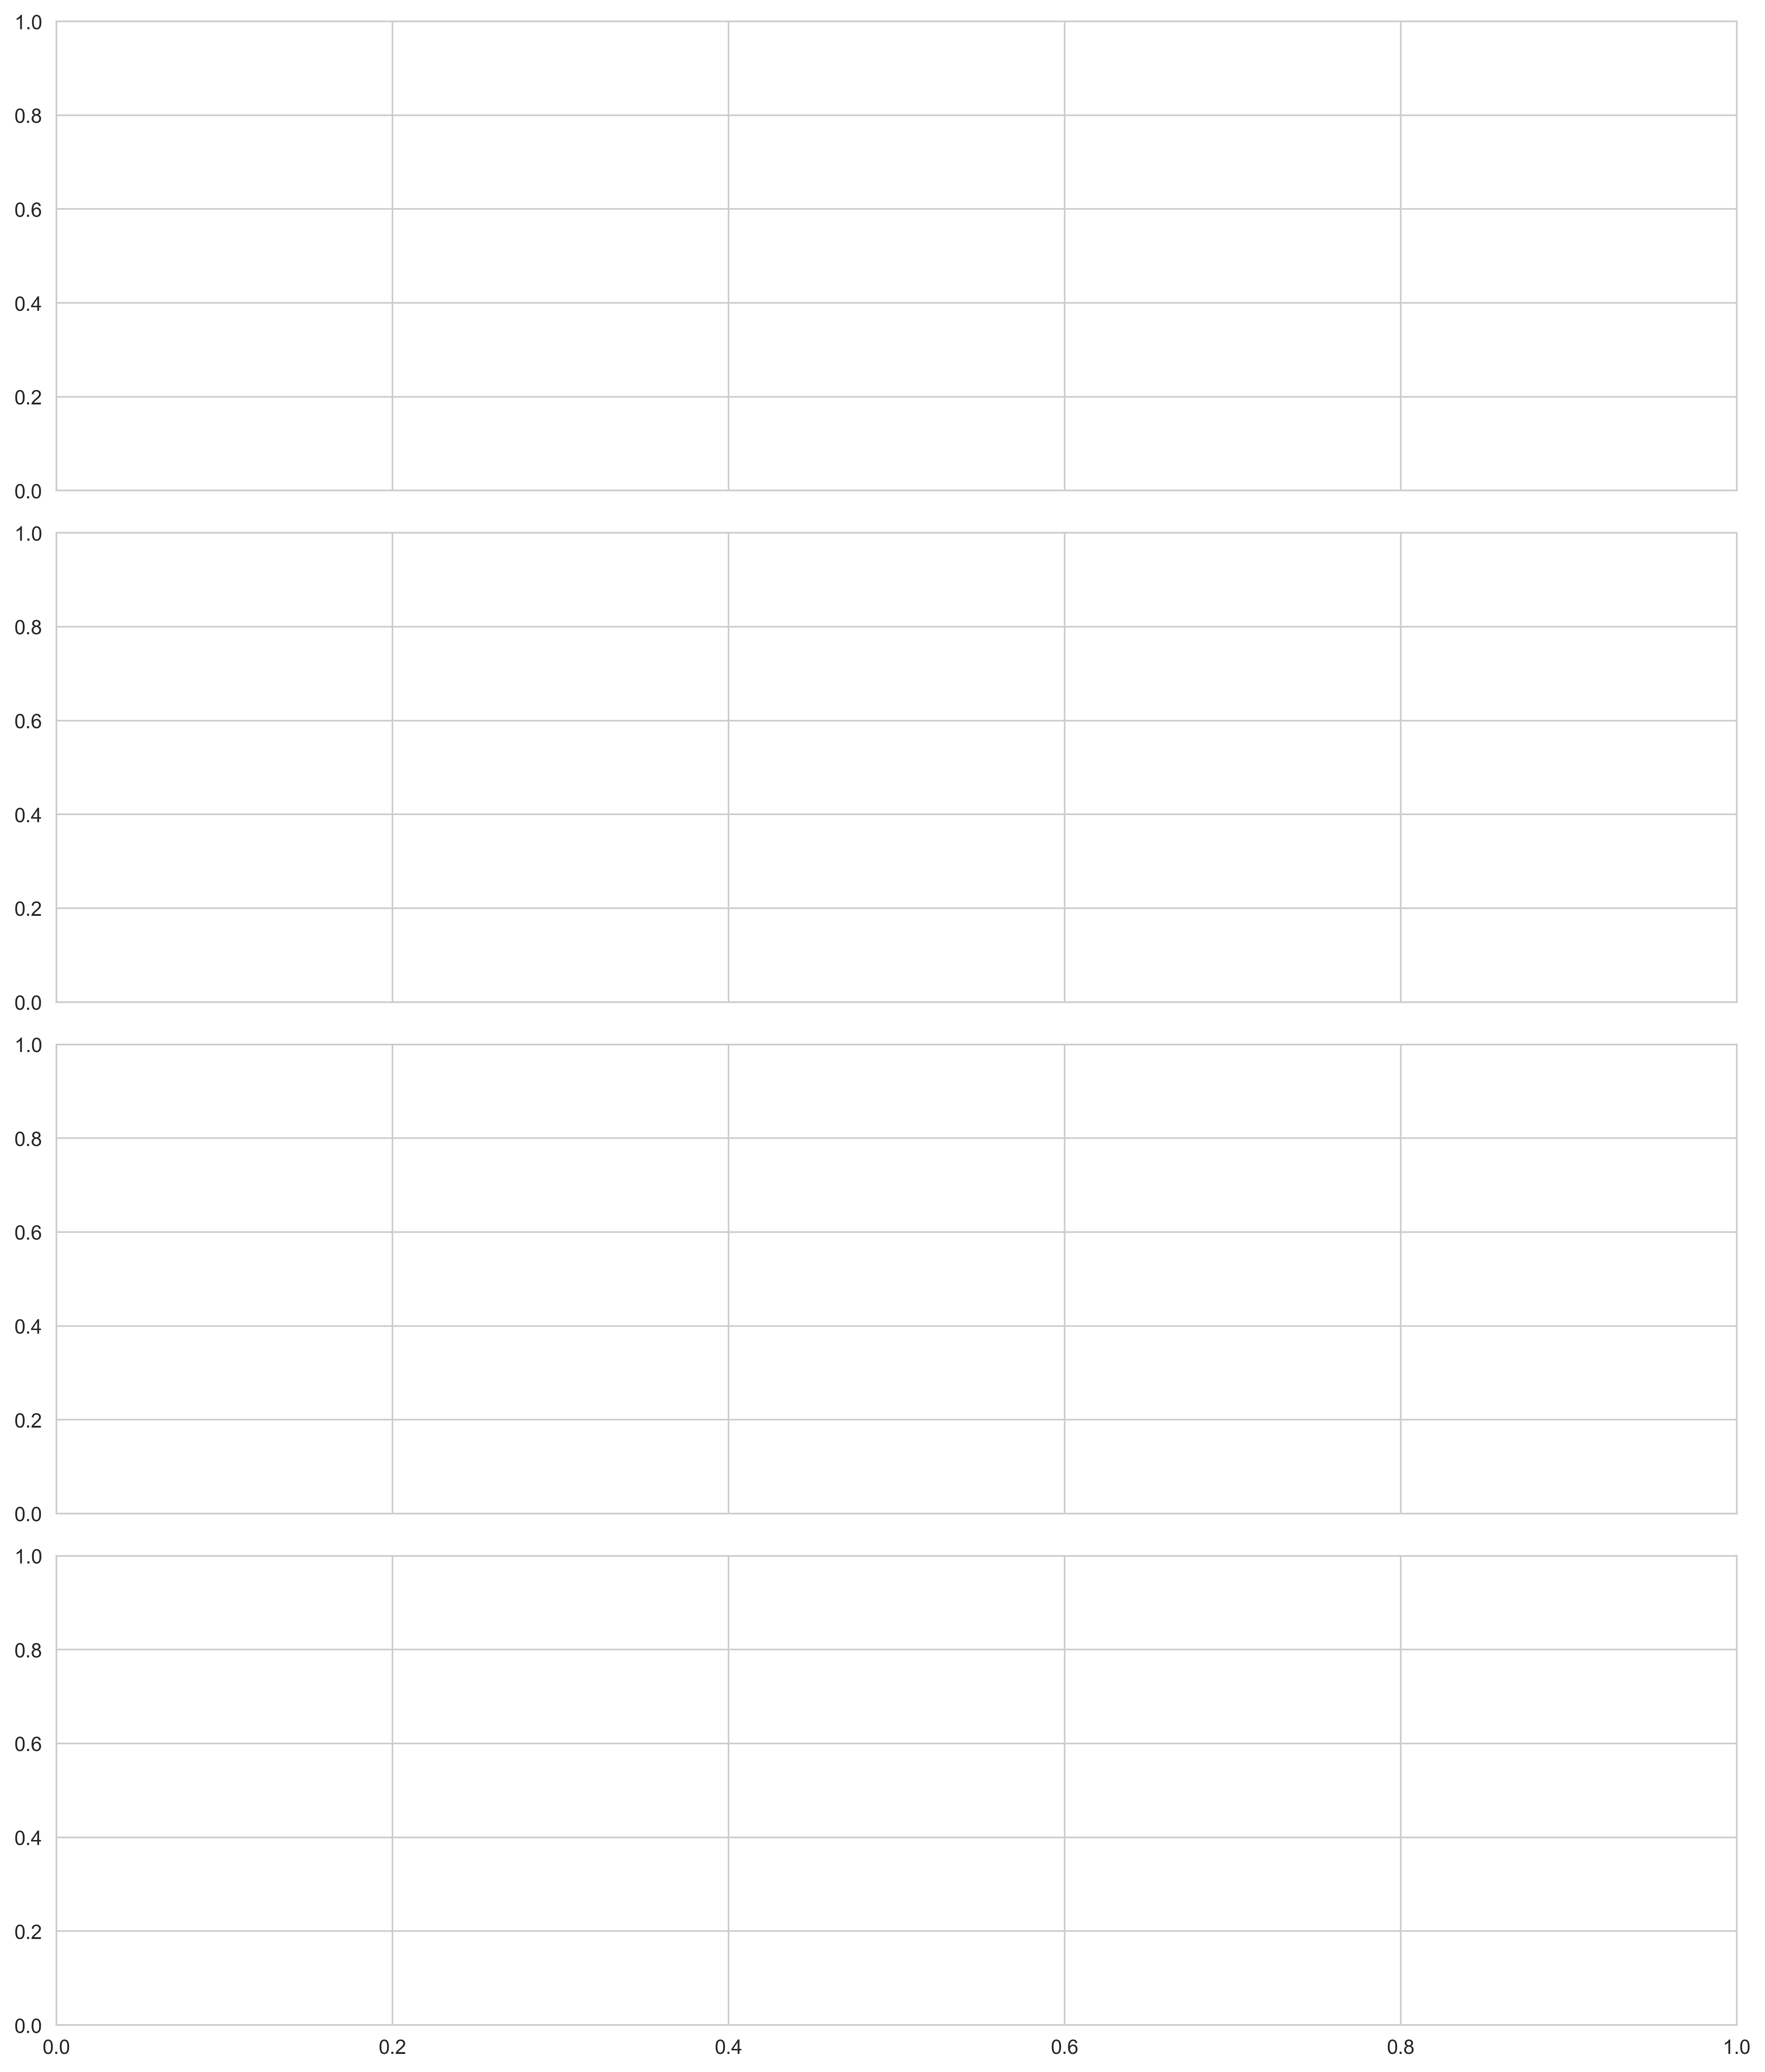

In [179]:
# Drop rows with missing or infinite values
fig, axs = plt.subplots(nrows=4, figsize=(15, 18), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.09)

sns.boxplot(x='Hour', y='Energy', data=df_model_all_hourly_plot, ax=axs[0],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
#axs[0].set_ylabel('Energy (kWh)', fontsize=20)
axs[0].set_ylabel('')
axs[0].tick_params(labelsize=16)
axs[0].grid(True)
#axs[0].set_ylim(0, 5)
axs[0].set_ylabel('Energy (gal)', fontsize=16)
axs[0].tick_params(labelsize=12)

df_model_all_hourly_plot = df_model_all_hourly_plot[~np.isnan(df_model_all_hourly_plot['fuel_economy'])]
df_model_all_hourly_plot = df_model_all_hourly_plot[~np.isnan(df_model_all_hourly_plot['fuel_economy'])]


sns.boxplot(x='Hour', y='fuel_economy', data=df_model_all_hourly_plot, ax=axs[1],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1].set_xlabel('')
#axs[1].set_ylabel('Fuel economy \n (MPkWh)', fontsize=20)
axs[1].set_ylabel('')
axs[1].tick_params(labelsize=16)
axs[1].grid(True)
#axs[1].set_ylim(5e-5, 5e+20)
axs[1].set_ylabel('Fuel economy \n (MPG)', fontsize=16)
axs[1].tick_params(labelsize=12)

sns.boxplot(x='Hour', y='energy_intensity', data=df_model_all_hourly_plot, ax=axs[2],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[2].set_xlabel('')
#axs[2].set_ylabel('Energy intensity \n (kWh per passenger)', fontsize=20)
axs[2].set_ylabel('')
axs[2].tick_params(labelsize=16)
axs[2].grid(True)
#axs[2].set_ylim(0, 0.1)
axs[2].set_ylabel('Energy intensity \n (gal per passenger)', fontsize=16)
axs[2].tick_params(labelsize=12)

sns.boxplot(x='Hour', y='Onboard', data=df_model_all_hourly_plot, ax=axs[3],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[3].set_xlabel('Hour', fontsize=20)
#axs[3].set_ylabel('Ridership', fontsize=20)
axs[3].set_ylabel('')
axs[3].tick_params(labelsize=12)
axs[3].grid(True)
#axs[1].set_ylim(0, 15)
axs[3].set_xlabel('Hour', fontsize=16)
axs[3].set_ylabel('Ridership', fontsize=16)
axs[3].tick_params(labelsize=12)

fig.savefig(r'../../figures/hourly-results-facet-plot-all-system-level.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
### 3 CDF

In [ ]:
# CDB
df_model_conventional = df_model[(df_model.Powertrain == 'conventional')].copy()
df_model_conventional['Energy']=df_model_conventional['Energy']*33.7
df_model_conventional_hourly_plot = df_model_conventional.groupby(['Date','Hour']).agg({'Energy': ['sum']}).reset_index()
df_model_conventional_hourly_plot.columns = df_model_conventional_hourly_plot.columns.droplevel(1)
#df_model_conventional = df_model_conventional.sort_values(by='Hour', ascending=True)
#df_model_conventional_hourly_plot = df_model_conventional.groupby(['Hour']).agg({'Energy': ['mean']}).reset_index()
#df_model_conventional_hourly_plot.columns = df_model_conventional_hourly_plot.columns.droplevel(1)

In [ ]:
df_model_conventional[df_model_conventional['Energy']<0]

In [ ]:
# HEB
df_model_hybrid = df_model[(df_model.Powertrain == 'hybrid')].copy()
df_model_hybrid['Energy']=df_model_hybrid['Energy']*33.7
df_model_hybrid_hourly_plot = df_model_hybrid.groupby(['Date','Hour']).agg({'Energy': ['sum']}).reset_index()
df_model_hybrid_hourly_plot.columns = df_model_hybrid_hourly_plot.columns.droplevel(1)
#df_model_hybrid_hourly_plot = df_model_hybrid.groupby(['Hour']).agg({'Energy': ['mean']}).reset_index()
#df_model_hybrid_hourly_plot.columns = df_model_hybrid_hourly_plot.columns.droplevel(1)

In [ ]:
# electric
df_model_electric = df_model[(df_model.Powertrain == 'electric')].copy()
#df_model_electric['Energy']=df_model_electric['Energy']*0.0246
df_model_electric_hourly_plot = df_model_electric.groupby(['Date','Hour']).agg({'Energy': ['sum']}).reset_index()
df_model_electric_hourly_plot.columns = df_model_electric_hourly_plot.columns.droplevel(1)
#df_model_electric_hourly_plot = df_model_electric.groupby(['Hour']).agg({'Energy': ['mean']}).reset_index()
#df_model_electric_hourly_plot.columns = df_model_electric_hourly_plot.columns.droplevel(1)

In [ ]:
# sort the data based on Hour column
df_model_conventional_hourly_plot = df_model_conventional_hourly_plot.sort_values(by='Hour')
df_model_hybrid_hourly_plot = df_model_hybrid_hourly_plot.sort_values(by='Hour')
df_model_electric_hourly_plot = df_model_electric_hourly_plot.sort_values(by='Hour')


In [ ]:
# CDF plots

In [ ]:
# Plot 3 lineplots

# create a figure object
fig, ax = plt.subplots()

# plot the data
sns.lineplot(x='Hour', y=df_model_conventional_hourly_plot['Energy'].cumsum(), data=df_model_conventional_hourly_plot, color='lightcoral', label= 'CDB', errorbar=None)
sns.lineplot(x='Hour', y=df_model_hybrid_hourly_plot['Energy'].cumsum(), data=df_model_hybrid_hourly_plot, color='steelblue', label= 'HEB', errorbar=None)
sns.lineplot(x='Hour', y=df_model_electric_hourly_plot['Energy'].cumsum(), data=df_model_electric_hourly_plot, color='mediumseagreen', label= 'BEB', errorbar=None)

# format the plot
plt.grid(color='lightgrey', linewidth=0.4)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Energy (kWh)', fontsize=16)

# save the figure
fig.savefig(r'../../figures/hourly-results-CDF-system-level.png', dpi=400, bbox_inches='tight')

# show the plot
plt.show()


In [ ]:
# CDF
fig, ax = plt.subplots()

# plot the data and compute the CDF
sns.lineplot(x='Hour', y=np.cumsum(df_model_conventional_hourly_plot['Energy']) / np.sum(df_model_conventional_hourly_plot['Energy']), 
             data=df_model_conventional_hourly_plot, color='lightcoral', label= 'CDB', errorbar=None)
sns.lineplot(x='Hour', y=np.cumsum(df_model_hybrid_hourly_plot['Energy']) / np.sum(df_model_hybrid_hourly_plot['Energy']), 
             data=df_model_hybrid_hourly_plot, color='steelblue', label= 'HEB', errorbar=None)
sns.lineplot(x='Hour', y=np.cumsum(df_model_electric_hourly_plot['Energy']) / np.sum(df_model_electric_hourly_plot['Energy']), 
             data=df_model_electric_hourly_plot, color='mediumseagreen', label= 'BEB', errorbar=None)

# format the plot
plt.grid(color='lightgrey', linewidth=0.4)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)
plt.ylim((0,1))

# save the figure
fig.savefig(r'../../figures/hourly-results-CDF-system-level.png', dpi=400, bbox_inches='tight')

# show the plot
plt.show()


In [ ]:
import matplotlib.dates as mdates

# CDF
fig, ax = plt.subplots()

df_model_conventional_hourly_plot['Hour'] = pd.to_datetime(df_model_conventional_hourly_plot['Hour'], format='%H')
df_model_hybrid_hourly_plot['Hour'] = pd.to_datetime(df_model_hybrid_hourly_plot['Hour'], format='%H')
df_model_electric_hourly_plot['Hour'] = pd.to_datetime(df_model_electric_hourly_plot['Hour'], format='%H')


# plot the data and compute the CDF
sns.lineplot(x='Hour', y=np.cumsum(df_model_conventional_hourly_plot['Energy']) / np.sum(df_model_conventional_hourly_plot['Energy']), 
             data=df_model_conventional_hourly_plot, color='lightcoral', label= 'CDB', errorbar=None, ax=ax)
sns.lineplot(x='Hour', y=np.cumsum(df_model_hybrid_hourly_plot['Energy']) / np.sum(df_model_hybrid_hourly_plot['Energy']), 
             data=df_model_hybrid_hourly_plot, color='steelblue', label= 'HEB', errorbar=None, ax=ax)
sns.lineplot(x='Hour', y=np.cumsum(df_model_electric_hourly_plot['Energy']) / np.sum(df_model_electric_hourly_plot['Energy']), 
             data=df_model_electric_hourly_plot, color='mediumseagreen', label= 'BEB', errorbar=None, ax=ax)

# format the plot
plt.grid(color='lightgrey', linewidth=0.4)
ax.set_xlabel('Hour')
plt.ylabel('Cumulative Probability', fontsize=16)
plt.ylim((0,1))

# format the x-axis ticks
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # set the tick interval to 2 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # format the tick labels as hour:minute

# set the x-axis limits to only show hours 0:00 to 23:00
ax.set_xlim(pd.to_datetime('00:00', format='%H:%M'), pd.to_datetime('23:00', format='%H:%M'))

# save the figure
fig.savefig(r'../../figures/hourly-results-CDF-system-level.png', dpi=400, bbox_inches='tight')

# show the plot
plt.show()


In [ ]:
### Vehicle level CDFs

In [ ]:
df_model_conventional = df_model[(df_model.Powertrain == 'conventional')].copy()
df_model_hybrid = df_model[(df_model.Powertrain == 'hybrid')].copy()
df_model_electric = df_model[(df_model.Powertrain == 'electric')].copy()

In [ ]:
df_model_conventional_CDF = df_model_conventional.groupby(['Vehicle','Date']).agg({'Energy': ['sum'],'dist':['sum'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()
df_model_hybrid_CDF = df_model_hybrid.groupby(['Vehicle','Date']).agg({'Energy': ['sum'],'dist':['sum'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()
df_model_electric_CDF = df_model_electric.groupby(['Vehicle','Date']).agg({'Energy': ['sum'],'dist':['sum'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()
#drop multi rows
df_model_conventional_CDF.columns = df_model_conventional_CDF.columns.droplevel(1)
df_model_hybrid_CDF.columns = df_model_hybrid_CDF.columns.droplevel(1)
df_model_electric_CDF.columns = df_model_electric_CDF.columns.droplevel(1)
# Convert gallons to kWh
df_model_conventional_CDF['Energy']=df_model_conventional_CDF['Energy']*33.7
df_model_hybrid_CDF['Energy']=df_model_hybrid_CDF['Energy']*33.7

In [ ]:
fig = plt.figure(figsize=(10, 15))


# Extract the "Energy" column from the dataframes
conventional_energy = df_model_conventional_CDF["Energy"]

# Calculate the CDF using scipy.stats
conventional_cdf = stats.cumfreq(conventional_energy, numbins=100, weights=None)[0] / len(conventional_energy)

# Create the plot
plt.plot(np.linspace(min(conventional_energy), max(conventional_energy), num=100), conventional_cdf, color='lightcoral')

# Add labels and legend
plt.xlabel('Energy (kWh)', fontsize=40)
#plt.xlabel('Energy (gal)', fontsize=40)
#plt.ylabel('Cumulative Probability', fontsize=40)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,2200)
plt.ylim(0,1)
plt.grid(color='lightgrey', linewidth=0.4)


# save the figure
fig.savefig(r'../../figures/CDF-CDB-converted.png', dpi=400, bbox_inches='tight')

# show the plot
plt.show()


In [ ]:
fig = plt.figure(figsize=(10, 15))

# Extract the "Energy" column from the dataframes
hybrid_energy = df_model_hybrid_CDF["Energy"]

# Calculate the CDF using scipy.stats
hybrid_cdf = stats.cumfreq(hybrid_energy, numbins=100, weights=None)[0] / len(hybrid_energy)

# Create the plot
plt.plot(np.linspace(min(hybrid_energy), max(hybrid_energy), num=100), hybrid_cdf, color='steelblue')

# Add labels and legend
plt.xlabel('Energy (kWh)', fontsize=40)
#plt.xlabel('Energy (gal)', fontsize=40)
#plt.ylabel('Cumulative Probability', fontsize=40)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,1750)
plt.ylim(0,1)
plt.grid(color='lightgrey', linewidth=0.4)


# save the figure
fig.savefig(r'../../figures/CDF-HEB-converted.png', dpi=400, bbox_inches='tight')

# show the plot
plt.show()


In [ ]:
fig = plt.figure(figsize=(10, 15))


# Extract the "Energy" column from the dataframes
electric_energy = df_model_electric_CDF["Energy"]

# Calculate the CDF using scipy.stats
electric_cdf = stats.cumfreq(electric_energy, numbins=100, weights=None)[0] / len(electric_energy)

# Create the plot
plt.plot(np.linspace(min(electric_energy), max(electric_energy), num=100), electric_cdf, color='mediumseagreen')

# Add labels and legend
plt.xlabel('Energy (kWh)', fontsize=40)
#plt.ylabel('Cumulative Probability', fontsize=40)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,330)
plt.ylim(0,1)
plt.grid(color='lightgrey', linewidth=0.4)


# save the figure
fig.savefig(r'../../figures/CDF-BEB.png', dpi=400, bbox_inches='tight')

# show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# Extract the "Energy" column from the dataframes
conventional_energy = df_model_conventional_CDF["Energy"]
hybrid_energy = df_model_hybrid_CDF["Energy"]
electric_energy = df_model_electric_CDF["Energy"]

# Calculate the CDF using scipy.stats
conventional_cdf = stats.cumfreq(conventional_energy, numbins=100, weights=None)[0] / len(conventional_energy)
hybrid_cdf = stats.cumfreq(hybrid_energy, numbins=100, weights=None)[0] / len(hybrid_energy)
electric_cdf = stats.cumfreq(electric_energy, numbins=100, weights=None)[0] / len(electric_energy)

# Create the plot
fig = plt.figure(figsize=(20, 15))
plt.plot(np.linspace(min(conventional_energy), max(conventional_energy), num=100), conventional_cdf, color='lightcoral')
plt.plot(np.linspace(min(hybrid_energy), max(hybrid_energy), num=100), hybrid_cdf, color='steelblue')
plt.plot(np.linspace(min(electric_energy), max(electric_energy), num=100), electric_cdf, color='mediumseagreen')

# Add labels and legend
plt.xlabel('Energy (kWh)', fontsize=40)
plt.ylabel('Cumulative Probability', fontsize=40)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0,2200)
plt.ylim(0,1)
plt.grid(color='lightgrey', linewidth=0.4)
plt.legend(['CDB', 'HEB', 'BEB'], fontsize=25)

# save the figure
fig.savefig(r'../../figures/CDF-all.png', dpi=400, bbox_inches='tight')

# show the plot
plt.show()


In [ ]:
100-(df_model_hybrid_CDF["Energy"].max() / df_model_conventional_CDF["Energy"].max() *100)

In [ ]:
100-(df_model_electric_CDF["Energy"].max() / df_model_conventional_CDF["Energy"].max() *100)

In [ ]:
electric_energy.mean()

In [ ]:
df_test=df_model_electric.groupby(['Vehicle','Date']).agg({'Energy': ['sum']}).reset_index()
df_test

In [ ]:
df_model_electric_CDF

In [ ]:
df_model_conventional_CDF

In [ ]:
### Seprate hybrid and conventional

In [ ]:
###### CDB
df_model_conventional = df_model[(df_model.Powertrain == 'conventional')].copy()
df_model_conventional['fuel_economy']=df_model_conventional['dist'].round(2)/df_model_conventional['Energy'].round(2)
df_model_conventional['fuel_economy'] = df_model_conventional['fuel_economy'].replace([np.inf, -np.inf, np.nan]).dropna()
df_model_conventional_hourly_plot = df_model_conventional.groupby(['Date','Hour']).agg({'Energy': ['sum'],'fuel_economy': ['mean'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()
df_model_conventional_hourly_plot['energy_intensity']=df_model_conventional_hourly_plot['Energy']/df_model_conventional_hourly_plot['Onboard']
df_model_conventional_hourly_plot['energy_intensity'] = df_model_conventional_hourly_plot['energy_intensity'].replace([np.inf, -np.inf, np.nan]).dropna()
df_model_conventional_hourly_plot.columns = df_model_conventional_hourly_plot.columns.droplevel(1)

In [ ]:
# Drop outliers
df_model_conventional_hourly_plot=df_model_conventional_hourly_plot.loc[df_model_conventional_hourly_plot['energy_intensity']<0.1]

In [ ]:
# Drop rows with missing or infinite values
fig, axs = plt.subplots(nrows=4, figsize=(15, 47), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.04)

sns.boxplot(x='Hour', y='Energy', data=df_model_conventional_hourly_plot, ax=axs[0],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
#axs[0].set_ylabel('Energy (kWh)', fontsize=20)
axs[0].set_ylabel('')
axs[0].tick_params(labelsize=28)
axs[0].grid(True)
#axs[0].set_ylim(0, 5)
axs[0].set_ylabel('Energy (gal)', fontsize=40)
axs[0].tick_params(labelsize=28)
axs[0].grid(color='lightgrey', linewidth=0.4)


df_model_conventional_hourly_plot = df_model_conventional_hourly_plot[~np.isnan(df_model_conventional_hourly_plot['fuel_economy'])]
df_model_conventional_hourly_plot = df_model_conventional_hourly_plot[~np.isnan(df_model_conventional_hourly_plot['fuel_economy'])]


sns.boxplot(x='Hour', y='fuel_economy', data=df_model_conventional_hourly_plot, ax=axs[1],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1].set_xlabel('')
#axs[1].set_ylabel('Fuel economy \n (MPkWh)', fontsize=20)
axs[1].set_ylabel('')
axs[1].tick_params(labelsize=25)
axs[1].grid(True)
#axs[1].set_ylim(5e-5, 5e+20)
axs[1].set_ylabel('Fuel economy \n (MPG)', fontsize=40)
axs[1].grid(color='lightgrey', linewidth=0.4)


sns.boxplot(x='Hour', y='energy_intensity', data=df_model_conventional_hourly_plot, ax=axs[2],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[2].set_xlabel('')
#axs[2].set_ylabel('Energy intensity \n (kWh per passenger)', fontsize=20)
axs[2].set_ylabel('')
axs[2].tick_params(labelsize=28)
axs[2].grid(True)
#axs[2].set_ylim(0, 0.1)
axs[2].set_ylabel('Energy intensity \n (gal per passenger)', fontsize=40)
axs[2].grid(color='lightgrey', linewidth=0.4)


sns.boxplot(x='Hour', y='Onboard', data=df_model_conventional_hourly_plot, ax=axs[3],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[3].set_xlabel('Hour', fontsize=40)
#axs[3].set_ylabel('Ridership', fontsize=20)
axs[3].set_ylabel('')
axs[3].tick_params(labelsize=28)
axs[3].grid(True)
#axs[1].set_ylim(0, 15)
axs[3].set_xlabel('Hour', fontsize=40)
axs[3].set_ylabel('Ridership', fontsize=40)
axs[3].grid(color='lightgrey', linewidth=0.4)

fig.savefig(r'../../figures/hourly-results-facet-plot-conventional-system-level.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
###### HEB
df_model_hybrid = df_model[(df_model.Powertrain == 'hybrid')].copy()
df_model_hybrid['fuel_economy']=df_model_hybrid['dist'].round(2)/df_model_hybrid['Energy'].round(2)
df_model_hybrid['fuel_economy'] = df_model_hybrid['fuel_economy'].replace([np.inf, -np.inf, np.nan]).dropna()
df_model_hybrid_hourly_plot = df_model_hybrid.groupby(['Date','Hour']).agg({'Energy': ['sum'],'fuel_economy': ['mean'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()
df_model_hybrid_hourly_plot['energy_intensity']=df_model_hybrid_hourly_plot['Energy']/df_model_hybrid_hourly_plot['Onboard']
df_model_hybrid_hourly_plot['energy_intensity'] = df_model_hybrid_hourly_plot['energy_intensity'].replace([np.inf, -np.inf, np.nan]).dropna()
df_model_hybrid_hourly_plot.columns = df_model_hybrid_hourly_plot.columns.droplevel(1)

In [ ]:
# Drop outliers
df_model_hybrid_hourly_plot=df_model_hybrid_hourly_plot.loc[df_model_hybrid_hourly_plot['energy_intensity']<0.1]

In [ ]:
# Drop rows with missing or infinite values
fig, axs = plt.subplots(nrows=4, figsize=(15, 45), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.04)

sns.boxplot(x='Hour', y='Energy', data=df_model_hybrid_hourly_plot, ax=axs[0],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
#axs[0].set_ylabel('Energy (kWh)', fontsize=20)
axs[0].set_ylabel('')
axs[0].grid(True)
#axs[0].set_ylim(0, 5)
#axs[0].set_ylabel('Energy (gal)', fontsize=16)
axs[0].tick_params(labelsize=28)
axs[0].grid(color='lightgrey', linewidth=0.4)


df_model_hybrid_hourly_plot = df_model_hybrid_hourly_plot[~np.isnan(df_model_hybrid_hourly_plot['fuel_economy'])]
df_model_hybrid_hourly_plot = df_model_hybrid_hourly_plot[~np.isnan(df_model_hybrid_hourly_plot['fuel_economy'])]


sns.boxplot(x='Hour', y='fuel_economy', data=df_model_hybrid_hourly_plot, ax=axs[1],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1].set_xlabel('')
#axs[1].set_ylabel('Fuel economy \n (MPkWh)', fontsize=20)
axs[1].set_ylabel('')
axs[1].grid(True)
#axs[1].set_ylim(5e-5, 5e+20)
#axs[1].set_ylabel('Fuel economy \n (MPG)', fontsize=16)
axs[1].tick_params(labelsize=28)
axs[1].grid(color='lightgrey', linewidth=0.4)


sns.boxplot(x='Hour', y='energy_intensity', data=df_model_hybrid_hourly_plot, ax=axs[2],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[2].set_xlabel('')
#axs[2].set_ylabel('Energy intensity \n (kWh per passenger)', fontsize=20)
axs[2].set_ylabel('')
axs[2].tick_params(labelsize=28)
axs[2].grid(True)
#axs[2].set_ylim(0, 0.1)
#axs[2].set_ylabel('Energy intensity \n (gal per passenger)', fontsize=16)
axs[2].grid(color='lightgrey', linewidth=0.4)


sns.boxplot(x='Hour', y='Onboard', data=df_model_hybrid_hourly_plot, ax=axs[3],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[3].set_ylabel('')
axs[3].grid(True)
#axs[1].set_ylim(0, 15)
axs[3].set_xlabel('Hour', fontsize=40)
axs[3].tick_params(labelsize=28)
#axs[3].set_ylabel('Ridership', fontsize=16)
axs[3].grid(color='lightgrey', linewidth=0.4)


fig.savefig(r'../../figures/hourly-results-facet-plot-hybrid-system-level.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
len(df_model['Vehicle'].loc[df_model['Powertrain']=='conventional'].unique())

In [ ]:
len(df_model['Vehicle'].loc[df_model['Powertrain']=='hybrid'].unique())

In [ ]:
len(df_model['Vehicle'].loc[df_model['Powertrain']=='electric'].unique())

In [ ]:
###### BEB
df_model_electric = df_model[(df_model.Powertrain == 'electric')].copy()
df_model_electric['fuel_economy']=df_model_electric['dist'].round(2)/df_model_electric['Energy'].round(2)
df_model_electric['fuel_economy'] = df_model_electric['fuel_economy'].replace([np.inf, -np.inf, np.nan]).dropna()
df_model_electric_hourly_plot = df_model_electric.groupby(['Date','Hour']).agg({'Energy': ['sum'],'fuel_economy': ['mean'],'Onboard':['sum'], 'VehicleModel':['max']}).reset_index()
df_model_electric_hourly_plot['energy_intensity']=df_model_electric_hourly_plot['Energy']/df_model_electric_hourly_plot['Onboard']
df_model_electric_hourly_plot['energy_intensity'] = df_model_electric_hourly_plot['energy_intensity'].replace([np.inf, -np.inf, np.nan]).dropna()
df_model_electric_hourly_plot.columns = df_model_electric_hourly_plot.columns.droplevel(1)

In [ ]:
# Drop rows with missing or infinite values
df_model_conventional_hourly_plot = df_model_conventional_hourly_plot.dropna(subset=['fuel_economy', 'Energy', 'energy_intensity'], how='any', axis=0)
df_model_hybrid_hourly_plot = df_model_hybrid_hourly_plot.dropna(subset=['fuel_economy', 'Energy', 'energy_intensity'], how='any', axis=0)

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 22), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.04)

sns.boxplot(x='Hour', y='Energy', data=df_model_conventional_hourly_plot, ax=axs[0,0], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Energy (gal)', fontsize=16)
axs[0,0].tick_params(labelsize=12)
axs[0,0].grid(True, color='lightgrey', linewidth=0.4)
axs[0,0].set_title("(a)", fontsize=20)

#axs[0,0].set_title('(a)', fontsize=20)

sns.boxplot(x='Hour', y='fuel_economy', data=df_model_conventional_hourly_plot, ax=axs[1,0], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('Fuel economy \n (MPG)', fontsize=16)
axs[1,0].tick_params(labelsize=12)
axs[1,0].grid(True, color='lightgrey', linewidth=0.4)

sns.boxplot(x='Hour', y='energy_intensity', data=df_model_conventional_hourly_plot, ax=axs[2,0], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[2,0].set_xlabel('')
axs[2,0].set_ylabel('Energy intensity \n (gal per passenger)', fontsize=16)
axs[2,0].tick_params(labelsize=12)
axs[2,0].grid(True, color='lightgrey', linewidth=0.4)

sns.boxplot(x='Hour', y='Onboard', data=df_model_conventional_hourly_plot, ax=axs[3,0], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[3,0].set_xlabel('Hour', fontsize=16)
axs[3,0].set_ylabel('Ridership', fontsize=16)
axs[3,0].tick_params(labelsize=12)
axs[3,0].grid(True, color='lightgrey', linewidth=0.4)
#axs[3,0].set_title('(a)', fontsize=12, pad=-70)


sns.boxplot(x='Hour', y='Energy', data=df_model_hybrid_hourly_plot, ax=axs[0,1], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0,1].set_xlabel('')
#axs[0,1].set_ylabel('Energy (gal)', fontsize=20)
axs[0,1].set_ylabel('', fontsize=16)
axs[0,1].tick_params(labelsize=12)
axs[0,1].grid(True, color='lightgrey', linewidth=0.4)
#axs[0,1].set_title('(b)', fontsize=20)
axs[0,1].set_title("(b)", fontsize=20)


sns.boxplot(x='Hour', y='fuel_economy', data=df_model_hybrid_hourly_plot, ax=axs[1,1], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1,1].set_xlabel('')
#axs[1,1].set_ylabel('Fuel economy \n (MPG)', fontsize=20)
axs[1,1].set_ylabel('', fontsize=16)
axs[1,1].tick_params(labelsize=12)
axs[1,1].grid(True, color='lightgrey', linewidth=0.4)

sns.boxplot(x='Hour', y='energy_intensity', data=df_model_hybrid_hourly_plot, ax=axs[2,1], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[2,1].set_xlabel('')
#axs[2,1].set_ylabel('Energy intensity \n (gal per passenger)', fontsize=20)
axs[2,1].set_ylabel('', fontsize=16)
axs[2,1].tick_params(labelsize=12)
axs[2,1].grid(True, color='lightgrey', linewidth=0.4)

sns.boxplot(x='Hour', y='Onboard', data=df_model_hybrid_hourly_plot, ax=axs[3,1], showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[3,1].set_xlabel('Hour', fontsize=16)
#axs[3,1].set_ylabel('Ridership', fontsize=20)
axs[3,1].set_ylabel('', fontsize=16)
axs[3,1].tick_params(labelsize=12)
axs[3,1].grid(True, color='lightgrey', linewidth=0.4)
#axs[3,1].set_title('(a)', fontsize=12, pad=-10)


sns.boxplot(x='Hour', y='Energy', data=df_model_electric_hourly_plot, ax=axs[0,2],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('Energy (kWh)', fontsize=16)
#axs[0].set_ylabel('')
axs[0,2].tick_params(labelsize=12)
axs[0,2].grid(color='lightgrey', linewidth=0.4)
#axs[0].set_ylim(0, 5)
#axs[0].set_xlim(hour_datetimes[0], hour_datetimes[-1])
#axs[0].set_xlim(-4, 20)
axs[0,2].set_title("(c)", fontsize=20)


df_model_electric_hourly_plot = df_model_electric_hourly_plot[~np.isnan(df_model_electric_hourly_plot['fuel_economy'])]
df_model_electric_hourly_plot = df_model_electric_hourly_plot[~np.isnan(df_model_electric_hourly_plot['fuel_economy'])]


sns.boxplot(x='Hour', y='fuel_economy', data=df_model_electric_hourly_plot, ax=axs[1,2],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1,2].set_xlabel('')
axs[1,2].set_ylabel('Energy economy \n (MPkWh)', fontsize=16)
#axs[1,2].set_ylabel('')
axs[1,2].tick_params(labelsize=12)
axs[1,2].grid(color='lightgrey', linewidth=0.4)
#axs[1,2].set_ylim(5e-5, 5e+20)
#axs[1,2].set_xlim(-4, 20)

sns.boxplot(x='Hour', y='energy_intensity', data=df_model_electric_hourly_plot, ax=axs[2,2],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[2,2].set_xlabel('')
#axs[2,2].set_ylabel('')
axs[2,2].set_ylabel('Energy intensity \n (kWh per passenger)', fontsize=16)
axs[2,2].tick_params(labelsize=12)
axs[2,2].grid(color='lightgrey', linewidth=0.4)
#axs[2].set_ylim(0, 0.1)
#axs[2].set_xlim(-4, 20)

sns.boxplot(x='Hour', y='Onboard', data=df_model_electric_hourly_plot, ax=axs[3,2],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[3,2].set_xlabel('Hour', fontsize=16)
axs[3,2].set_ylabel('Ridership', fontsize=16)
#axs[3,2].set_ylabel('')
axs[3,2].tick_params(labelsize=12)
axs[3,2].grid(color='lightgrey', linewidth=0.4)
#axs[1].set_ylim(0, 15)
#axs[3].set_xlim(-4, 20)
#axs[3].set_xticks(range(24))

fig.savefig(r'../../figures/hourly-results-facet-plot-diesel-system-level.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
df_model_conventional_hourly_plot.loc[df_model_conventional_hourly_plot['Hour']==16].median()

In [ ]:
df_model_hybrid_hourly_plot.loc[df_model_hybrid_hourly_plot['Hour']==16].median()

In [ ]:
df_model_electric_hourly_plot.loc[df_model_electric_hourly_plot['Hour']==14].median()

In [ ]:
df_model_conventional_hourly_plot.mean()

In [ ]:
df_model_hybrid_hourly_plot.mean()

In [ ]:
df_model_electric_hourly_plot.mean()

In [ ]:
df_model_conventional_hourly_plot.median()

In [ ]:
df_model_hybrid_hourly_plot.median()

In [ ]:
df_model_electric_hourly_plot.median()

In [ ]:
len(df_model['Vehicle'].loc[df_model['Powertrain']=='conventional'].unique())

In [ ]:
len(df_model['Vehicle'].loc[df_model['Powertrain']=='hybrid'].unique())

In [180]:
len(df_model['Vehicle'].loc[df_model['Powertrain']=='electric'].unique())

13

In [181]:
df_model_electric_hourly_plot['fuel_economy'].mean()

23.04327827969132

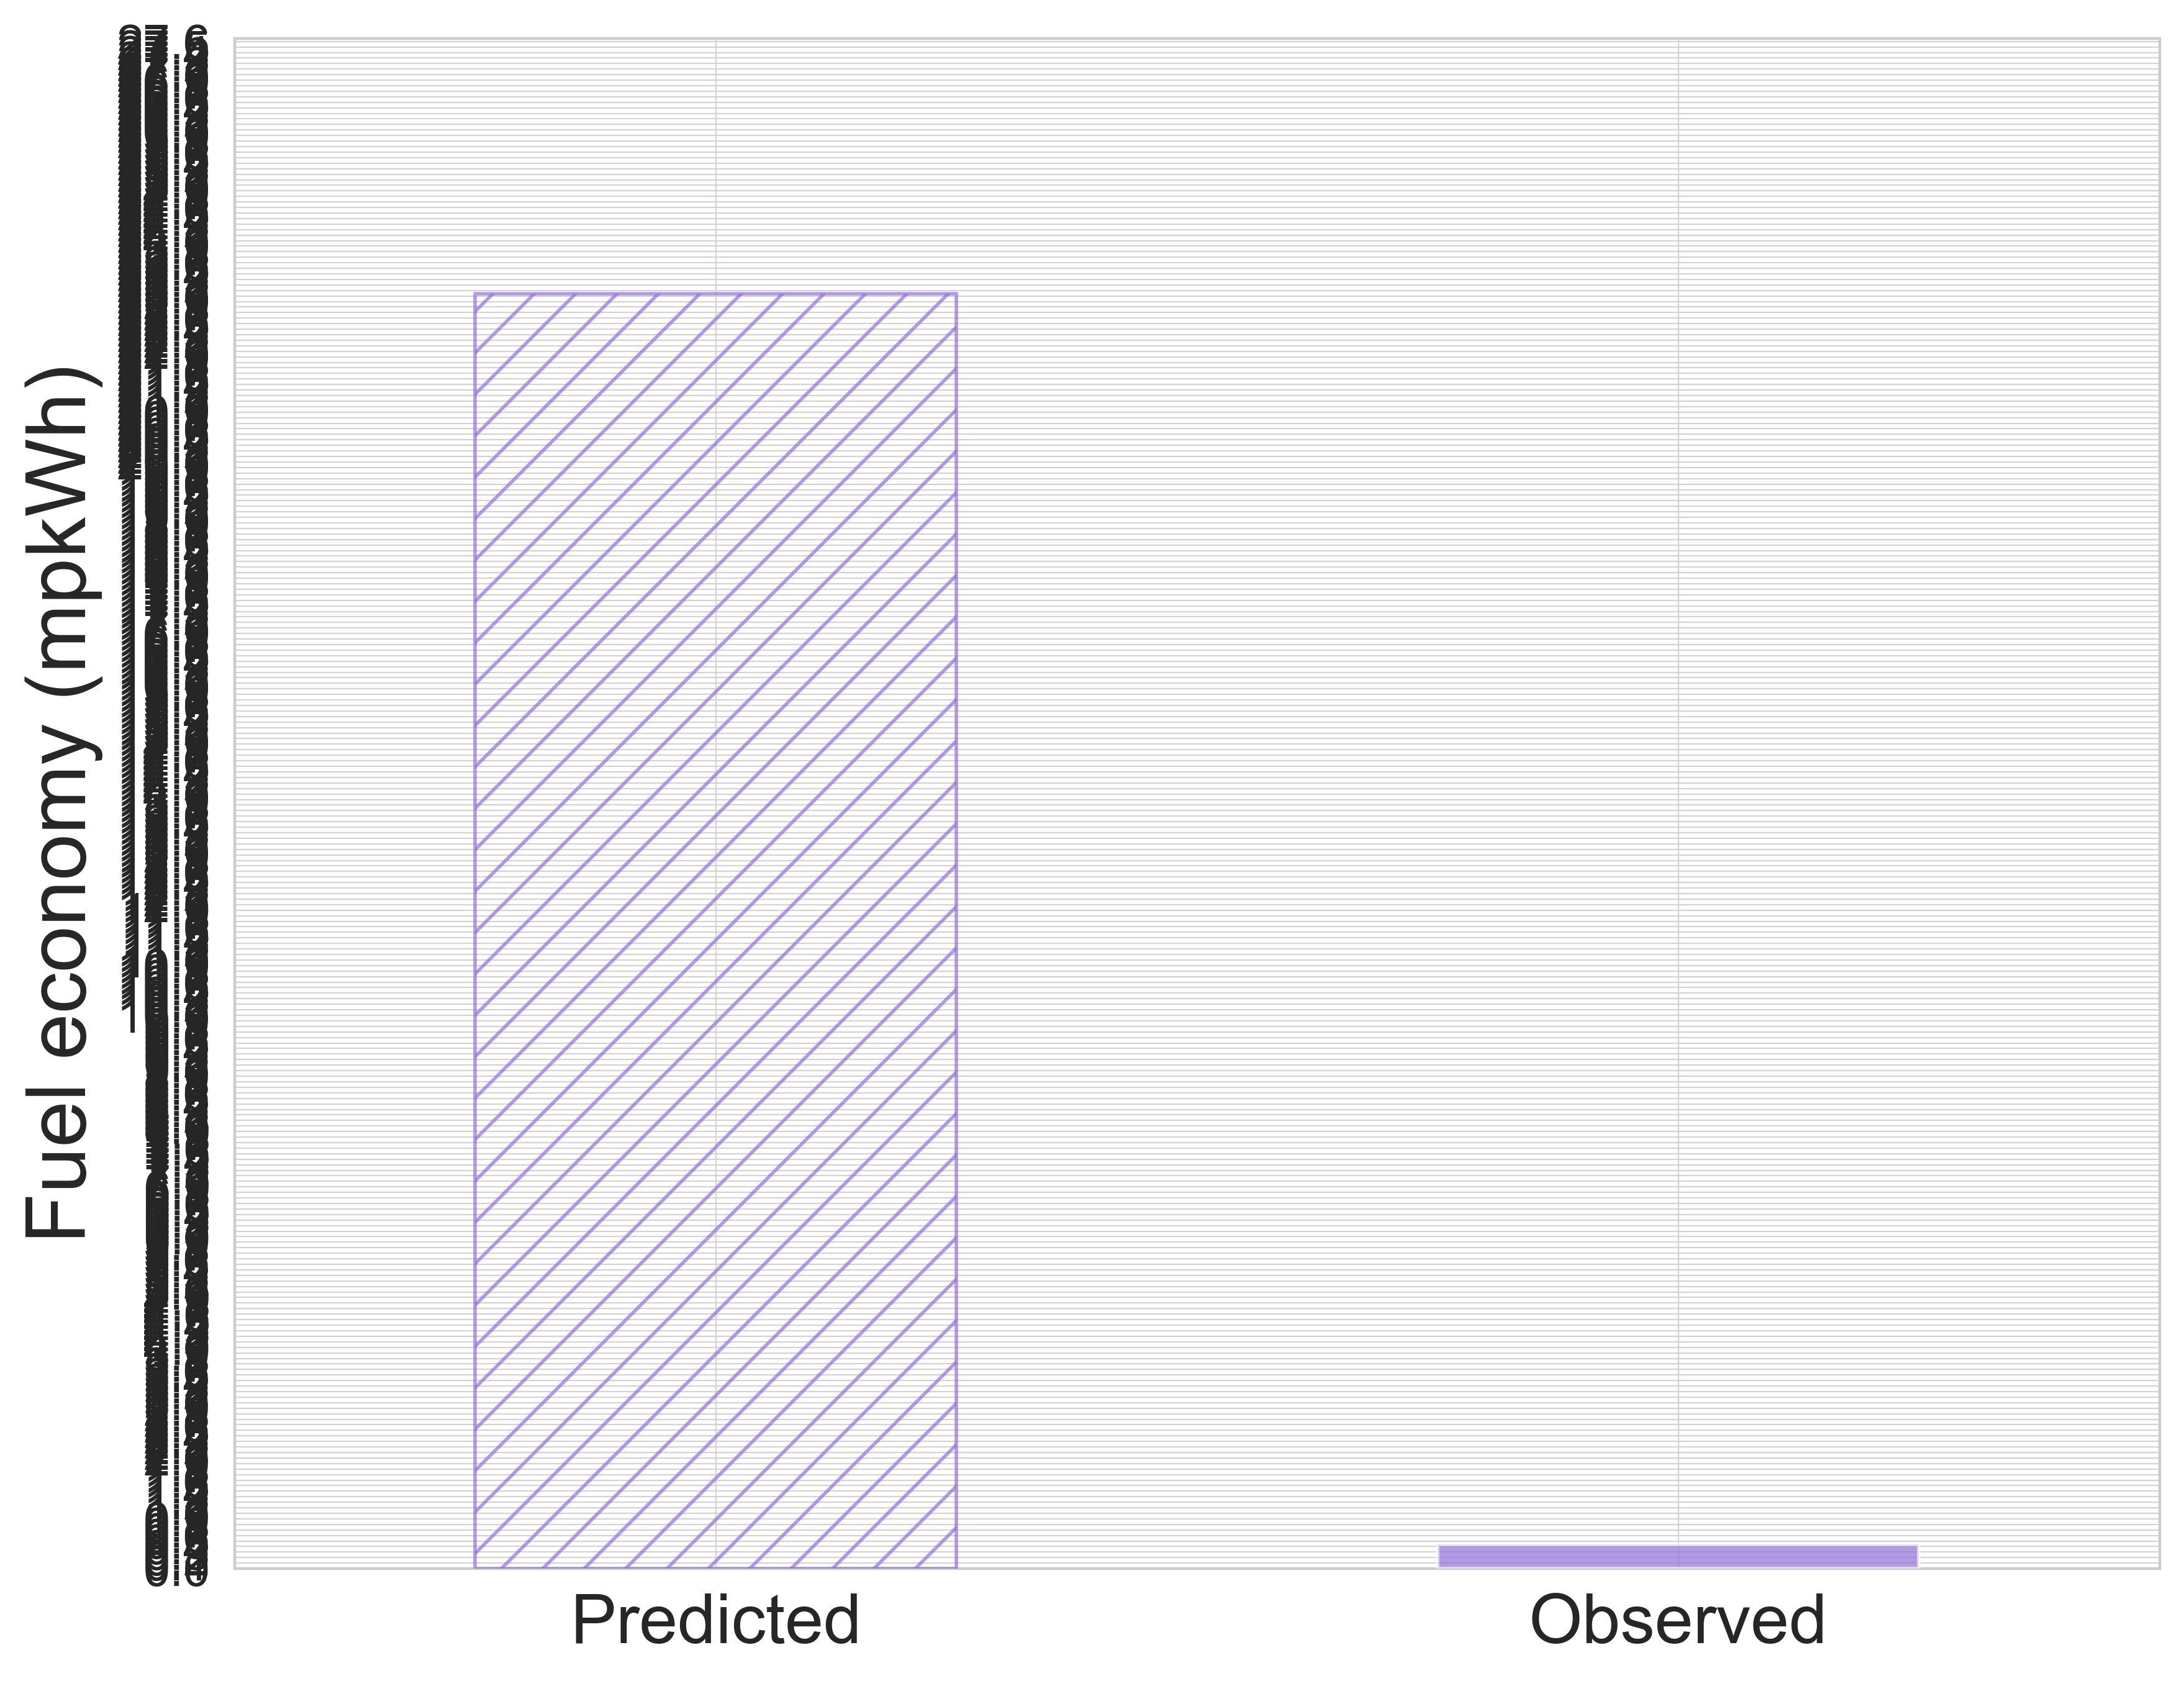

In [184]:
# Mean fuel economy
mean_fuel_economy = df_model_electric_hourly_plot['fuel_economy'].mean()

# Fixed value
fixed_value = 0.44

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8), dpi=400)

# Create the bars
ax.bar(x=1, height=fixed_value, alpha=0.7, label='Predicted', width=0.5, color='mediumpurple', edgecolor='white', zorder=3)
ax.bar(x=0, height=mean_fuel_economy, alpha=0.7, label='Observed', width=0.5, edgecolor='mediumpurple', hatch='//', fill=False, zorder=3)
# Set the x-axis limits and ticks
ax.set_xlim(-0.5, 1.5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Predicted', 'Observed'], fontsize=20)

# Set the y-axis limits and ticks
ax.set_ylim(0, max(mean_fuel_economy, fixed_value) * 1.2)
ax.set_yticks(np.arange(0, max(mean_fuel_economy, fixed_value) * 1.2, 0.1))
ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()], fontsize=14)

# Add axis labels and a title
#ax.set_xlabel('Values', fontsize=16)
ax.set_ylabel('Fuel economy (mpkWh)', fontsize=24)
#ax.set_title('Comparison of mean fuel economy and fixed value', fontsize=18)
ax.grid(color='lightgrey', linewidth=0.4)


# Saving
fig.savefig(r'../../figures/BEB-prdicted-vs-observed.png', dpi=400, bbox_inches='tight')

# Display the plot
plt.show()


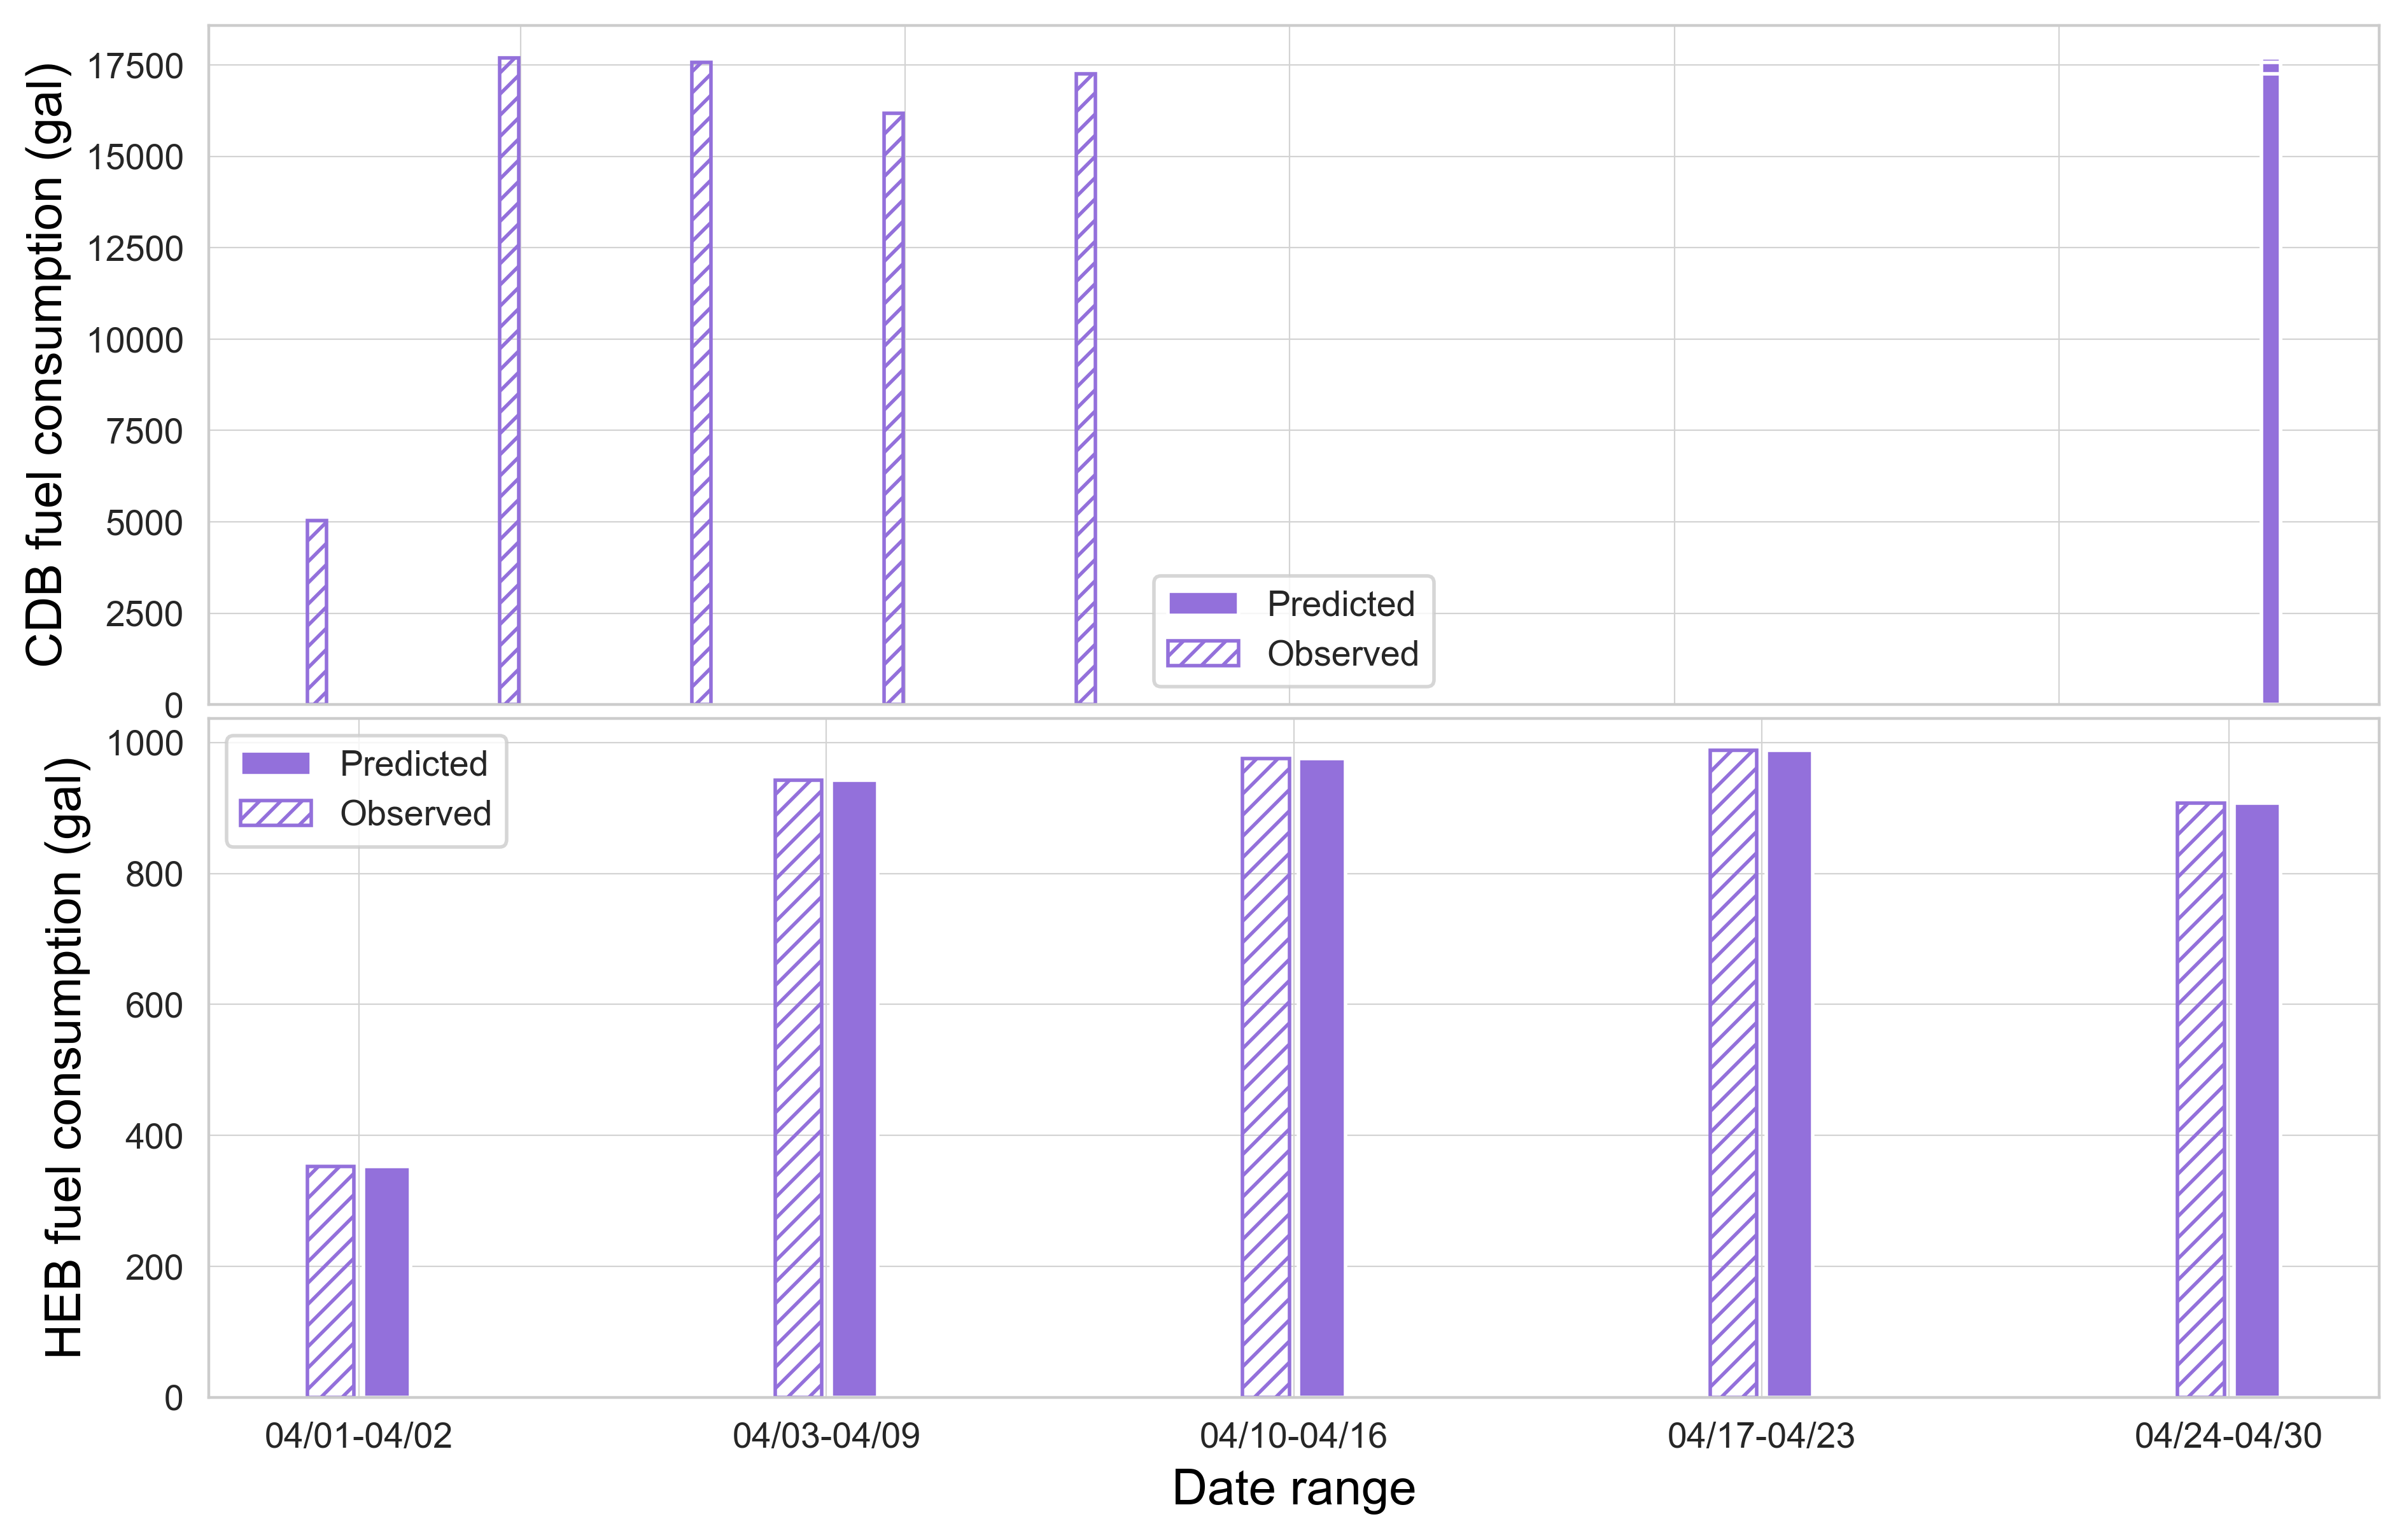

In [183]:
# Create a facet plot with three rows and one column
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(11, 7), dpi=400)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.02)

# Plot 1: CDB
axs[0].bar(mean_fuel_economy + 0.06, df_conventional_plot_weekly.Energy, label='Predicted', width=0.1, color='mediumpurple', edgecolor='white')
axs[0].bar(df_conventional_plot_weekly.week - 0.06, df_conventional_plot_weekly.Energy, label='Observed', width=0.1, edgecolor='mediumpurple', hatch='////', fill=False)
  
# Add title and labels
#axs[0].set_xlabel('Week of the year', fontsize=14, color='black')
axs[0].set_ylabel('CDB fuel consumption (gal)', fontsize=14, color='black')

# Set font sizes
#axs[0].set_xticks(fontsize=12, color='black')
#axs[0].set_yticks(fontsize=12, color='black')

axs[0].grid()
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add legend
axs[0].legend()


# Set plot area color
axs[0].set_facecolor('white')

# Add grid
axs[0].grid(color='lightgrey', linewidth=0.4)


# Plot 2: HEB
axs[1].bar(df_hybrid_plot_weekly.week + 0.06, df_hybrid_plot_weekly.Energy, label='Predicted', width=0.1, color='mediumpurple', edgecolor='white')
axs[1].bar(df_hybrid_plot_weekly.week - 0.06, df_hybrid_plot_weekly.Energy, label='Observed', width=0.1, edgecolor='mediumpurple', hatch='////', fill=False)
  
# Add title and labels
axs[1].set_xlabel('Date range', fontsize=14, color='black')
axs[1].set_ylabel('HEB fuel consumption (gal)', fontsize=14, color='black')

# Set font sizes
#axs[1].set_xticks(fontsize=12, color='black')
#axs[1].set_yticks(fontsize=12, color='black')
# Set x-tick labels to date ranges


axs[1].grid()
#axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add legend
axs[1].legend()

# Set ticks of x-axis
axs[1].set_xticks([13, 14, 15, 16, 17])
axs[1].set_xticklabels(df_conventional_plot_weekly.date_range)

# Set plot area color
axs[1].set_facecolor('white')

# Add grid
axs[1].grid(color='lightgrey', linewidth=0.4)

# Show the combined plot
plt.show()

# Saving
fig.savefig(r'../../figures/timeseries-energy-facetplot.png', dpi=400, bbox_inches='tight')
